Prediction of the Sepsis

Importing the necessary libraries.

In [1]:
#importing the necessary libraries that we use them in the later steps.
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Reading the dataset

In [2]:
#reading the dataset and displaying it
data = pd.read_csv("/Users/anvesh/Downloads/archive/Dataset.csv")
data

Unnamed: 0  Hour     HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  \
0                 0     0    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
1                 1     1   65.0  100.0   NaN    NaN  72.0   NaN  16.5    NaN   
2                 2     2   78.0  100.0   NaN    NaN  42.5   NaN   NaN    NaN   
3                 3     3   73.0  100.0   NaN    NaN   NaN   NaN  17.0    NaN   
4                 4     4   70.0  100.0   NaN  129.0  74.0  69.0  14.0    NaN   
...             ...   ...    ...    ...   ...    ...   ...   ...   ...    ...   
1552205          21    21   83.0   99.0   NaN  121.0  77.0  54.0  22.0    NaN   
1552206          22    22   80.0   92.0   NaN  102.0  73.0  51.0  24.0    NaN   
1552207          23    23   95.0   97.0  36.7  128.5  83.0  58.5  25.0    NaN   
1552208          24    24  104.0   99.0   NaN  127.0  85.0  59.0  24.0    NaN   
1552209          25    25   94.5   99.0   NaN  112.0  81.0  56.0  22.0    NaN   

         ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
1        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
2        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
3        ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
4        ...         NaN      330.0  68.54       0    NaN    NaN        -0.02   
...      ...         ...        ...    ...     ...    ...    ...          ...   
1552205  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552206  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552207  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552208  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   
1552209  ...         NaN        NaN  88.00       0    1.0    0.0        -2.93   

         ICULOS  SepsisLabel  Patient_ID  
0             1            0       17072  
1             2            0       17072  
2             3            0       17072  
3             4            0       17072  
4             5            0       17072  
...         ...          ...         ...  
1552205      22            0      113911  
1552206      23            0      113911  
1552207      24            0      113911  
1552208      25            0      113911  
1552209      26            0      113911  

[1552210 rows x 44 columns]

In [3]:
#displaying the data shape
data.shape

(1552210, 44)

seperating the data into two parts based on the patient_id.

In [4]:
#dividing the data into two parts-training and testing and then saving it based on the patient_id
data1 = data.loc[data['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
data_train = data.drop(data1.index)
data_train.to_csv('data_train.csv', index=False)

data2 = data.loc[data['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
data_test = data.drop(data2.index)
data_test.to_csv('data_test.csv', index=False)

In [5]:
#reading the training dataset and displaying it
data_train = pd.read_csv("/Users/anvesh/Downloads/archive/data_train.csv")
data_train

Unnamed: 0  Hour    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  EtCO2  \
0                0     0   NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN   
1                1     1  65.0  100.0    NaN    NaN  72.0   NaN  16.5    NaN   
2                2     2  78.0  100.0    NaN    NaN  42.5   NaN   NaN    NaN   
3                3     3  73.0  100.0    NaN    NaN   NaN   NaN  17.0    NaN   
4                4     4  70.0  100.0    NaN  129.0  74.0  69.0  14.0    NaN   
...            ...   ...   ...    ...    ...    ...   ...   ...   ...    ...   
790210          43    43  93.5   99.0  36.11   80.0  63.0  50.5   9.5    NaN   
790211          44    44  85.0  100.0    NaN   84.0  64.0  49.0  10.0    NaN   
790212          45    45  86.0   99.5    NaN   84.0  64.0  50.0  11.0    NaN   
790213          46    46  87.0  100.0  36.11   88.0  67.0  52.0  10.5    NaN   
790214          47    47  88.0  100.0    NaN   91.0  71.0  56.0   9.0    NaN   

        ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0       ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
1       ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
2       ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
3       ...         NaN        NaN  68.54       0    NaN    NaN        -0.02   
4       ...         NaN      330.0  68.54       0    NaN    NaN        -0.02   
...     ...         ...        ...    ...     ...    ...    ...          ...   
790210  ...         NaN        NaN  45.96       1    NaN    NaN        -6.15   
790211  ...         NaN        NaN  45.96       1    NaN    NaN        -6.15   
790212  ...         NaN        NaN  45.96       1    NaN    NaN        -6.15   
790213  ...         NaN        NaN  45.96       1    NaN    NaN        -6.15   
790214  ...         NaN        NaN  45.96       1    NaN    NaN        -6.15   

        ICULOS  SepsisLabel  Patient_ID  
0            1            0       17072  
1            2            0       17072  
2            3            0       17072  
3            4            0       17072  
4            5            0       17072  
...        ...          ...         ...  
790210      44            0       16023  
790211      45            0       16023  
790212      46            0       16023  
790213      47            0       16023  
790214      48            0       16023  

[790215 rows x 44 columns]

In [6]:
#reading the testing dataset and displaying it
data_test = pd.read_csv("/Users/anvesh/Downloads/archive/data_test.csv")
data_test

Unnamed: 0  Hour     HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  \
0                0     0    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
1                1     1    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
2                2     2   90.0  100.0  36.6  105.0  75.0  52.0  17.0    NaN   
3                3     3    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
4                4     4   77.0  100.0   NaN  118.0  83.0  58.0  18.0    NaN   
...            ...   ...    ...    ...   ...    ...   ...   ...   ...    ...   
761990          21    21   83.0   99.0   NaN  121.0  77.0  54.0  22.0    NaN   
761991          22    22   80.0   92.0   NaN  102.0  73.0  51.0  24.0    NaN   
761992          23    23   95.0   97.0  36.7  128.5  83.0  58.5  25.0    NaN   
761993          24    24  104.0   99.0   NaN  127.0  85.0  59.0  24.0    NaN   
761994          25    25   94.5   99.0   NaN  112.0  81.0  56.0  22.0    NaN   

        ...  Fibrinogen  Platelets   Age  Gender  Unit1  Unit2  HospAdmTime  \
0       ...         NaN        NaN  63.0       1    NaN    NaN       -31.63   
1       ...         NaN        NaN  63.0       1    NaN    NaN       -31.63   
2       ...         NaN        NaN  63.0       1    NaN    NaN       -31.63   
3       ...         NaN        NaN  63.0       1    NaN    NaN       -31.63   
4       ...         NaN        NaN  63.0       1    NaN    NaN       -31.63   
...     ...         ...        ...   ...     ...    ...    ...          ...   
761990  ...         NaN        NaN  88.0       0    1.0    0.0        -2.93   
761991  ...         NaN        NaN  88.0       0    1.0    0.0        -2.93   
761992  ...         NaN        NaN  88.0       0    1.0    0.0        -2.93   
761993  ...         NaN        NaN  88.0       0    1.0    0.0        -2.93   
761994  ...         NaN        NaN  88.0       0    1.0    0.0        -2.93   

        ICULOS  SepsisLabel  Patient_ID  
0            1            0      101097  
1            2            0      101097  
2            3            0      101097  
3            4            0      101097  
4            5            0      101097  
...        ...          ...         ...  
761990      22            0      113911  
761991      23            0      113911  
761992      24            0      113911  
761993      25            0      113911  
761994      26            0      113911  

[761995 rows x 44 columns]

In [7]:
#displaying the training data shape
data_train.shape

(790215, 44)

In [8]:
#displaying the testing data shape
data_test.shape

(761995, 44)

In [9]:
#describing the stats of training data
data_train.describe()

Unnamed: 0           Hour             HR          O2Sat  \
count  790215.000000  790215.000000  729026.000000  695136.000000   
mean       25.332445      25.332445      84.985264      97.265688   
std        27.954160      27.954160      16.940431       2.908794   
min         0.000000       0.000000      20.000000      20.000000   
25%         9.000000       9.000000      73.000000      96.000000   
50%        20.000000      20.000000      84.000000      98.000000   
75%        33.000000      33.000000      96.000000      99.500000   
max       335.000000     335.000000     280.000000     100.000000   

                Temp            SBP            MAP            DBP  \
count  266901.000000  670014.000000  709357.000000  409918.000000   
mean       37.026737     120.962359      78.767345      59.985809   
std         0.780317      21.520567      15.044038      12.572771   
min        20.900000      22.000000      20.000000      20.000000   
25%        36.560000     105.000000      68.000000      51.000000   
50%        37.060000     118.500000      77.000000      58.500000   
75%        37.550000     134.000000      87.330000      67.000000   
max        42.220000     281.000000     300.000000     298.000000   

               Resp  EtCO2  ...   Fibrinogen     Platelets            Age  \
count  712957.00000    0.0  ...  6030.000000  51499.000000  790215.000000   
mean       18.77346    NaN  ...   292.251642    199.617841      63.016780   
std         5.39575    NaN  ...   158.632042    109.244146      16.133632   
min         1.00000    NaN  ...    34.000000      5.000000      18.110000   
25%        15.00000    NaN  ...   184.000000    127.000000      52.740000   
50%        18.00000    NaN  ...   250.000000    181.000000      65.250000   
75%        22.00000    NaN  ...   356.750000    247.000000      75.890000   
max        69.00000    NaN  ...  1760.000000   1783.000000      89.000000   

              Gender          Unit1          Unit2    HospAdmTime  \
count  790215.000000  404050.000000  404050.000000  790207.000000   
mean        0.577721       0.507101       0.492899     -52.025757   
std         0.493923       0.499950       0.499950     155.864937   
min         0.000000       0.000000       0.000000   -3710.660000   
25%         0.000000       0.000000       0.000000     -38.090000   
50%         1.000000       1.000000       0.000000      -2.600000   
75%         1.000000       1.000000       1.000000      -0.020000   
max         1.000000       1.000000       1.000000      23.990000   

              ICULOS    SepsisLabel     Patient_ID  
count  790215.000000  790215.000000  790215.000000  
mean       27.198518       0.021685   10192.652564  
std        28.190940       0.145654    5893.668065  
min         1.000000       0.000000       1.000000  
25%        11.000000       0.000000    5074.000000  
50%        21.000000       0.000000   10174.000000  
75%        35.000000       0.000000   15284.000000  
max       336.000000       1.000000   20643.000000  

[8 rows x 44 columns]

In [10]:
#describing the stats of testing data
data_test.describe()

Unnamed: 0           Hour             HR          O2Sat  \
count  761995.000000  761995.000000  669785.000000  654338.000000   
mean       25.658981      25.658981      84.141905      97.117749   
std        29.813926      29.813926      17.724160       2.964618   
min         0.000000       0.000000      20.000000      20.000000   
25%         9.000000       9.000000      71.500000      96.000000   
50%        19.000000      19.000000      83.000000      98.000000   
75%        33.000000      33.000000      95.000000      99.500000   
max       335.000000     335.000000     211.000000     100.000000   

                Temp            SBP            MAP            DBP  \
count  258325.000000  655931.000000  649583.000000  655738.000000   
mean       36.926076     126.598433      86.367137      66.234002   
std         0.755826      24.533018      16.774449      14.237016   
min        30.000000      20.000000      30.000000      20.000000   
25%        36.500000     109.000000      74.500000      56.000000   
50%        36.900000     124.000000      84.000000      65.000000   
75%        37.400000     142.000000      96.000000      74.000000   
max        50.000000     300.000000     300.000000     300.000000   

                Resp         EtCO2  ...   Fibrinogen     Platelets  \
count  600918.000000  57636.000000  ...  4212.000000  40710.000000   
mean       18.670780     32.957657  ...   280.419516    191.454864   
std         4.720294      7.951662  ...   144.296293     95.879617   
min         1.000000     10.000000  ...    35.000000      1.000000   
25%        16.000000     28.000000  ...   183.000000    126.000000   
50%        18.000000     33.000000  ...   251.000000    180.000000   
75%        21.000000     38.000000  ...   341.000000    240.000000   
max       100.000000    100.000000  ...  1179.000000   2322.000000   

                 Age         Gender          Unit1          Unit2  \
count  761995.000000  761995.000000  536200.000000  536200.000000   
mean       60.964853       0.540133       0.488637       0.511363   
std        16.579604       0.498387       0.499871       0.499871   
min        14.000000       0.000000       0.000000       0.000000   
25%        50.000000       0.000000       0.000000       0.000000   
50%        63.000000       1.000000       0.000000       1.000000   
75%        72.000000       1.000000       1.000000       1.000000   
max       100.000000       1.000000       1.000000       1.000000   

         HospAdmTime         ICULOS    SepsisLabel     Patient_ID  
count  761995.000000  761995.000000  761995.000000  761995.000000  
mean      -60.376261      26.783929       0.014147  110025.317577  
std       168.524627      29.825131       0.118097    5776.257876  
min     -5366.860000       1.000000       0.000000  100001.000000  
25%       -56.160000      10.000000       0.000000  105047.000000  
50%        -8.950000      20.000000       0.000000  110058.000000  
75%        -3.100000      34.000000       0.000000  115003.000000  
max         0.000000     336.000000       1.000000  120000.000000  

[8 rows x 44 columns]

In [11]:
#printing the training data datatypes
data_train.dtypes

Unnamed: 0            int64
Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           

In [12]:
#printing the testing data datatypes
data_test.dtypes

Unnamed: 0            int64
Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           

In [13]:
#printing the training data information
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        790215 non-null  int64  
 1   Hour              790215 non-null  int64  
 2   HR                729026 non-null  float64
 3   O2Sat             695136 non-null  float64
 4   Temp              266901 non-null  float64
 5   SBP               670014 non-null  float64
 6   MAP               709357 non-null  float64
 7   DBP               409918 non-null  float64
 8   Resp              712957 non-null  float64
 9   EtCO2             0 non-null       float64
 10  BaseExcess        82381 non-null   float64
 11  HCO3              63617 non-null   float64
 12  FiO2              112155 non-null  float64
 13  pH                90615 non-null   float64
 14  PaCO2             69288 non-null   float64
 15  SaO2              39160 non-null   float64
 16  AST               11

In [14]:
#printing the testing data information
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761995 entries, 0 to 761994
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        761995 non-null  int64  
 1   Hour              761995 non-null  int64  
 2   HR                669785 non-null  float64
 3   O2Sat             654338 non-null  float64
 4   Temp              258325 non-null  float64
 5   SBP               655931 non-null  float64
 6   MAP               649583 non-null  float64
 7   DBP               655738 non-null  float64
 8   Resp              600918 non-null  float64
 9   EtCO2             57636 non-null   float64
 10  BaseExcess        1764 non-null    float64
 11  HCO3              1411 non-null    float64
 12  FiO2              17210 non-null   float64
 13  pH                16958 non-null   float64
 14  PaCO2             17013 non-null   float64
 15  SaO2              14401 non-null   float64
 16  AST               13

In [15]:
#printing the training data unique values for every feature
for column in data_train.columns:
    print(f"Length of '{column}': {len(data_train[column].unique())}")

Length of 'Unnamed: 0': 336
Length of 'Hour': 336
Length of 'HR': 334
Length of 'O2Sat': 144
Length of 'Temp': 598
Length of 'SBP': 763
Length of 'MAP': 916
Length of 'DBP': 399
Length of 'Resp': 200
Length of 'EtCO2': 1
Length of 'BaseExcess': 111
Length of 'HCO3': 75
Length of 'FiO2': 93
Length of 'pH': 100
Length of 'PaCO2': 159
Length of 'SaO2': 141
Length of 'AST': 1524
Length of 'BUN': 215
Length of 'Alkalinephos': 612
Length of 'Calcium': 136
Length of 'Chloride': 100
Length of 'Creatinine': 179
Length of 'Bilirubin_direct': 140
Length of 'Glucose': 865
Length of 'Lactate': 352
Length of 'Magnesium': 87
Length of 'Phosphate': 163
Length of 'Potassium': 136
Length of 'Bilirubin_total': 342
Length of 'TroponinI': 290
Length of 'Hct': 660
Length of 'Hgb': 298
Length of 'PTT': 1274
Length of 'WBC': 712
Length of 'Fibrinogen': 760
Length of 'Platelets': 899
Length of 'Age': 5971
Length of 'Gender': 2
Length of 'Unit1': 3
Length of 'Unit2': 3
Length of 'HospAdmTime': 7153
Length of 'I

In [16]:
#printing the testing data unique values for every feature 
for column in data_test.columns:
    print(f"Length of '{column}': {len(data_test[column].unique())}")

Length of 'Unnamed: 0': 336
Length of 'Hour': 336
Length of 'HR': 312
Length of 'O2Sat': 132
Length of 'Temp': 210
Length of 'SBP': 793
Length of 'MAP': 419
Length of 'DBP': 610
Length of 'Resp': 152
Length of 'EtCO2': 140
Length of 'BaseExcess': 346
Length of 'HCO3': 266
Length of 'FiO2': 93
Length of 'pH': 88
Length of 'PaCO2': 533
Length of 'SaO2': 359
Length of 'AST': 1182
Length of 'BUN': 236
Length of 'Alkalinephos': 560
Length of 'Calcium': 534
Length of 'Chloride': 72
Length of 'Creatinine': 1383
Length of 'Bilirubin_direct': 213
Length of 'Glucose': 1013
Length of 'Lactate': 1245
Length of 'Magnesium': 91
Length of 'Phosphate': 159
Length of 'Potassium': 392
Length of 'Bilirubin_total': 306
Length of 'TroponinI': 2301
Length of 'Hct': 522
Length of 'Hgb': 270
Length of 'PTT': 921
Length of 'WBC': 609
Length of 'Fibrinogen': 638
Length of 'Platelets': 759
Length of 'Age': 77
Length of 'Gender': 2
Length of 'Unit1': 3
Length of 'Unit2': 3
Length of 'HospAdmTime': 7975
Length of 

In [17]:
#printing the training data missing/duplicate values
data_train.isna()

Unnamed: 0   Hour     HR  O2Sat   Temp    SBP    MAP    DBP   Resp  \
0            False  False   True   True   True   True   True   True   True   
1            False  False  False  False   True   True  False   True  False   
2            False  False  False  False   True   True  False   True   True   
3            False  False  False  False   True   True   True   True  False   
4            False  False  False  False   True  False  False  False  False   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
790210       False  False  False  False  False  False  False  False  False   
790211       False  False  False  False   True  False  False  False  False   
790212       False  False  False  False   True  False  False  False  False   
790213       False  False  False  False  False  False  False  False  False   
790214       False  False  False  False   True  False  False  False  False   

        EtCO2  ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  \
0        True  ...        True       True  False   False   True   True   
1        True  ...        True       True  False   False   True   True   
2        True  ...        True       True  False   False   True   True   
3        True  ...        True       True  False   False   True   True   
4        True  ...        True      False  False   False   True   True   
...       ...  ...         ...        ...    ...     ...    ...    ...   
790210   True  ...        True       True  False   False   True   True   
790211   True  ...        True       True  False   False   True   True   
790212   True  ...        True       True  False   False   True   True   
790213   True  ...        True       True  False   False   True   True   
790214   True  ...        True       True  False   False   True   True   

        HospAdmTime  ICULOS  SepsisLabel  Patient_ID  
0             False   False        False       False  
1             False   False        False       False  
2             False   False        False       False  
3             False   False        False       False  
4             False   False        False       False  
...             ...     ...          ...         ...  
790210        False   False        False       False  
790211        False   False        False       False  
790212        False   False        False       False  
790213        False   False        False       False  
790214        False   False        False       False  

[790215 rows x 44 columns]

In [18]:
#printing the testing data missing/duplicate values
data_test.isna()

Unnamed: 0   Hour     HR  O2Sat   Temp    SBP    MAP    DBP   Resp  \
0            False  False   True   True   True   True   True   True   True   
1            False  False   True   True   True   True   True   True   True   
2            False  False  False  False  False  False  False  False  False   
3            False  False   True   True   True   True   True   True   True   
4            False  False  False  False   True  False  False  False  False   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
761990       False  False  False  False   True  False  False  False  False   
761991       False  False  False  False   True  False  False  False  False   
761992       False  False  False  False  False  False  False  False  False   
761993       False  False  False  False   True  False  False  False  False   
761994       False  False  False  False   True  False  False  False  False   

        EtCO2  ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  \
0        True  ...        True       True  False   False   True   True   
1        True  ...        True       True  False   False   True   True   
2        True  ...        True       True  False   False   True   True   
3        True  ...        True       True  False   False   True   True   
4        True  ...        True       True  False   False   True   True   
...       ...  ...         ...        ...    ...     ...    ...    ...   
761990   True  ...        True       True  False   False  False  False   
761991   True  ...        True       True  False   False  False  False   
761992   True  ...        True       True  False   False  False  False   
761993   True  ...        True       True  False   False  False  False   
761994   True  ...        True       True  False   False  False  False   

        HospAdmTime  ICULOS  SepsisLabel  Patient_ID  
0             False   False        False       False  
1             False   False        False       False  
2             False   False        False       False  
3             False   False        False       False  
4             False   False        False       False  
...             ...     ...          ...         ...  
761990        False   False        False       False  
761991        False   False        False       False  
761992        False   False        False       False  
761993        False   False        False       False  
761994        False   False        False       False  

[761995 rows x 44 columns]

In [19]:
#printing the training data missing/duplicate values sum
data_train.isna().sum()

Unnamed: 0               0
Hour                     0
HR                   61189
O2Sat                95079
Temp                523314
SBP                 120201
MAP                  80858
DBP                 380297
Resp                 77258
EtCO2               790215
BaseExcess          707834
HCO3                726598
FiO2                678060
pH                  699600
PaCO2               720927
SaO2                751055
AST                 778395
BUN                 725739
Alkalinephos        778683
Calcium             750897
Chloride            724438
Creatinine          737728
Bilirubin_direct    789033
Glucose             693559
Lactate             763072
Magnesium           728734
Phosphate           750319
Potassium           704379
Bilirubin_total     780522
TroponinI           789250
Hct                 697157
Hgb                 720394
PTT                 751909
WBC                 730867
Fibrinogen          784185
Platelets           738716
Age                      0
G

In [20]:
#printing the testing data missing/duplicate values sum
data_test.isna().sum()

Unnamed: 0               0
Hour                     0
HR                   92210
O2Sat               107657
Temp                503670
SBP                 106064
MAP                 112412
DBP                 106257
Resp                161077
EtCO2               704359
BaseExcess          760231
HCO3                760584
FiO2                744785
pH                  745037
PaCO2               744982
SaO2                747594
AST                 748632
BUN                 719903
Alkalinephos        748586
Calcium             709982
Chloride            757306
Creatinine          719866
Bilirubin_direct    760187
Glucose             593135
Lactate             747692
Magnesium           725525
Phosphate           739590
Potassium           703306
Bilirubin_total     748547
TroponinI           748179
Hct                 717620
Hgb                 717225
PTT                 754602
WBC                 721896
Fibrinogen          757783
Platelets           721285
Age                      0
G


Missing values per column for training data:


<Axes: >

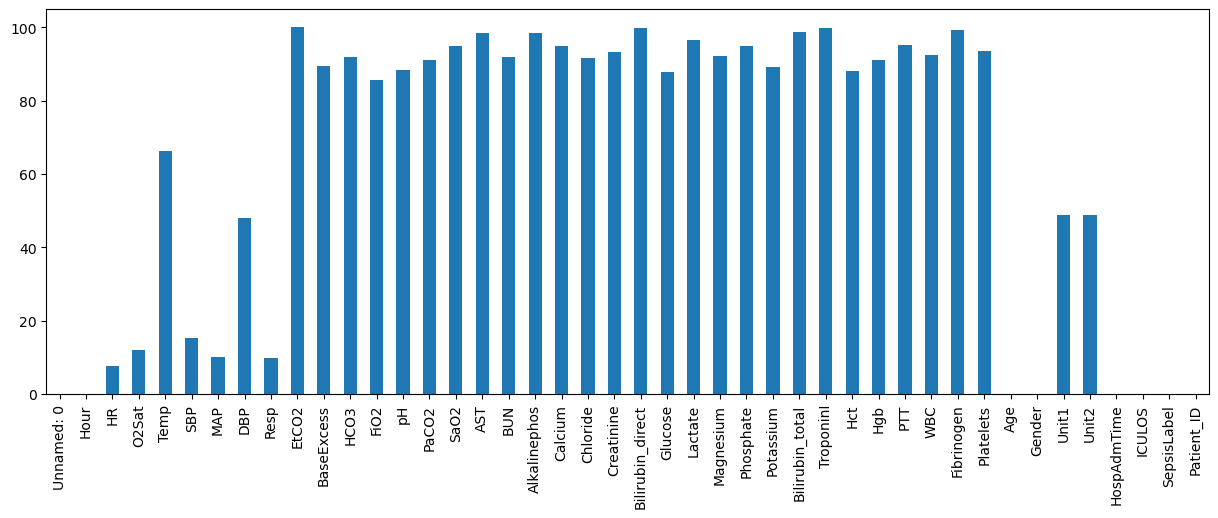

In [21]:
#plotting the missing values of training data
print("\nMissing values per column for training data:")
round(100*(data_train.isnull().sum()/len(data_train.index)),2).plot.bar(figsize=(15,5))


Missing values per column for testing data:


<Axes: >

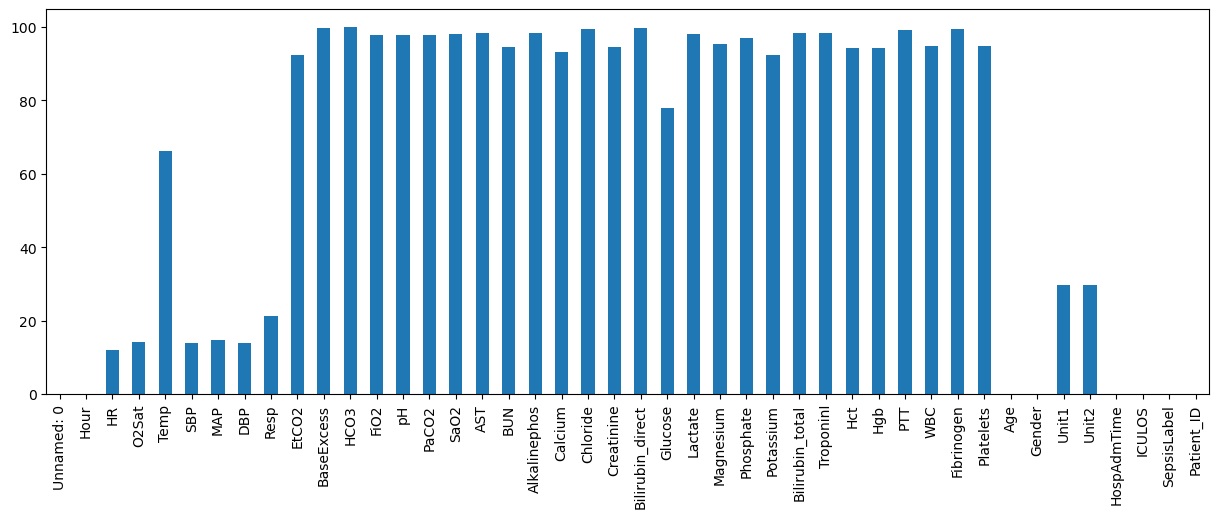

In [22]:
#plotting the missing values of testing data
print("\nMissing values per column for testing data:")
round(100*(data_test.isnull().sum()/len(data_test.index)),2).plot.bar(figsize=(15,5))

Merging and dropping the features

In [23]:
#merging two features into one for training data
data_train['Unit'] = data_train['Unit1'] + data_train['Unit2']
data_train

Unnamed: 0  Hour    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  EtCO2  \
0                0     0   NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN   
1                1     1  65.0  100.0    NaN    NaN  72.0   NaN  16.5    NaN   
2                2     2  78.0  100.0    NaN    NaN  42.5   NaN   NaN    NaN   
3                3     3  73.0  100.0    NaN    NaN   NaN   NaN  17.0    NaN   
4                4     4  70.0  100.0    NaN  129.0  74.0  69.0  14.0    NaN   
...            ...   ...   ...    ...    ...    ...   ...   ...   ...    ...   
790210          43    43  93.5   99.0  36.11   80.0  63.0  50.5   9.5    NaN   
790211          44    44  85.0  100.0    NaN   84.0  64.0  49.0  10.0    NaN   
790212          45    45  86.0   99.5    NaN   84.0  64.0  50.0  11.0    NaN   
790213          46    46  87.0  100.0  36.11   88.0  67.0  52.0  10.5    NaN   
790214          47    47  88.0  100.0    NaN   91.0  71.0  56.0   9.0    NaN   

        ...  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0       ...        NaN  68.54       0    NaN    NaN        -0.02       1   
1       ...        NaN  68.54       0    NaN    NaN        -0.02       2   
2       ...        NaN  68.54       0    NaN    NaN        -0.02       3   
3       ...        NaN  68.54       0    NaN    NaN        -0.02       4   
4       ...      330.0  68.54       0    NaN    NaN        -0.02       5   
...     ...        ...    ...     ...    ...    ...          ...     ...   
790210  ...        NaN  45.96       1    NaN    NaN        -6.15      44   
790211  ...        NaN  45.96       1    NaN    NaN        -6.15      45   
790212  ...        NaN  45.96       1    NaN    NaN        -6.15      46   
790213  ...        NaN  45.96       1    NaN    NaN        -6.15      47   
790214  ...        NaN  45.96       1    NaN    NaN        -6.15      48   

        SepsisLabel  Patient_ID  Unit  
0                 0       17072   NaN  
1                 0       17072   NaN  
2                 0       17072   NaN  
3                 0       17072   NaN  
4                 0       17072   NaN  
...             ...         ...   ...  
790210            0       16023   NaN  
790211            0       16023   NaN  
790212            0       16023   NaN  
790213            0       16023   NaN  
790214            0       16023   NaN  

[790215 rows x 45 columns]

In [24]:
#merging two features into one for testing data
data_test['Unit'] = data_test['Unit1'] + data_test['Unit2']
data_test

Unnamed: 0  Hour     HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  \
0                0     0    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
1                1     1    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
2                2     2   90.0  100.0  36.6  105.0  75.0  52.0  17.0    NaN   
3                3     3    NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
4                4     4   77.0  100.0   NaN  118.0  83.0  58.0  18.0    NaN   
...            ...   ...    ...    ...   ...    ...   ...   ...   ...    ...   
761990          21    21   83.0   99.0   NaN  121.0  77.0  54.0  22.0    NaN   
761991          22    22   80.0   92.0   NaN  102.0  73.0  51.0  24.0    NaN   
761992          23    23   95.0   97.0  36.7  128.5  83.0  58.5  25.0    NaN   
761993          24    24  104.0   99.0   NaN  127.0  85.0  59.0  24.0    NaN   
761994          25    25   94.5   99.0   NaN  112.0  81.0  56.0  22.0    NaN   

        ...  Platelets   Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0       ...        NaN  63.0       1    NaN    NaN       -31.63       1   
1       ...        NaN  63.0       1    NaN    NaN       -31.63       2   
2       ...        NaN  63.0       1    NaN    NaN       -31.63       3   
3       ...        NaN  63.0       1    NaN    NaN       -31.63       4   
4       ...        NaN  63.0       1    NaN    NaN       -31.63       5   
...     ...        ...   ...     ...    ...    ...          ...     ...   
761990  ...        NaN  88.0       0    1.0    0.0        -2.93      22   
761991  ...        NaN  88.0       0    1.0    0.0        -2.93      23   
761992  ...        NaN  88.0       0    1.0    0.0        -2.93      24   
761993  ...        NaN  88.0       0    1.0    0.0        -2.93      25   
761994  ...        NaN  88.0       0    1.0    0.0        -2.93      26   

        SepsisLabel  Patient_ID  Unit  
0                 0      101097   NaN  
1                 0      101097   NaN  
2                 0      101097   NaN  
3                 0      101097   NaN  
4                 0      101097   NaN  
...             ...         ...   ...  
761990            0      113911   1.0  
761991            0      113911   1.0  
761992            0      113911   1.0  
761993            0      113911   1.0  
761994            0      113911   1.0  

[761995 rows x 45 columns]

In [25]:
#removing the features which are having more number of missing values in the training data
features ={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}

data_train = data_train.drop(columns = features)

data_train

Hour    HR  O2Sat   Temp   MAP  Resp  FiO2  SaO2  AST   BUN  ...  Hgb  \
0          0   NaN    NaN    NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...  NaN   
1          1  65.0  100.0    NaN  72.0  16.5   0.4   NaN  NaN   NaN  ...  NaN   
2          2  78.0  100.0    NaN  42.5   NaN   NaN   NaN  NaN   NaN  ...  NaN   
3          3  73.0  100.0    NaN   NaN  17.0   NaN   NaN  NaN   NaN  ...  NaN   
4          4  70.0  100.0    NaN  74.0  14.0   0.4   NaN  NaN  23.0  ...  9.5   
...      ...   ...    ...    ...   ...   ...   ...   ...  ...   ...  ...  ...   
790210    43  93.5   99.0  36.11  63.0   9.5   NaN   NaN  NaN   NaN  ...  NaN   
790211    44  85.0  100.0    NaN  64.0  10.0   0.4   NaN  NaN   NaN  ...  NaN   
790212    45  86.0   99.5    NaN  64.0  11.0   NaN   NaN  NaN   NaN  ...  NaN   
790213    46  87.0  100.0  36.11  67.0  10.5   0.4   NaN  NaN   NaN  ...  NaN   
790214    47  88.0  100.0    NaN  71.0   9.0   NaN   NaN  NaN   NaN  ...  NaN   

         WBC  Platelets    Age  Gender  HospAdmTime  ICULOS  SepsisLabel  \
0        NaN        NaN  68.54       0        -0.02       1            0   
1        NaN        NaN  68.54       0        -0.02       2            0   
2        NaN        NaN  68.54       0        -0.02       3            0   
3        NaN        NaN  68.54       0        -0.02       4            0   
4       11.3      330.0  68.54       0        -0.02       5            0   
...      ...        ...    ...     ...          ...     ...          ...   
790210   NaN        NaN  45.96       1        -6.15      44            0   
790211   NaN        NaN  45.96       1        -6.15      45            0   
790212   NaN        NaN  45.96       1        -6.15      46            0   
790213   NaN        NaN  45.96       1        -6.15      47            0   
790214   NaN        NaN  45.96       1        -6.15      48            0   

        Patient_ID  Unit  
0            17072   NaN  
1            17072   NaN  
2            17072   NaN  
3            17072   NaN  
4            17072   NaN  
...            ...   ...  
790210       16023   NaN  
790211       16023   NaN  
790212       16023   NaN  
790213       16023   NaN  
790214       16023   NaN  

[790215 rows x 28 columns]

In [26]:
#removing the features which are having more number of missing values in the testing data
features ={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}

data_test = data_test.drop(columns = features)

data_test

Hour     HR  O2Sat  Temp   MAP  Resp  FiO2  SaO2  AST  BUN  ...  Hgb  \
0          0    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  ...  NaN   
1          1    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  ...  NaN   
2          2   90.0  100.0  36.6  75.0  17.0   NaN   NaN  NaN  NaN  ...  NaN   
3          3    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  ...  NaN   
4          4   77.0  100.0   NaN  83.0  18.0   NaN   NaN  NaN  NaN  ...  NaN   
...      ...    ...    ...   ...   ...   ...   ...   ...  ...  ...  ...  ...   
761990    21   83.0   99.0   NaN  77.0  22.0   NaN   NaN  NaN  NaN  ...  NaN   
761991    22   80.0   92.0   NaN  73.0  24.0   NaN   NaN  NaN  NaN  ...  NaN   
761992    23   95.0   97.0  36.7  83.0  25.0   NaN   NaN  NaN  NaN  ...  NaN   
761993    24  104.0   99.0   NaN  85.0  24.0   NaN   NaN  NaN  NaN  ...  NaN   
761994    25   94.5   99.0   NaN  81.0  22.0   NaN   NaN  NaN  NaN  ...  NaN   

        WBC  Platelets   Age  Gender  HospAdmTime  ICULOS  SepsisLabel  \
0       NaN        NaN  63.0       1       -31.63       1            0   
1       NaN        NaN  63.0       1       -31.63       2            0   
2       NaN        NaN  63.0       1       -31.63       3            0   
3       NaN        NaN  63.0       1       -31.63       4            0   
4       NaN        NaN  63.0       1       -31.63       5            0   
...     ...        ...   ...     ...          ...     ...          ...   
761990  NaN        NaN  88.0       0        -2.93      22            0   
761991  NaN        NaN  88.0       0        -2.93      23            0   
761992  NaN        NaN  88.0       0        -2.93      24            0   
761993  NaN        NaN  88.0       0        -2.93      25            0   
761994  NaN        NaN  88.0       0        -2.93      26            0   

        Patient_ID  Unit  
0           101097   NaN  
1           101097   NaN  
2           101097   NaN  
3           101097   NaN  
4           101097   NaN  
...            ...   ...  
761990      113911   1.0  
761991      113911   1.0  
761992      113911   1.0  
761993      113911   1.0  
761994      113911   1.0  

[761995 rows x 28 columns]

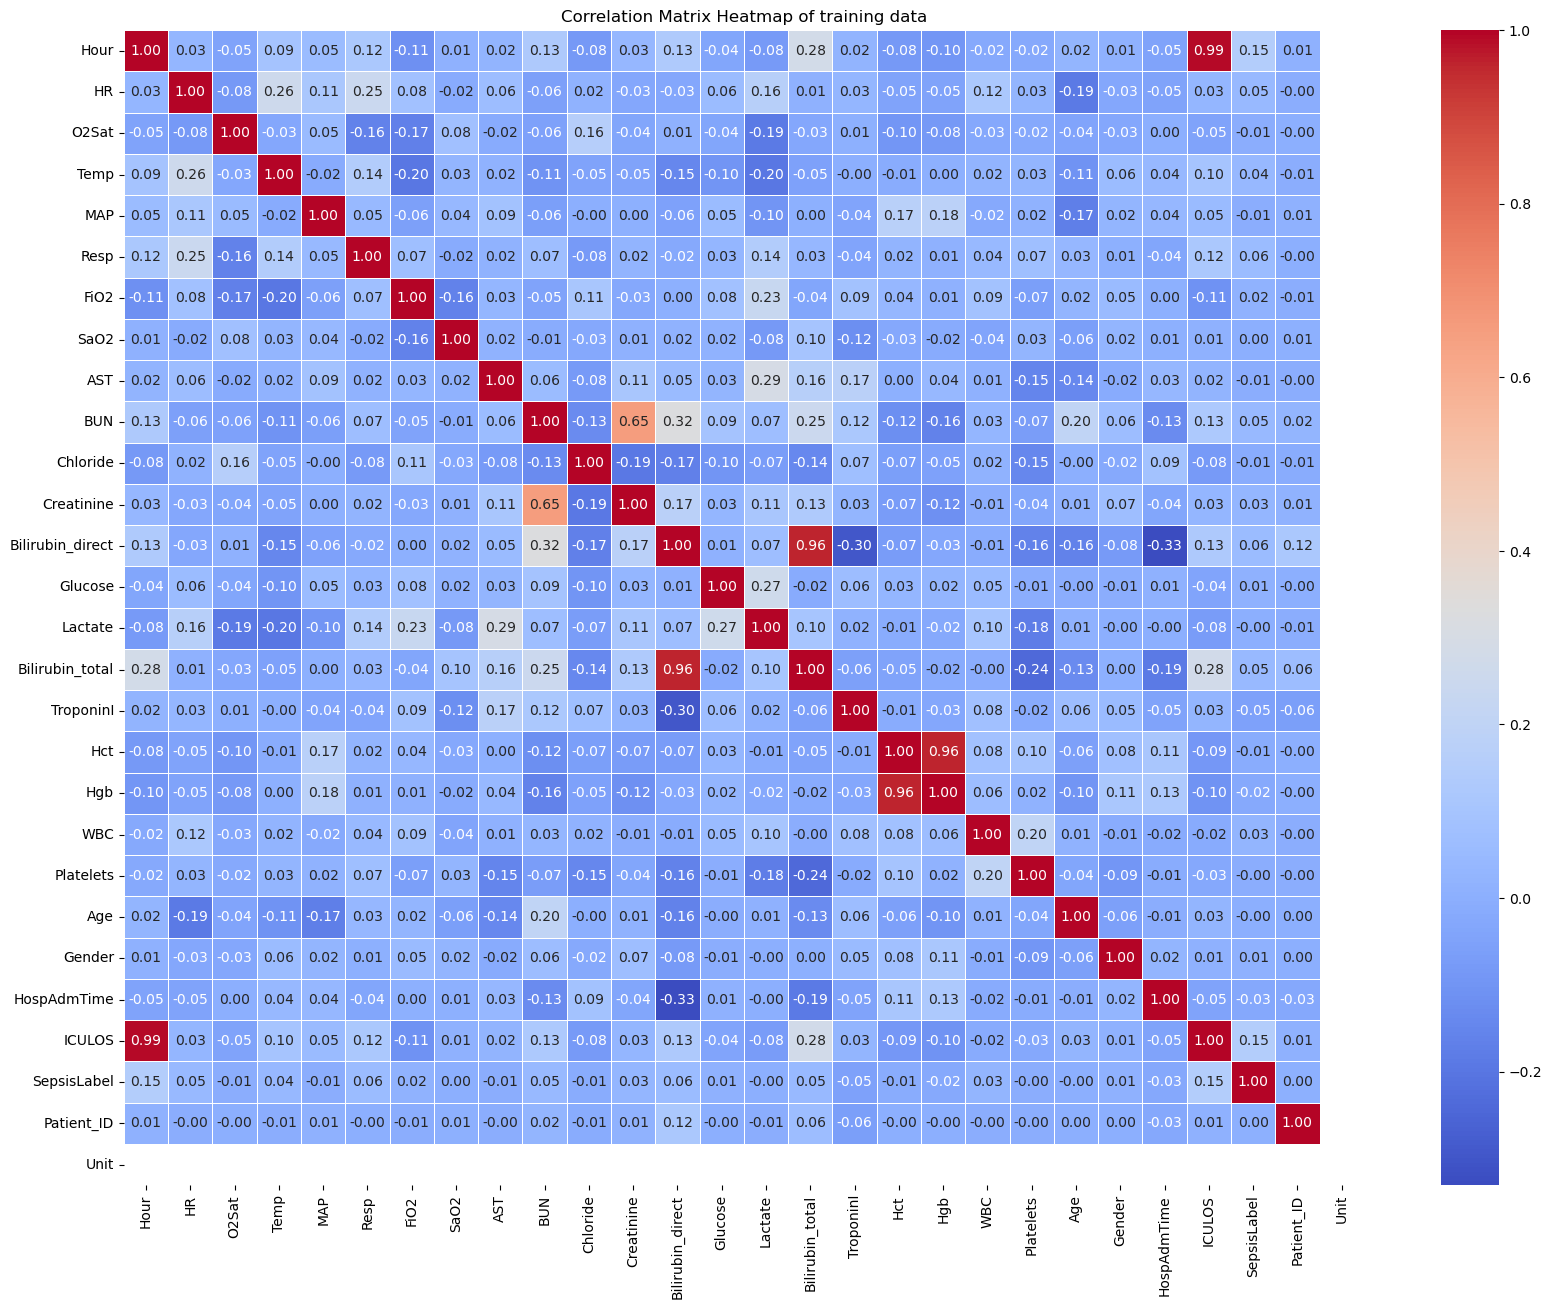

In [27]:
#checking the correlation of the training data
corr_matrix = data_train.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of training data')
plt.show()

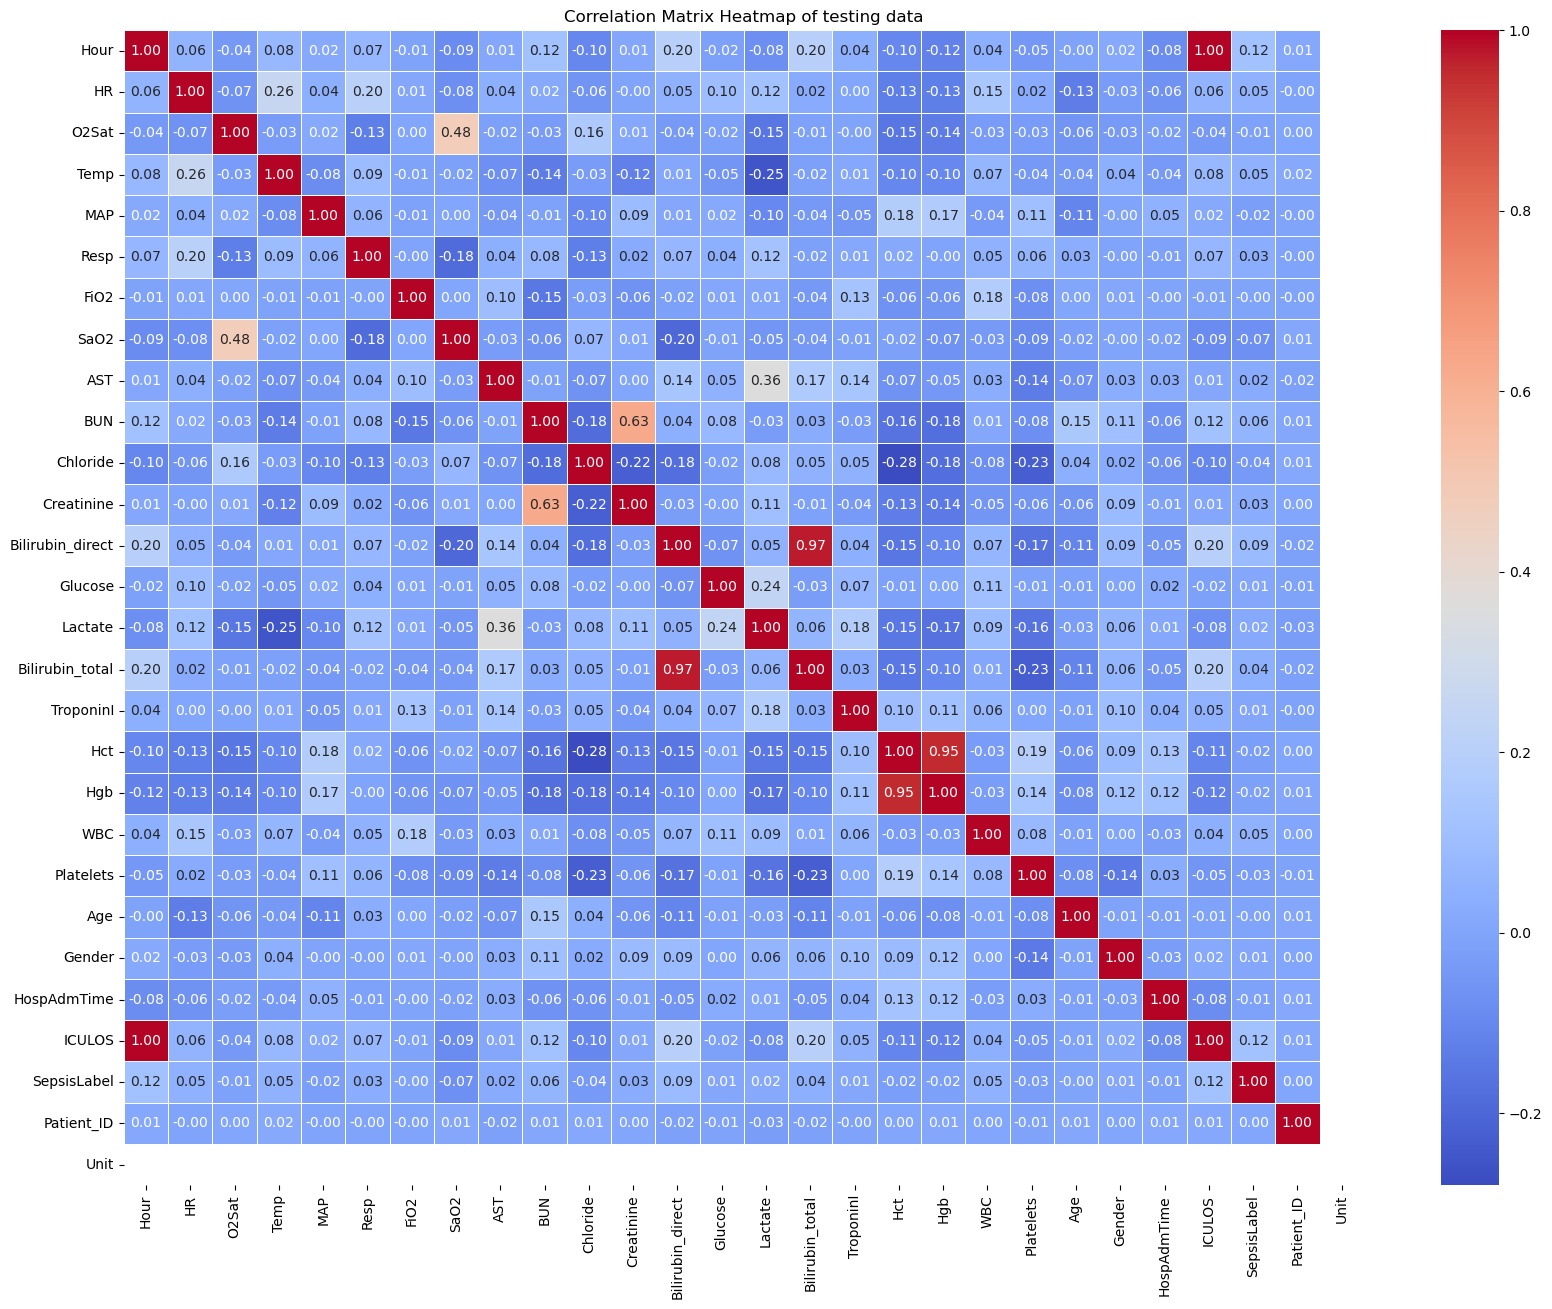

In [28]:
#checking the correlation of the testing data
corr_matrix = data_test.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of testing data')
plt.show()

plotting the class imbalances and distribution plots of every feature

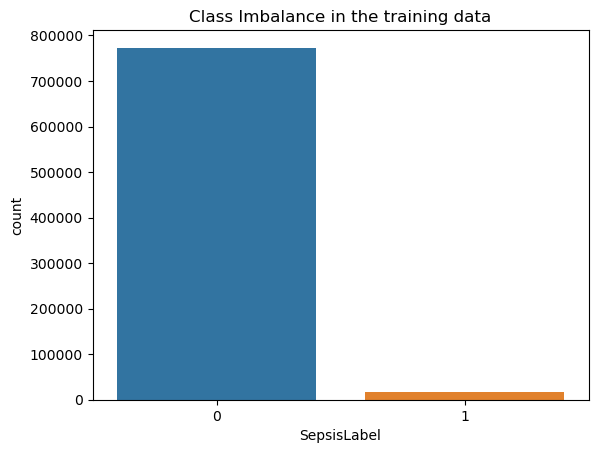

In [29]:
# Class Inmbalance problem SepsisLabel Column for training data
sns.countplot(x="SepsisLabel", data=data_train)
plt.title('Class Imbalance in the training data')
plt.show()

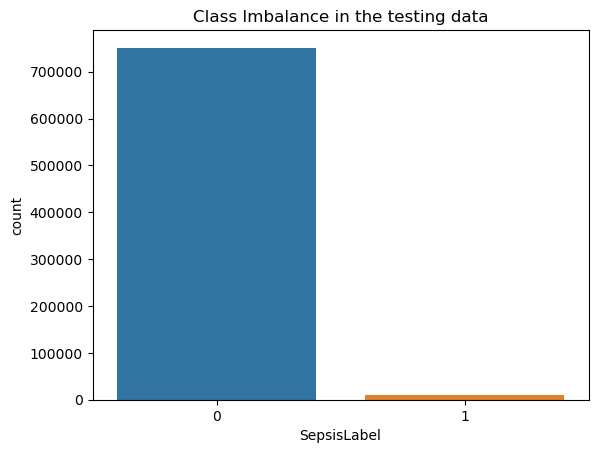

In [30]:
# Class Inmbalance problem SepsisLabel Column for testing data
sns.countplot(x="SepsisLabel", data=data_test)
plt.title('Class Imbalance in the testing data')
plt.show()

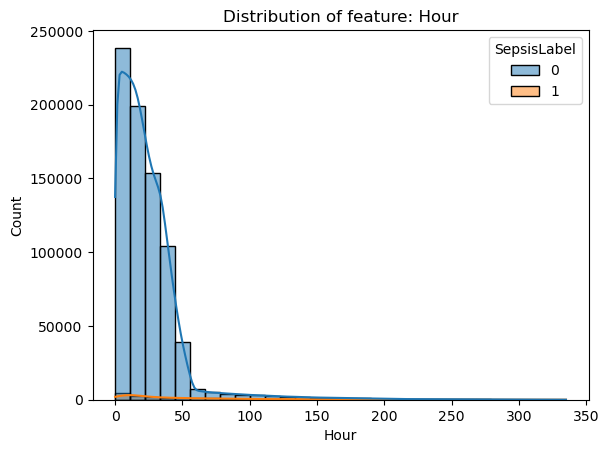

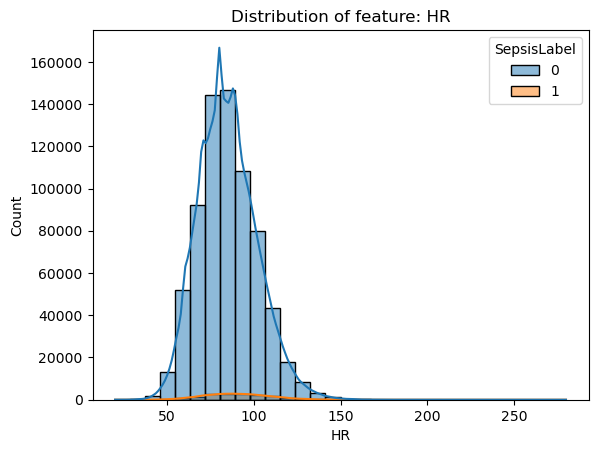

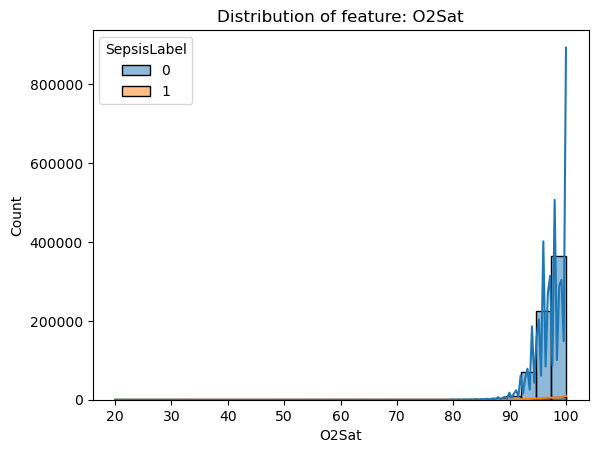

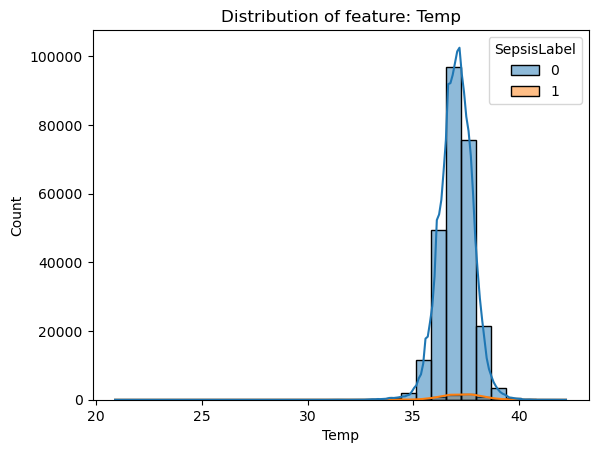

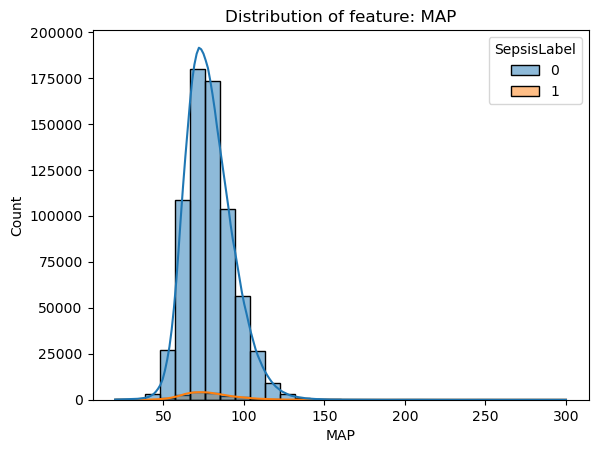

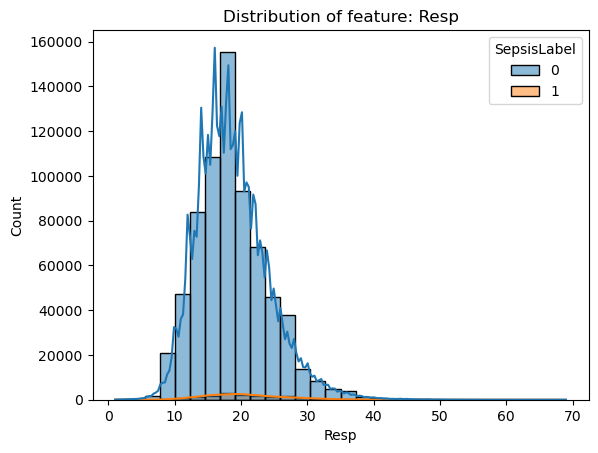

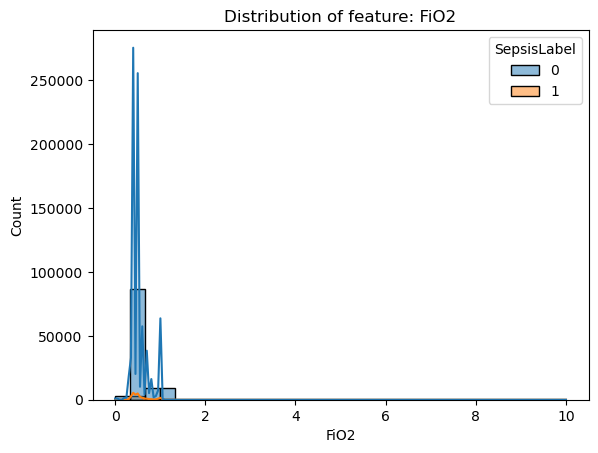

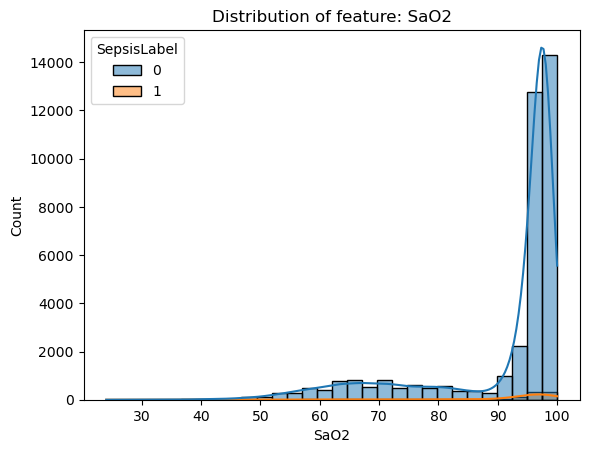

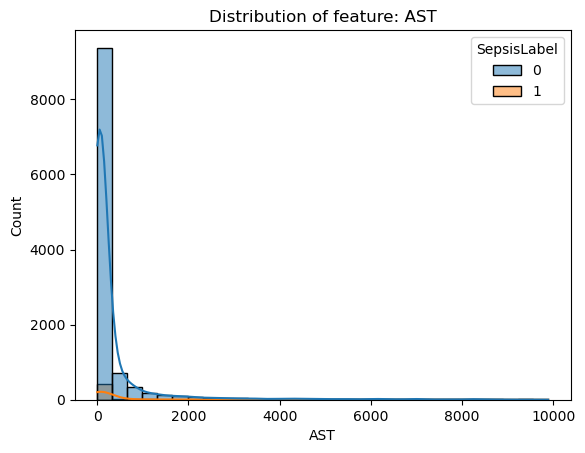

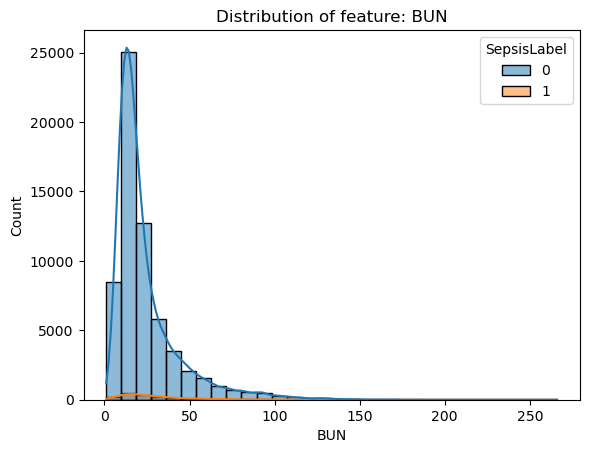

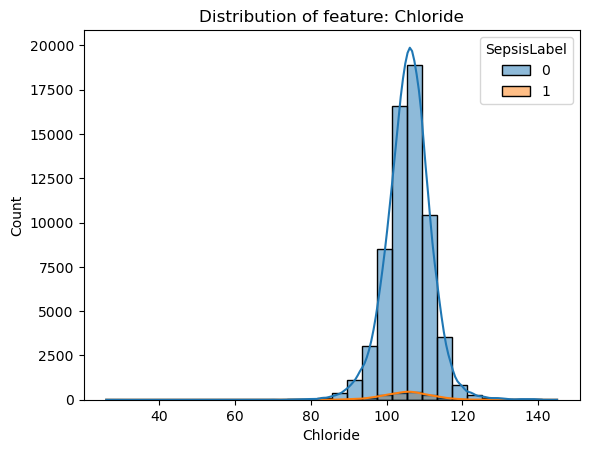

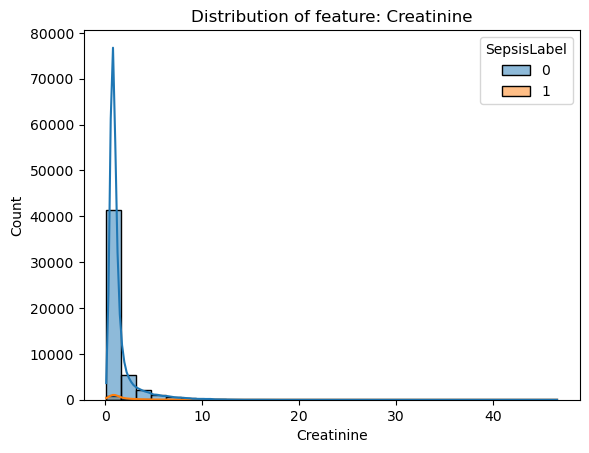

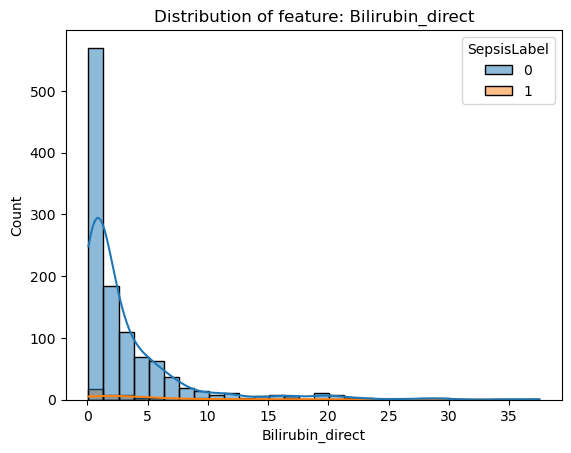

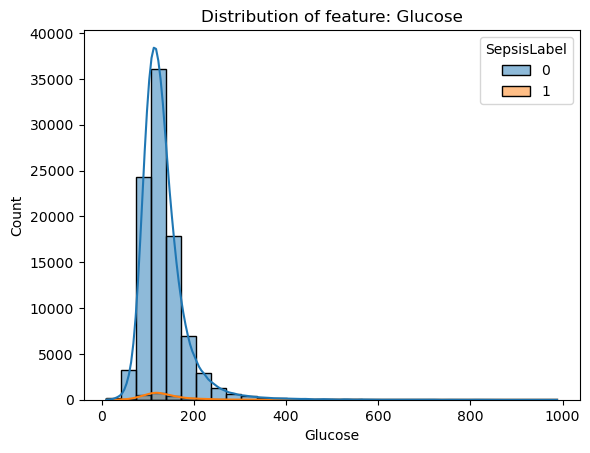

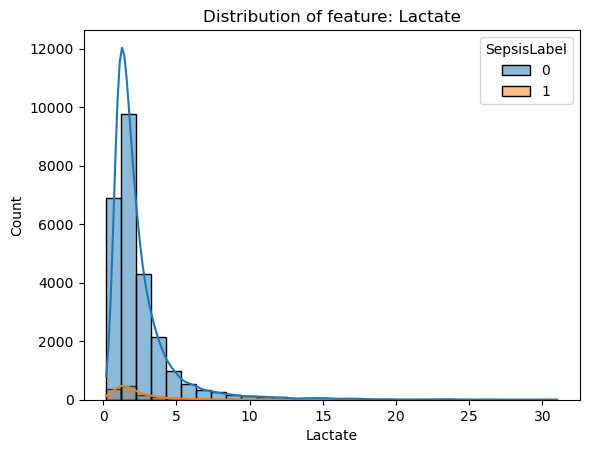

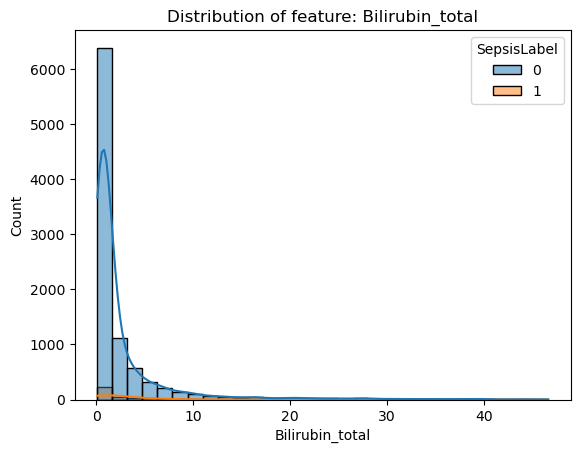

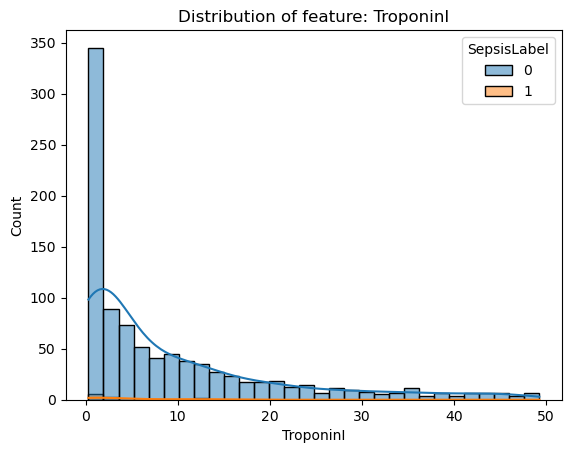

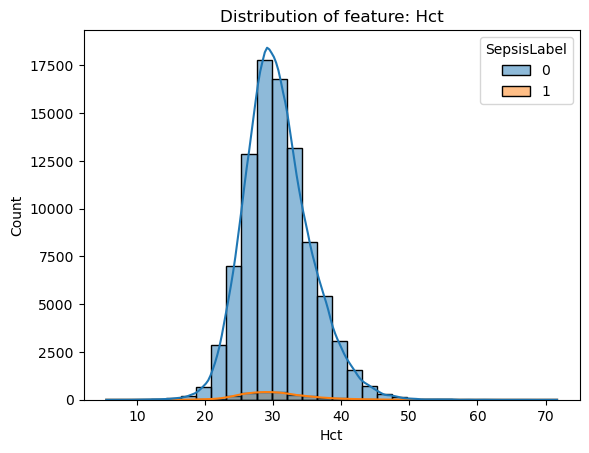

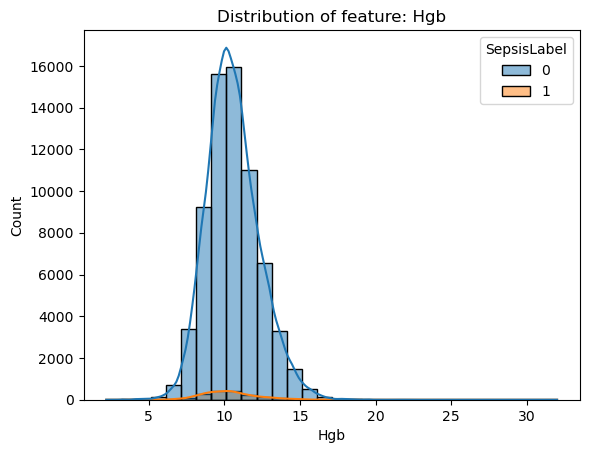

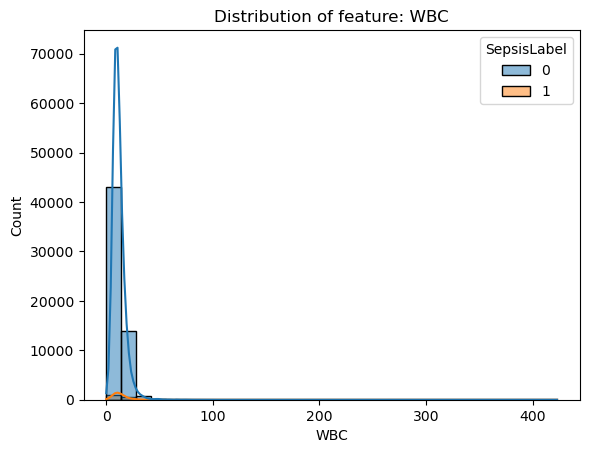

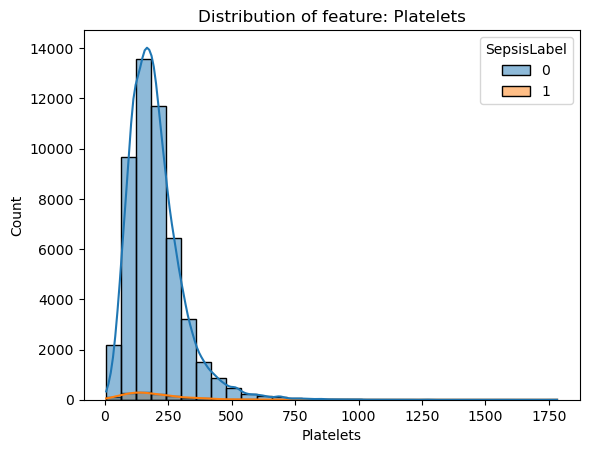

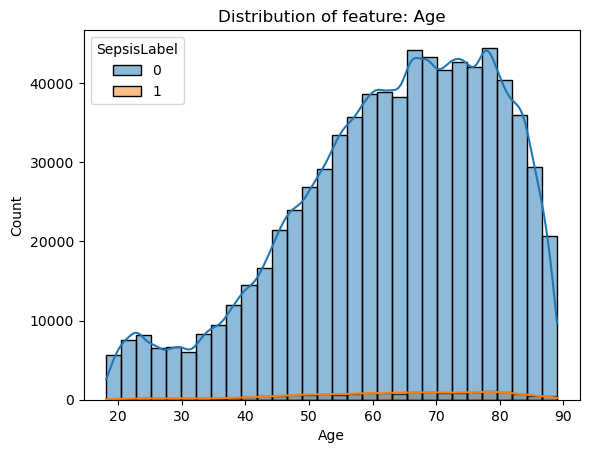

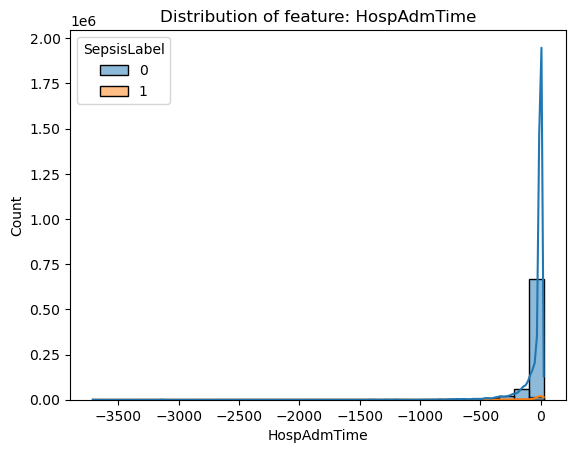

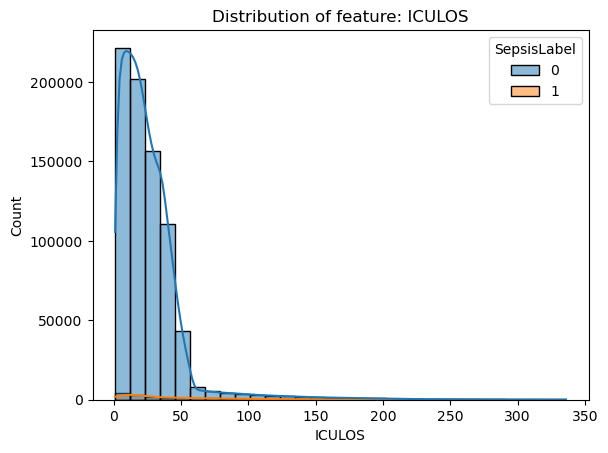

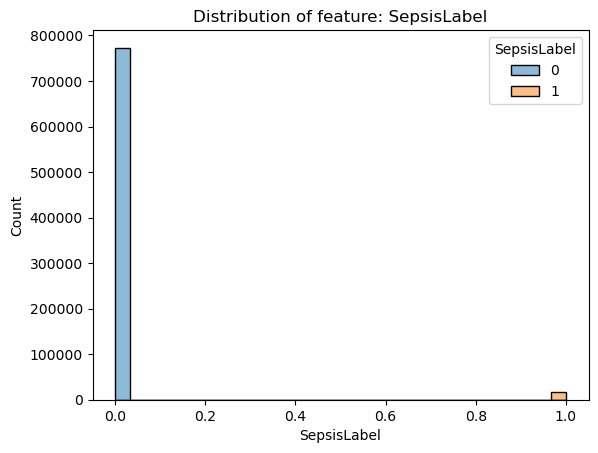

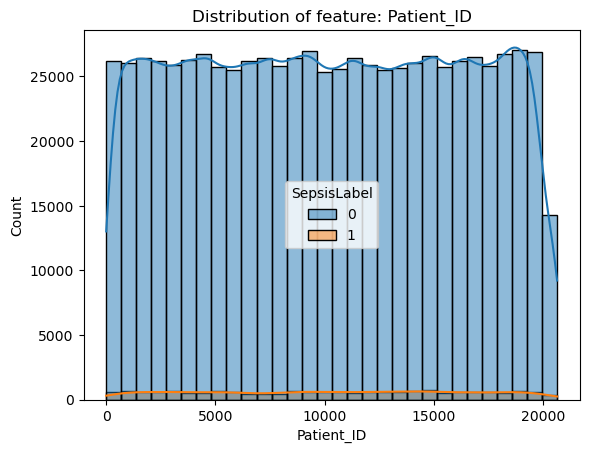

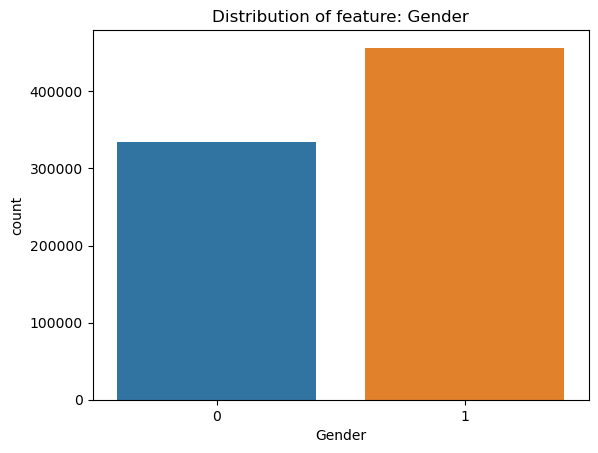

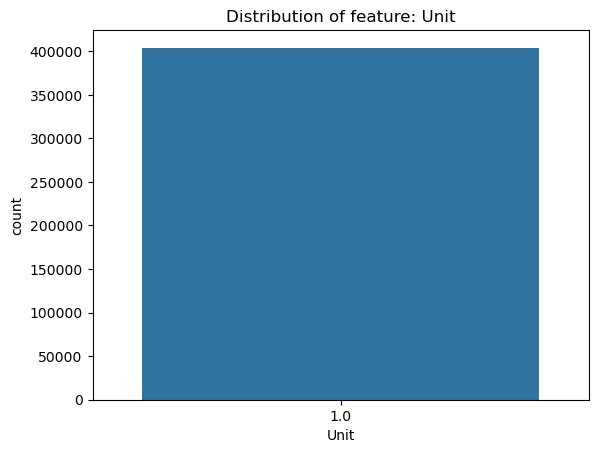

In [31]:
# Continuous features of the training dataset
continuous_features = ['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID']

# Categorical features of the training dataset
categorical_features = ['Gender', 'Unit']

# Plotting histograms for the continuous columns of training dataset
for feature in continuous_features:
    sns.histplot(data=data_train, x=feature, hue='SepsisLabel', kde=True, bins=30)
    plt.title(f'Distribution of feature: {feature}')
    plt.show()

# Plot bar plots for categorical columns of training dataset
for feature in categorical_features:
    sns.countplot(x=feature, data=data_train)
    plt.title(f'Distribution of feature: {feature}')
    plt.show()

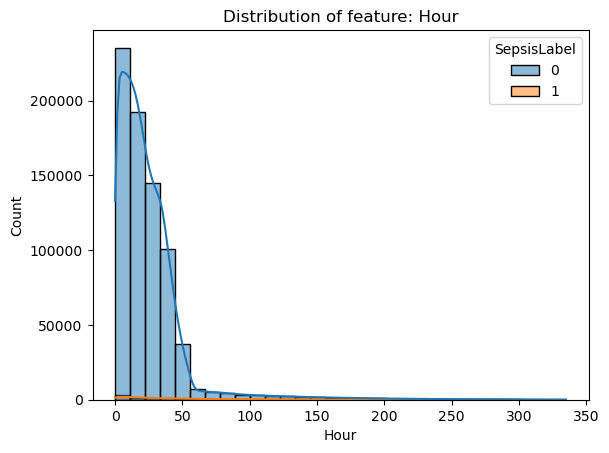

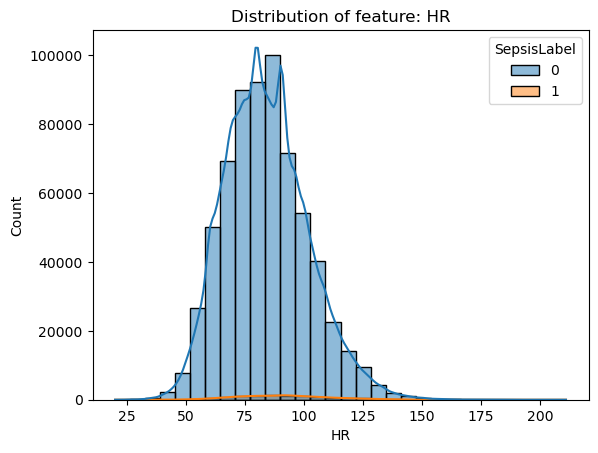

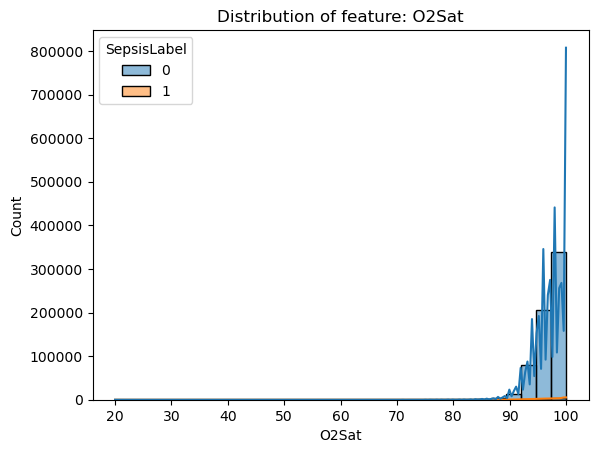

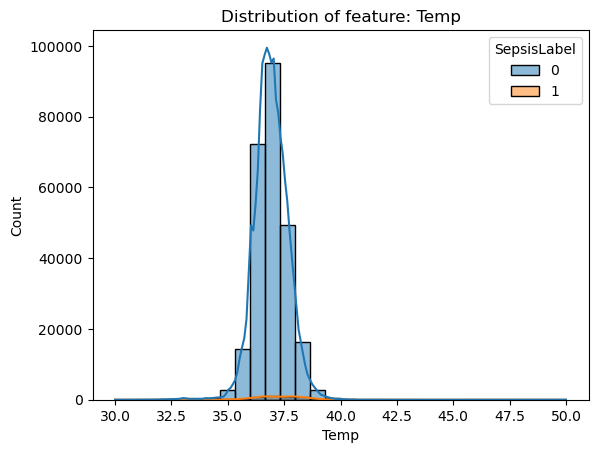

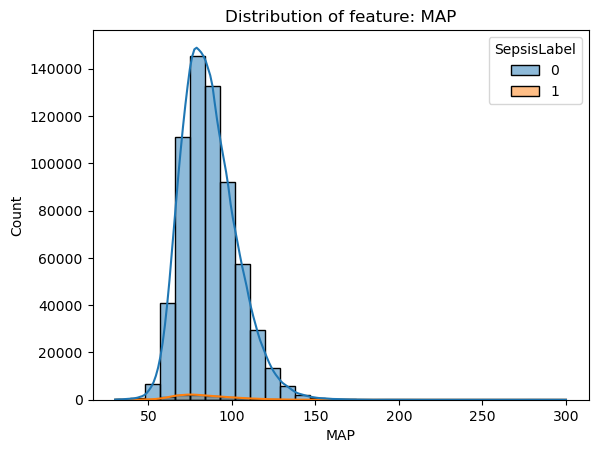

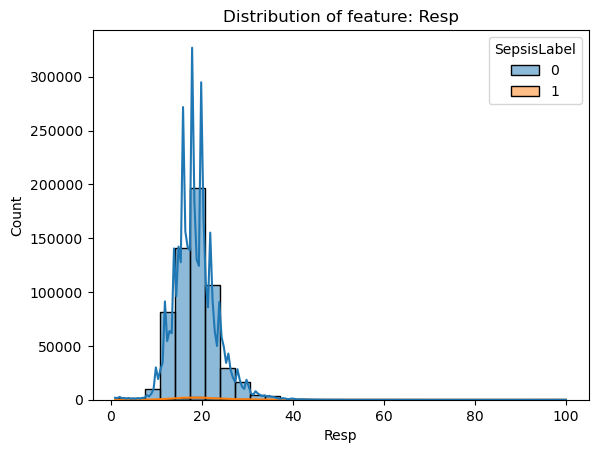

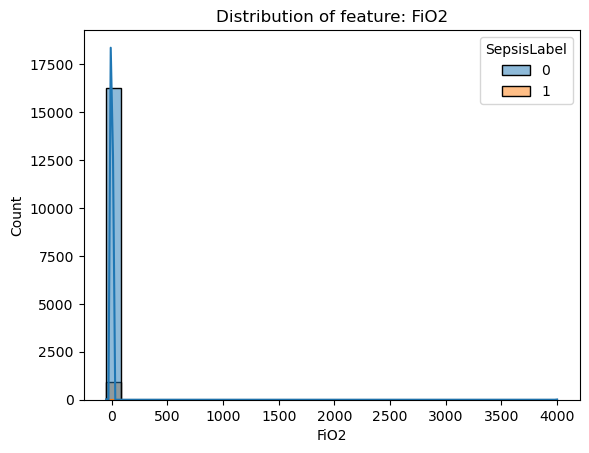

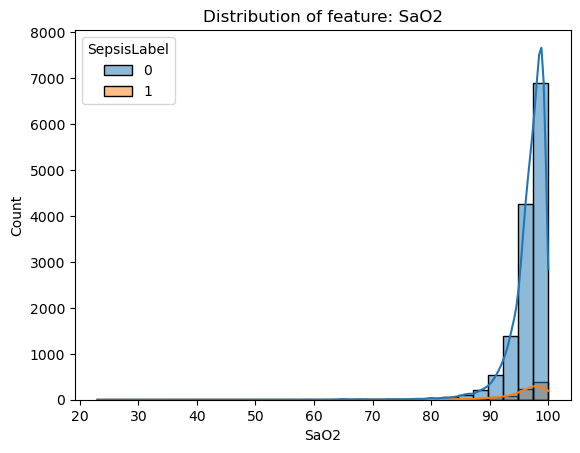

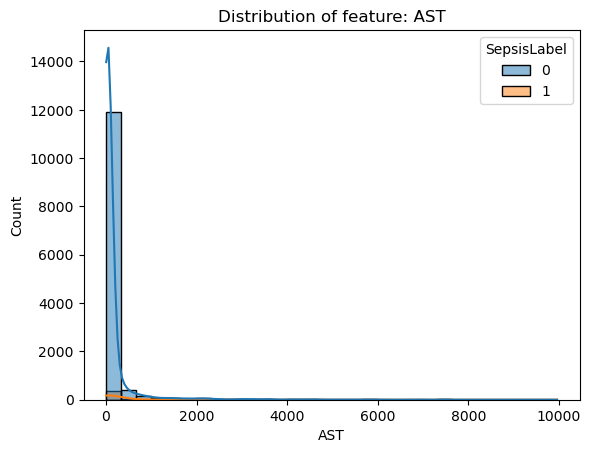

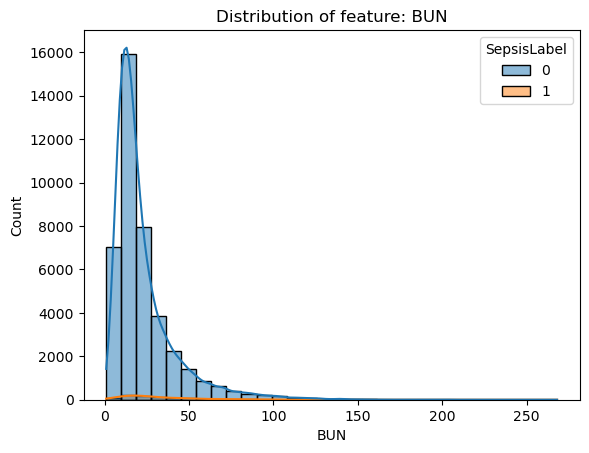

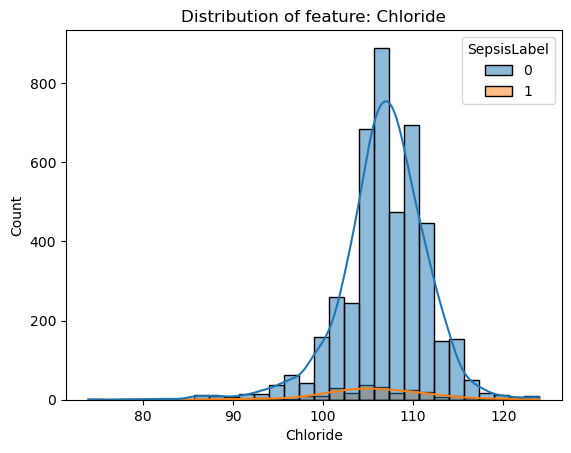

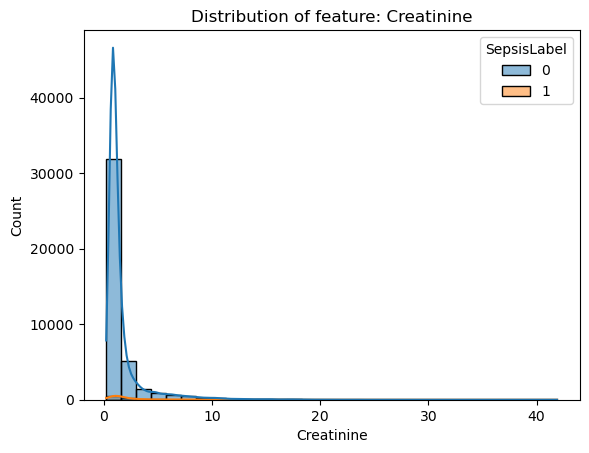

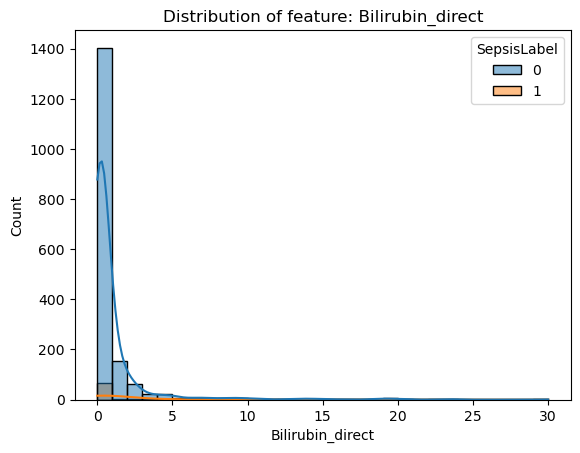

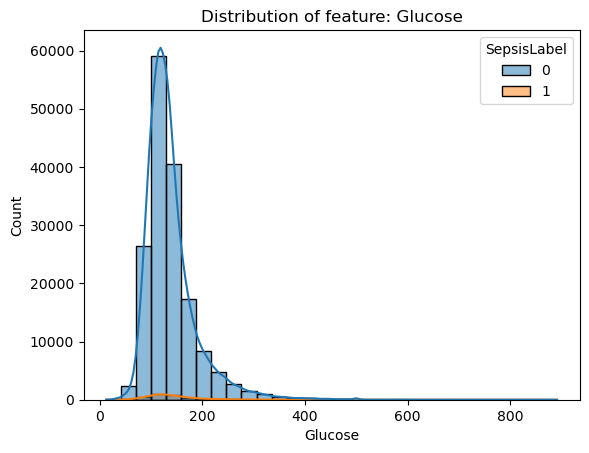

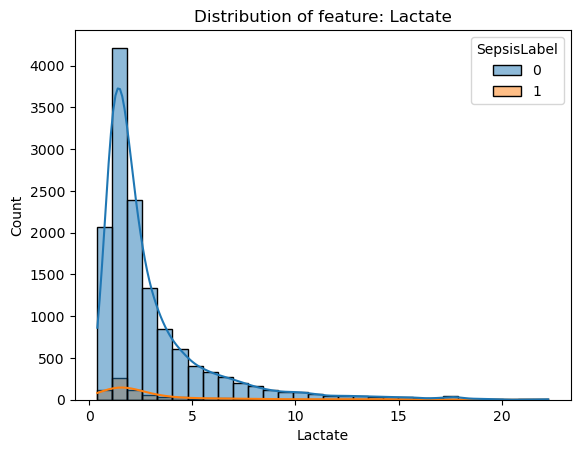

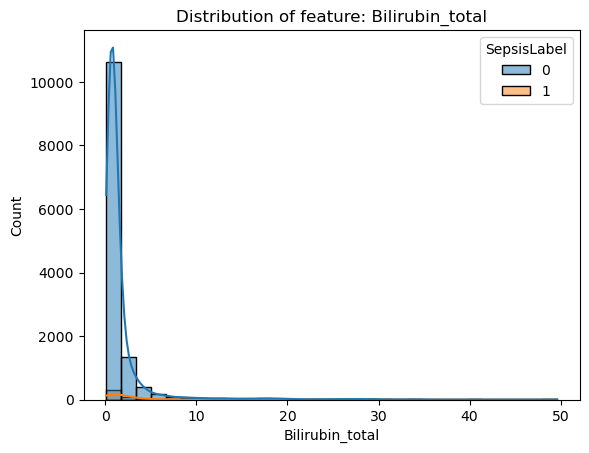

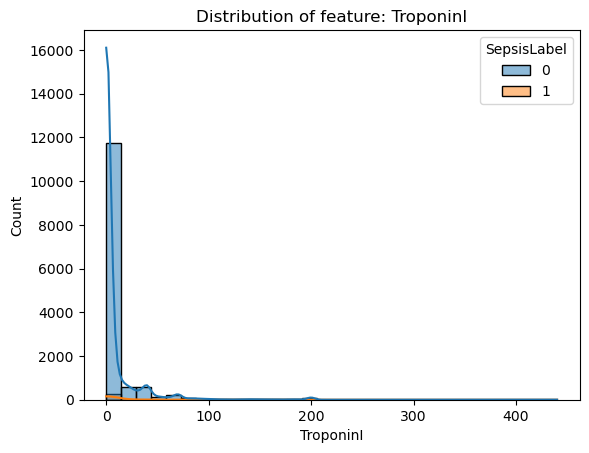

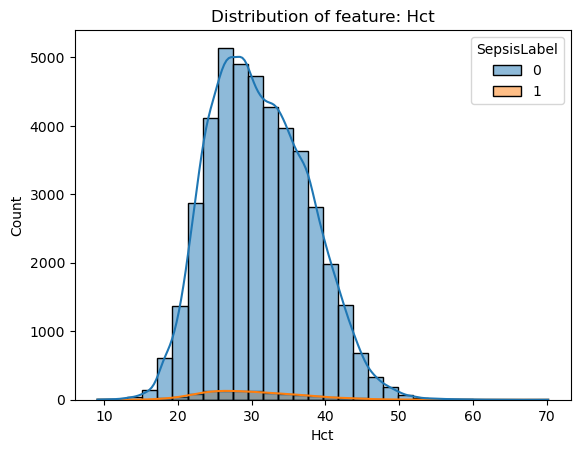

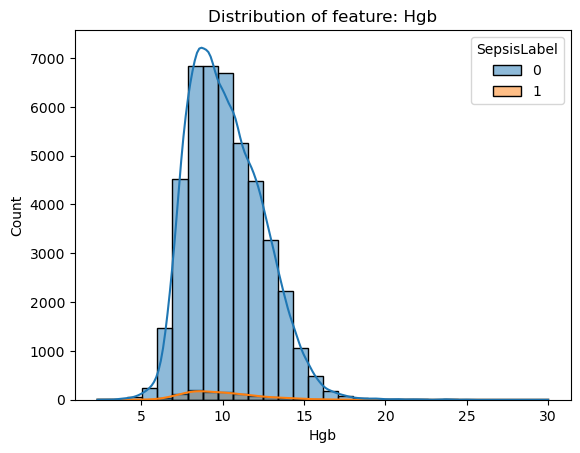

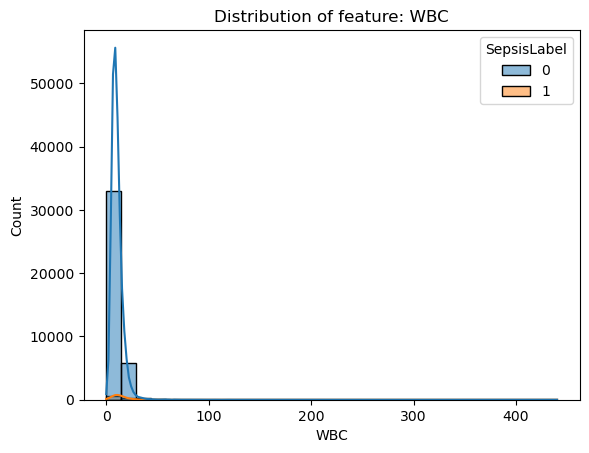

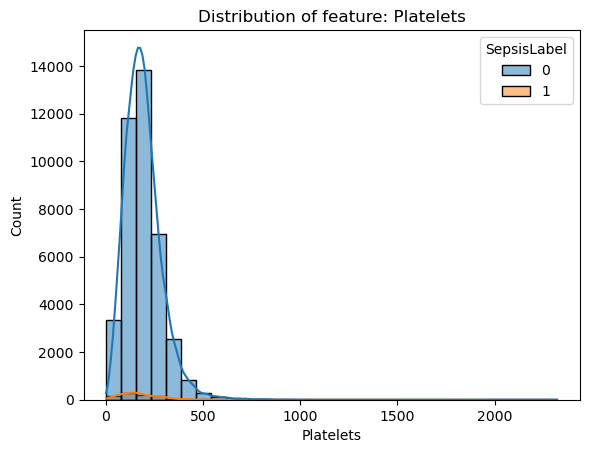

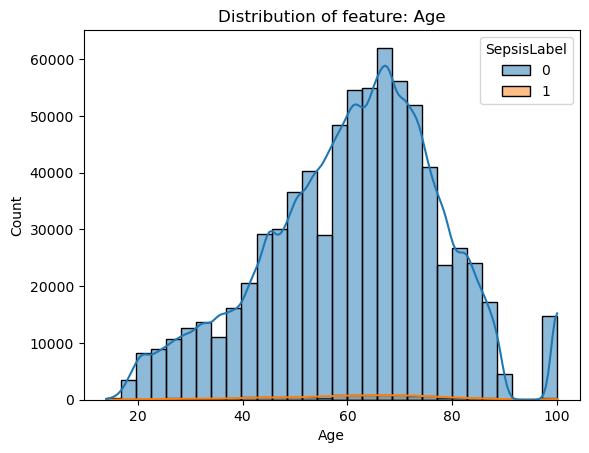

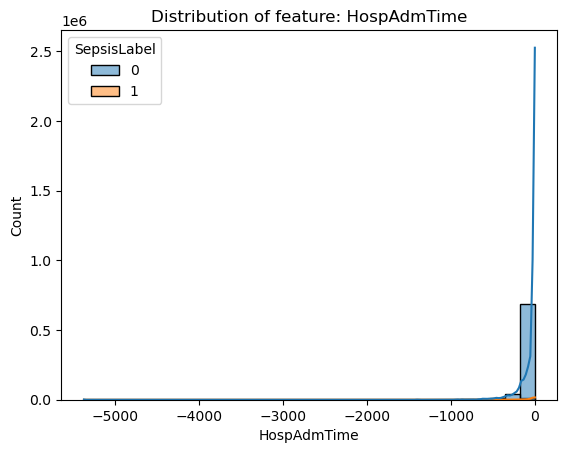

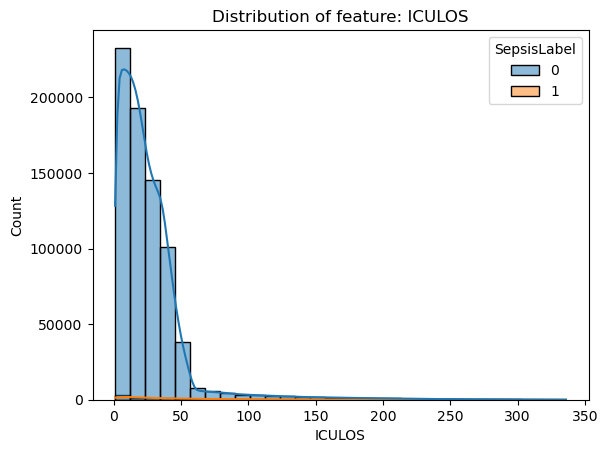

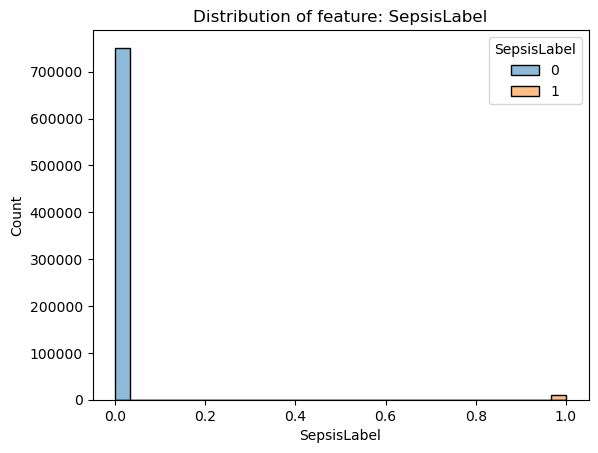

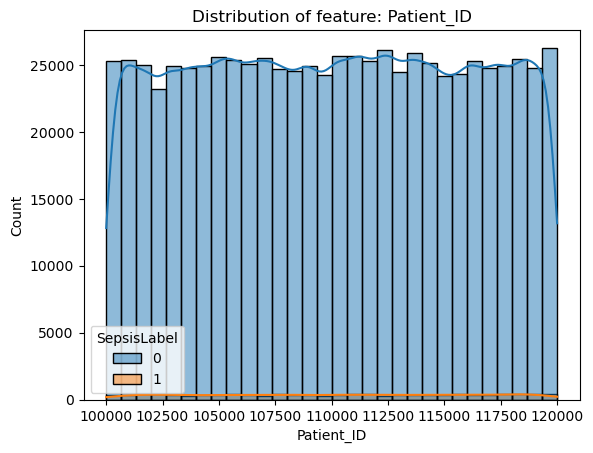

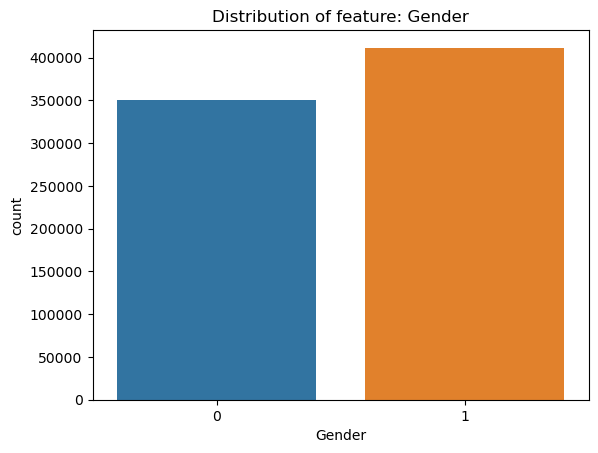

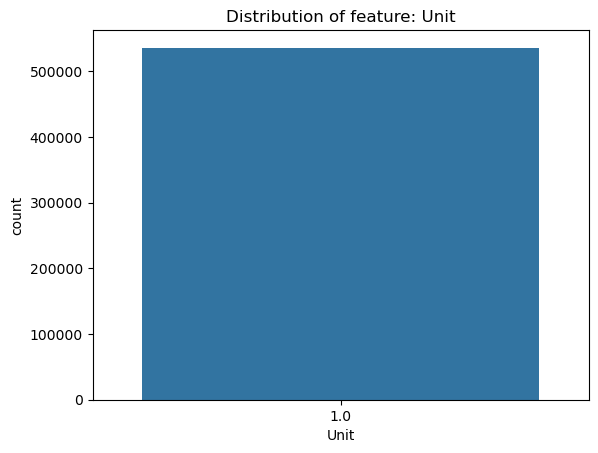

In [32]:
# Continuous features of the testing dataset
continuous_features = ['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID']

# Categorical features of the testing dataset
categorical_features = ['Gender', 'Unit']

# Plotting histograms for the continuous columns of testing dataset
for feature in continuous_features:
    sns.histplot(data=data_test, x=feature, hue='SepsisLabel', kde=True, bins=30)
    plt.title(f'Distribution of feature: {feature}')
    plt.show()

# Plot bar plots for categorical columns of testing dataset
for feature in categorical_features:
    sns.countplot(x=feature, data=data_test)
    plt.title(f'Distribution of feature: {feature}')
    plt.show()

In [33]:
#Filling the missing values of training data with forward and backward fill method and grouping with the patient_id
groupby_pid = data_train.groupby('Patient_ID')
data_train = groupby_pid.apply(lambda x : x.bfill().ffill())

data_train.reset_index(drop=True, inplace=True)

data_train

Hour     HR  O2Sat   Temp     MAP  Resp  FiO2  SaO2   AST   BUN  ...  \
0          0   97.0   95.0  36.11   75.33  19.0  0.28  88.0  16.0  14.0  ...   
1          1   97.0   95.0  36.11   75.33  19.0  0.28  88.0  16.0  14.0  ...   
2          2   89.0   99.0  36.11   86.00  22.0  0.28  88.0  16.0  14.0  ...   
3          3   90.0   95.0  36.11   91.33  30.0  0.28  88.0  16.0  14.0  ...   
4          4  103.0   88.5  36.11   91.33  24.5  0.28  88.0  16.0  14.0  ...   
...      ...    ...    ...    ...     ...   ...   ...   ...   ...   ...  ...   
790210    28   88.0   98.0  38.72   81.00  16.0  0.50  97.0  90.0  26.0  ...   
790211    29   96.0   98.0  38.72   97.00  16.0  0.50  97.0  90.0  26.0  ...   
790212    30  140.0   97.0  38.72   81.50  16.0  0.50  98.0  90.0  26.0  ...   
790213    31  120.0   96.0  38.72  118.00  16.0  0.50  98.0  90.0  26.0  ...   
790214    32  115.0   95.0  38.72  117.00  16.0  0.50  98.0  90.0  26.0  ...   

         Hgb   WBC  Platelets    Age  Gender  HospAdmTime  ICULOS  \
0       12.5   5.7      317.0  83.14       0        -0.03       1   
1       12.5   5.7      317.0  83.14       0        -0.03       2   
2       12.5   5.7      317.0  83.14       0        -0.03       3   
3       12.5   5.7      317.0  83.14       0        -0.03       4   
4       12.5   5.7      317.0  83.14       0        -0.03       5   
...      ...   ...        ...    ...     ...          ...     ...   
790210  10.6  11.8      284.0  62.29       1        -0.03      31   
790211  10.6  11.8      284.0  62.29       1        -0.03      32   
790212  10.6  11.8      284.0  62.29       1        -0.03      33   
790213  10.6  11.8      284.0  62.29       1        -0.03      34   
790214  10.6  11.8      284.0  62.29       1        -0.03      35   

        SepsisLabel  Patient_ID  Unit  
0                 0           1   NaN  
1                 0           1   NaN  
2                 0           1   NaN  
3                 0           1   NaN  
4                 0           1   NaN  
...             ...         ...   ...  
790210            1       20643   NaN  
790211            1       20643   NaN  
790212            1       20643   NaN  
790213            1       20643   NaN  
790214            1       20643   NaN  

[790215 rows x 28 columns]

In [34]:
#Filling the missing values of testing data with forward and backward fill method and grouping with the patient_id
groupby_pid = data_test.groupby('Patient_ID')
data_test = groupby_pid.apply(lambda x : x.bfill().ffill())

data_test.reset_index(drop=True, inplace=True)

data_test

Hour    HR  O2Sat  Temp   MAP  Resp  FiO2  SaO2   AST   BUN  ...  \
0          0  93.0   92.5  36.5  76.0  22.0   NaN   NaN   NaN  30.0  ...   
1          1  93.0   92.5  36.5  76.0  22.0   NaN   NaN   NaN  30.0  ...   
2          2  91.0   96.0  36.5  84.5  23.5   NaN   NaN   NaN  30.0  ...   
3          3  93.0   98.0  36.5  87.0  21.0   NaN   NaN   NaN  30.0  ...   
4          4  93.0   95.0  36.5  81.0  20.0   NaN   NaN   NaN  30.0  ...   
...      ...   ...    ...   ...   ...   ...   ...   ...   ...   ...  ...   
761990    30  80.0   96.0  36.6  87.0  15.0   NaN   NaN  18.0  11.0  ...   
761991    31  74.0   97.0  36.6  83.0  15.0   NaN   NaN  18.0  11.0  ...   
761992    32  78.0   98.0  36.6  83.0  15.0   NaN   NaN  18.0  11.0  ...   
761993    33  82.0   99.0  36.6  91.0  16.0   NaN   NaN  18.0  11.0  ...   
761994    34  80.0   97.0  36.6  97.0  15.0   NaN   NaN  18.0  11.0  ...   

         Hgb   WBC  Platelets   Age  Gender  HospAdmTime  ICULOS  SepsisLabel  \
0       11.3  10.8      170.0  73.0       1      -214.64       1            0   
1       11.3  10.8      170.0  73.0       1      -214.64       2            0   
2       11.3  10.8      170.0  73.0       1      -214.64       3            0   
3       11.3  10.8      170.0  73.0       1      -214.64       4            0   
4       11.3  10.8      170.0  73.0       1      -214.64       5            0   
...      ...   ...        ...   ...     ...          ...     ...          ...   
761990  11.6   5.4      216.0  62.0       0         0.00      31            0   
761991  11.6   5.4      216.0  62.0       0         0.00      32            0   
761992  11.6   5.4      216.0  62.0       0         0.00      33            0   
761993  11.6   5.4      216.0  62.0       0         0.00      34            0   
761994  11.6   5.4      216.0  62.0       0         0.00      35            0   

        Patient_ID  Unit  
0           100001   1.0  
1           100001   1.0  
2           100001   1.0  
3           100001   1.0  
4           100001   1.0  
...            ...   ...  
761990      120000   NaN  
761991      120000   NaN  
761992      120000   NaN  
761993      120000   NaN  
761994      120000   NaN  

[761995 rows x 28 columns]

In [35]:
#printing the training data missing/duplicate values sum after filling
data_train.isna().sum()

Hour                     0
HR                       9
O2Sat                  211
Temp                  6746
MAP                     24
Resp                   701
FiO2                286023
SaO2                452658
AST                 524984
BUN                   7410
Chloride             10357
Creatinine            8135
Bilirubin_direct    760636
Glucose               7433
Lactate             442500
Bilirubin_total     529047
TroponinI           769337
Hct                   6156
Hgb                   9156
WBC                  11948
Platelets            11022
Age                      0
Gender                   0
HospAdmTime              8
ICULOS                   0
SepsisLabel              0
Patient_ID               0
Unit                386165
dtype: int64

In [36]:
#printing the testing data missing/duplicate values sum after filling
data_test.isna().sum()

Hour                     0
HR                     133
O2Sat                  163
Temp                   684
MAP                   2674
Resp                  1298
FiO2                493565
SaO2                524933
AST                 399629
BUN                  42782
Chloride            686668
Creatinine           42707
Bilirubin_direct    687058
Glucose              34613
Lactate             543675
Bilirubin_total     399166
TroponinI           502007
Hct                  52618
Hgb                  52363
WBC                  53671
Platelets            53404
Age                      0
Gender                   0
HospAdmTime              0
ICULOS                   0
SepsisLabel              0
Patient_ID               0
Unit                225795
dtype: int64

In [37]:
#removing the features which are having more number of missing values in the training data
features_drop = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
                 'Unit', 'Patient_ID']

data_train = data_train.drop(columns=features_drop)
data_train.head()

Hour     HR  O2Sat   Temp    MAP  Resp   BUN  Chloride  Creatinine  \
0     0   97.0   95.0  36.11  75.33  19.0  14.0      85.0         0.7   
1     1   97.0   95.0  36.11  75.33  19.0  14.0      85.0         0.7   
2     2   89.0   99.0  36.11  86.00  22.0  14.0      85.0         0.7   
3     3   90.0   95.0  36.11  91.33  30.0  14.0      85.0         0.7   
4     4  103.0   88.5  36.11  91.33  24.5  14.0      85.0         0.7   

   Glucose   Hct   Hgb  WBC  Platelets    Age  Gender  HospAdmTime  ICULOS  \
0    193.0  37.2  12.5  5.7      317.0  83.14       0        -0.03       1   
1    193.0  37.2  12.5  5.7      317.0  83.14       0        -0.03       2   
2    193.0  37.2  12.5  5.7      317.0  83.14       0        -0.03       3   
3    193.0  37.2  12.5  5.7      317.0  83.14       0        -0.03       4   
4    193.0  37.2  12.5  5.7      317.0  83.14       0        -0.03       5   

   SepsisLabel  
0            0  
1            0  
2            0  
3            0  
4            0

In [38]:
#removing the features which are having more number of missing values in the testing data
features_drop = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
                 'Unit', 'Patient_ID']

data_test = data_test.drop(columns=features_drop)
data_test

Hour    HR  O2Sat  Temp   MAP  Resp   BUN  Chloride  Creatinine  \
0          0  93.0   92.5  36.5  76.0  22.0  30.0       NaN        1.50   
1          1  93.0   92.5  36.5  76.0  22.0  30.0       NaN        1.50   
2          2  91.0   96.0  36.5  84.5  23.5  30.0       NaN        1.50   
3          3  93.0   98.0  36.5  87.0  21.0  30.0       NaN        1.50   
4          4  93.0   95.0  36.5  81.0  20.0  30.0       NaN        1.50   
...      ...   ...    ...   ...   ...   ...   ...       ...         ...   
761990    30  80.0   96.0  36.6  87.0  15.0  11.0       NaN        0.54   
761991    31  74.0   97.0  36.6  83.0  15.0  11.0       NaN        0.54   
761992    32  78.0   98.0  36.6  83.0  15.0  11.0       NaN        0.54   
761993    33  82.0   99.0  36.6  91.0  16.0  11.0       NaN        0.54   
761994    34  80.0   97.0  36.6  97.0  15.0  11.0       NaN        0.54   

        Glucose   Hct   Hgb   WBC  Platelets   Age  Gender  HospAdmTime  \
0         233.0  35.3  11.3  10.8      170.0  73.0       1      -214.64   
1         233.0  35.3  11.3  10.8      170.0  73.0       1      -214.64   
2         233.0  35.3  11.3  10.8      170.0  73.0       1      -214.64   
3         154.0  35.3  11.3  10.8      170.0  73.0       1      -214.64   
4         154.0  35.3  11.3  10.8      170.0  73.0       1      -214.64   
...         ...   ...   ...   ...        ...   ...     ...          ...   
761990    242.0  37.1  11.6   5.4      216.0  62.0       0         0.00   
761991    242.0  37.1  11.6   5.4      216.0  62.0       0         0.00   
761992    242.0  37.1  11.6   5.4      216.0  62.0       0         0.00   
761993    242.0  37.1  11.6   5.4      216.0  62.0       0         0.00   
761994    242.0  37.1  11.6   5.4      216.0  62.0       0         0.00   

        ICULOS  SepsisLabel  
0            1            0  
1            2            0  
2            3            0  
3            4            0  
4            5            0  
...        ...          ...  
761990      31            0  
761991      32            0  
761992      33            0  
761993      34            0  
761994      35            0  

[761995 rows x 19 columns]

plotting the histograms and Q-Q plots for all the features to avoid the single domination of any feature over the feature. 

O2Sat
Processing column: O2Sat
Actual plot


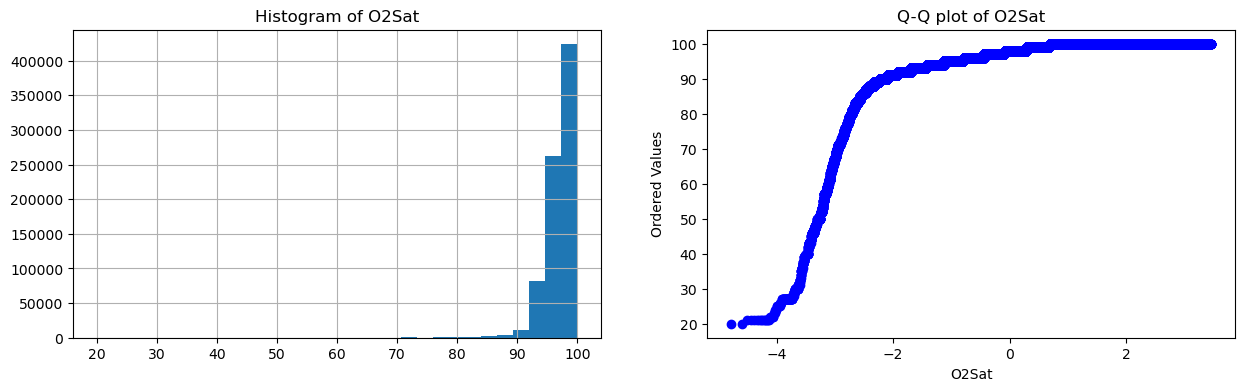

Error with Yeo-Johnson transformation on O2Sat: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


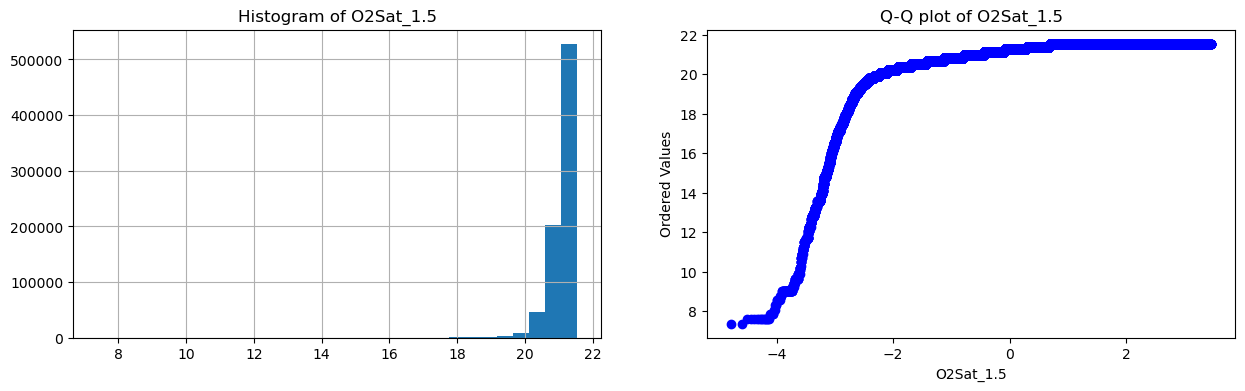

Created column: O2Sat_1.5
**0.5 plot


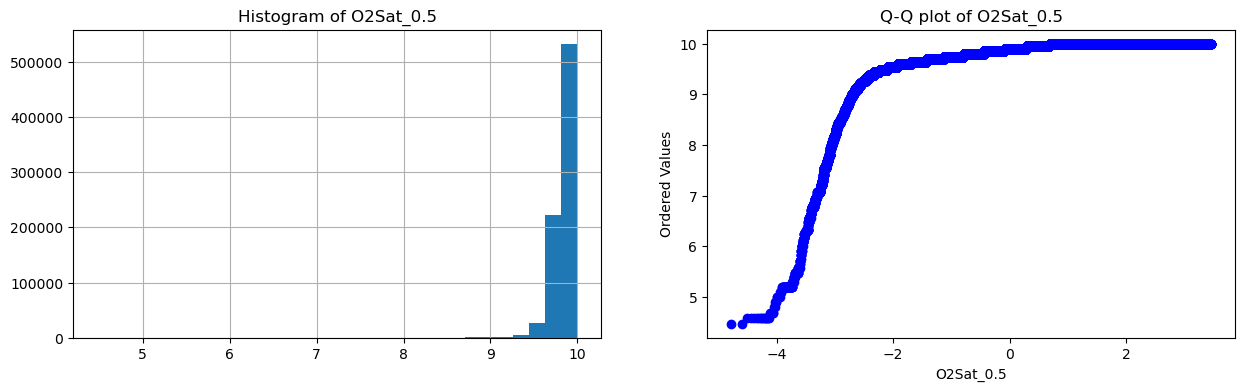

Created column: O2Sat_0.5
Reciprocal plot


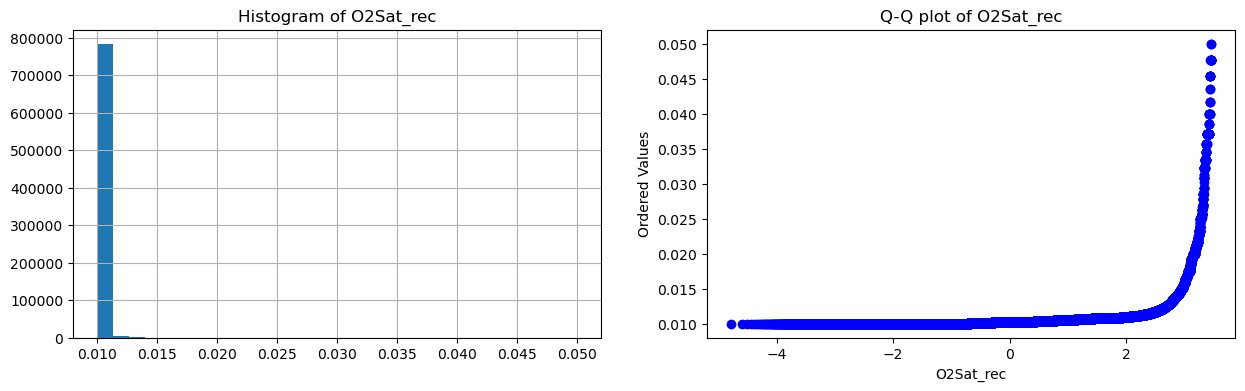

Created column: O2Sat_rec
Logarithmic plot


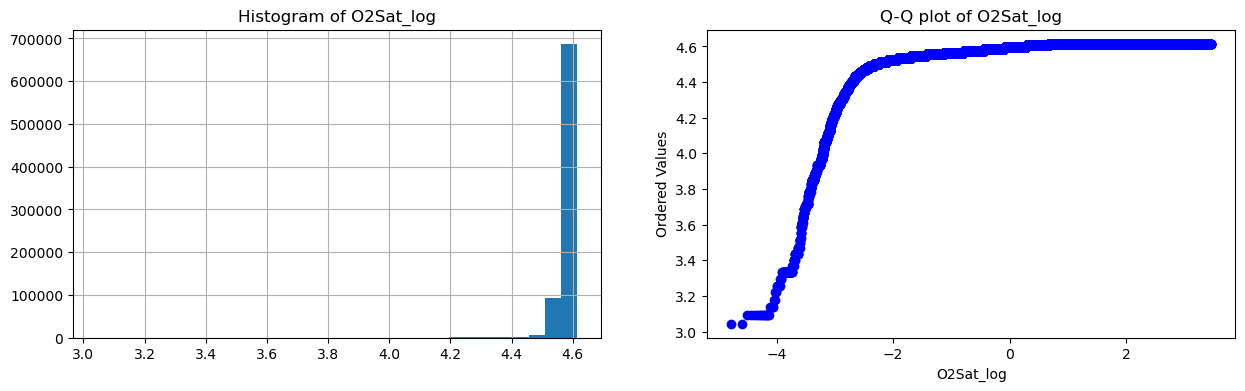

Created column: O2Sat_log
Temp
Processing column: Temp
Actual plot


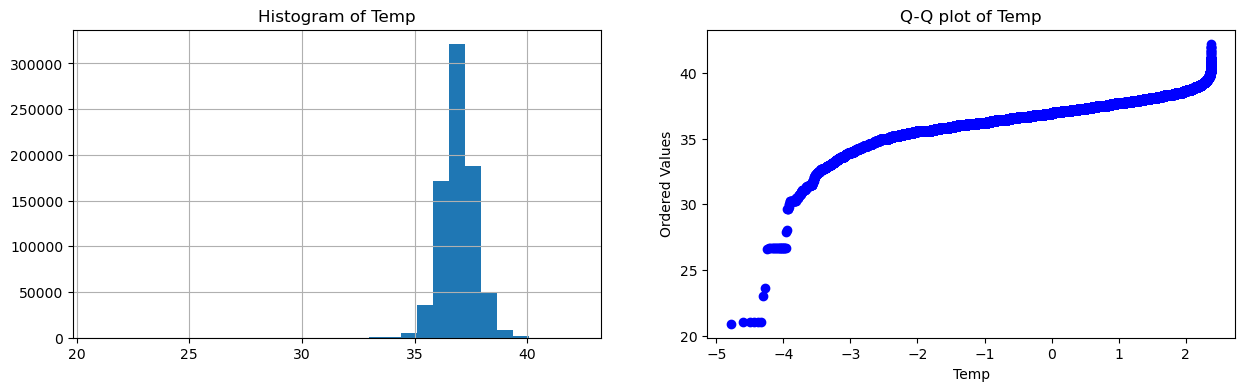

Error with Yeo-Johnson transformation on Temp: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


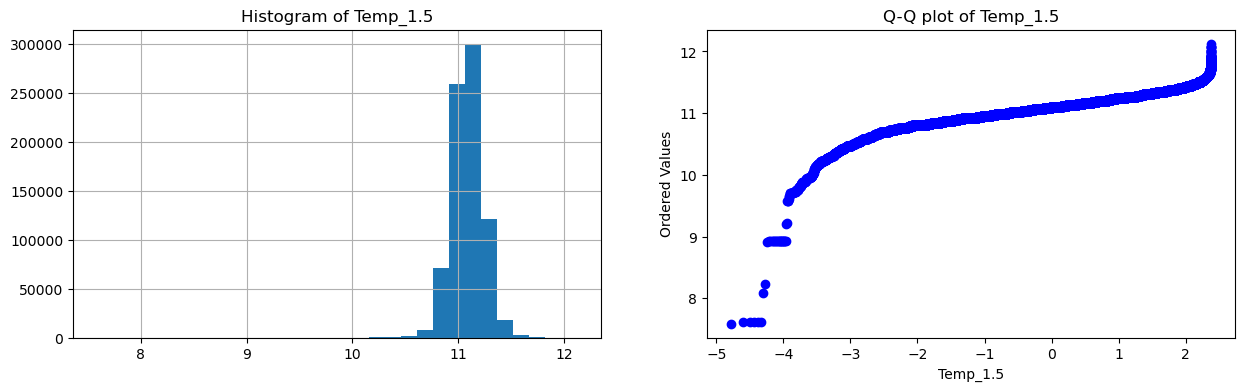

Created column: Temp_1.5
**0.5 plot


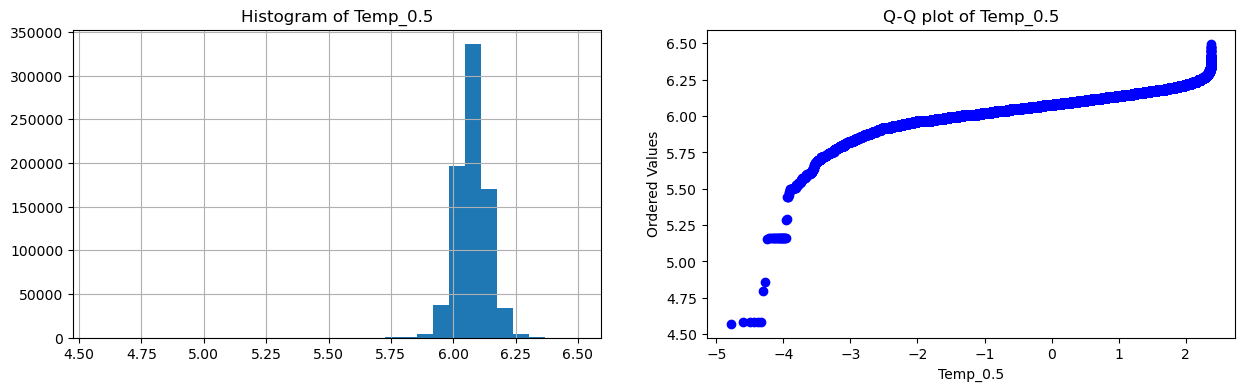

Created column: Temp_0.5
Reciprocal plot


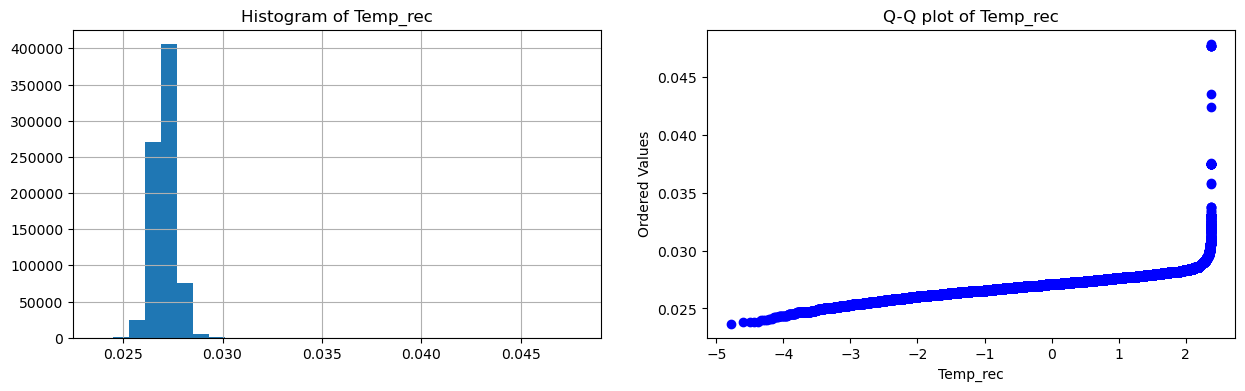

Created column: Temp_rec
Logarithmic plot


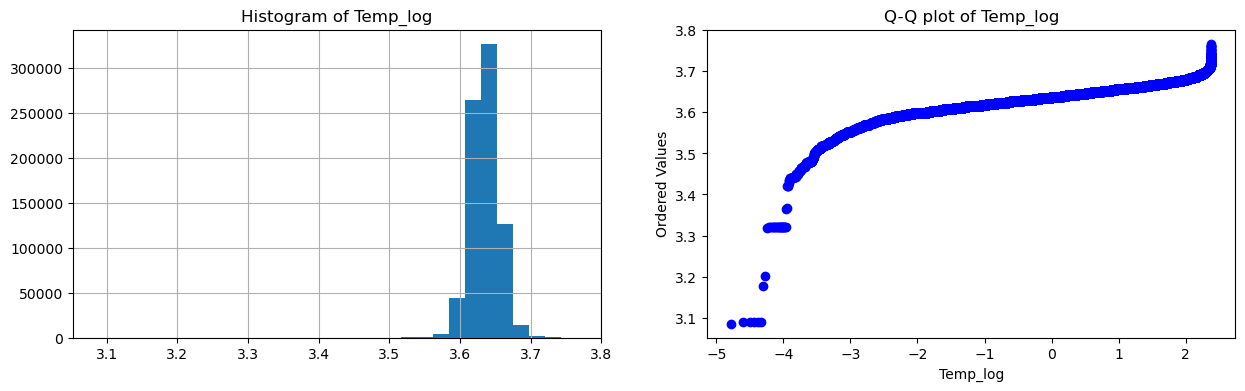

Created column: Temp_log
MAP
Processing column: MAP
Actual plot


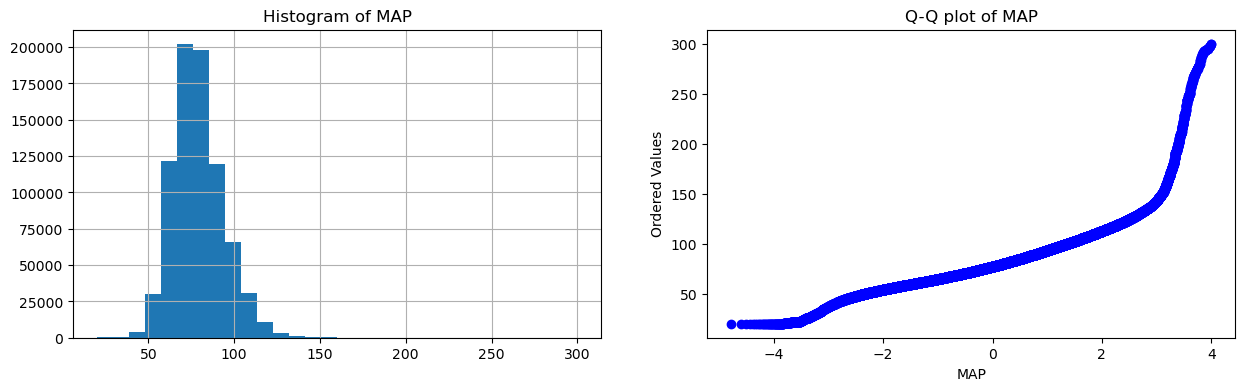

Error with Yeo-Johnson transformation on MAP: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


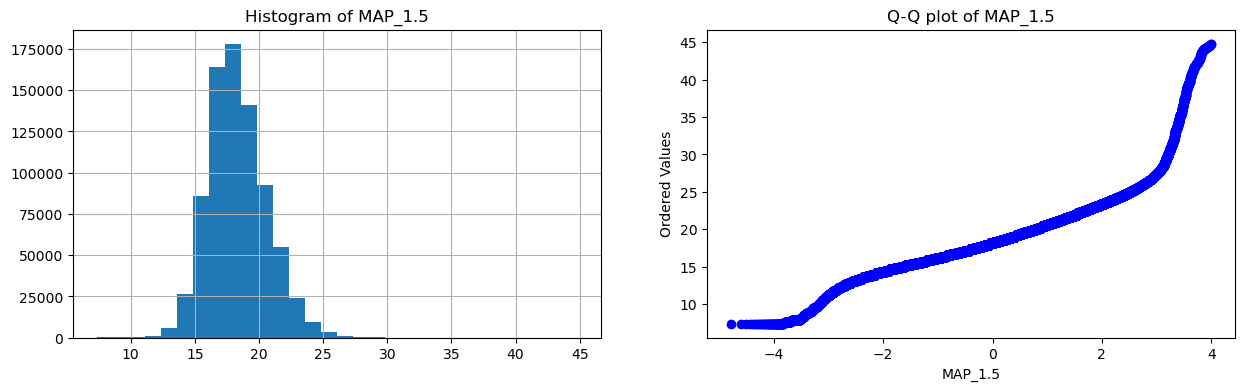

Created column: MAP_1.5
**0.5 plot


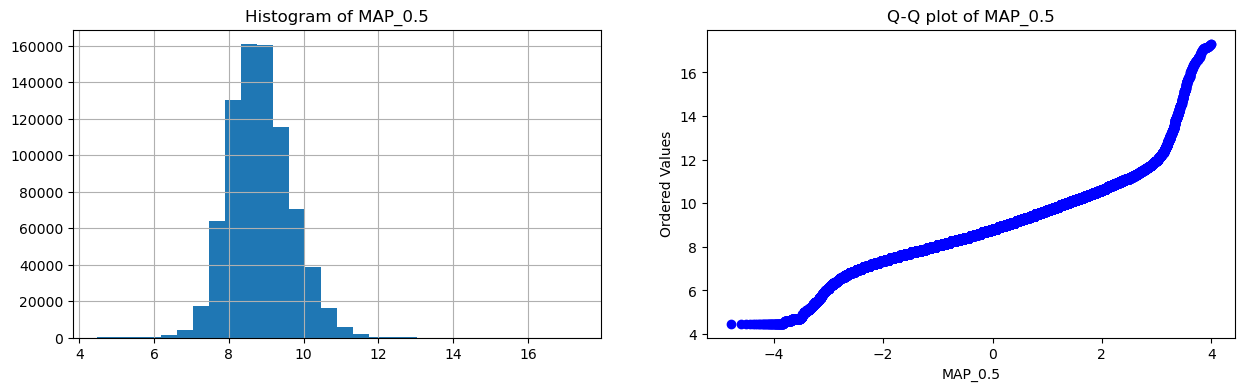

Created column: MAP_0.5
Reciprocal plot


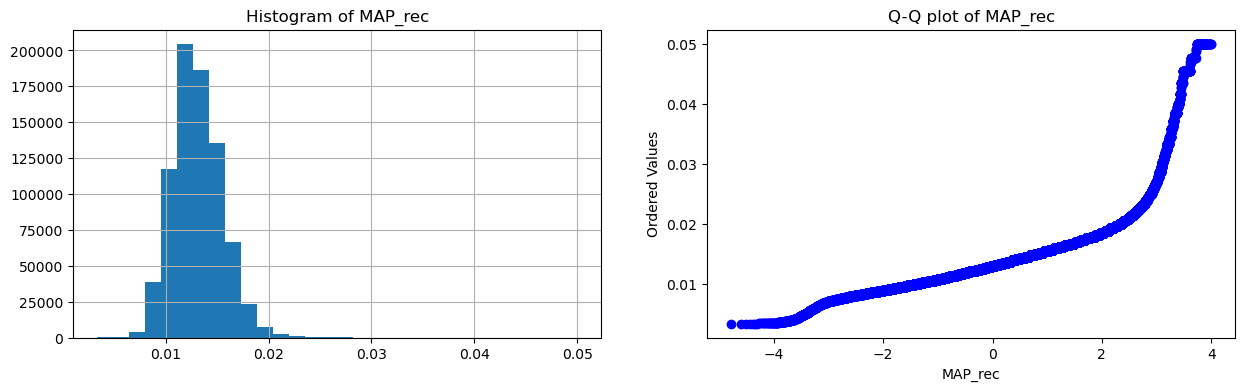

Created column: MAP_rec
Logarithmic plot


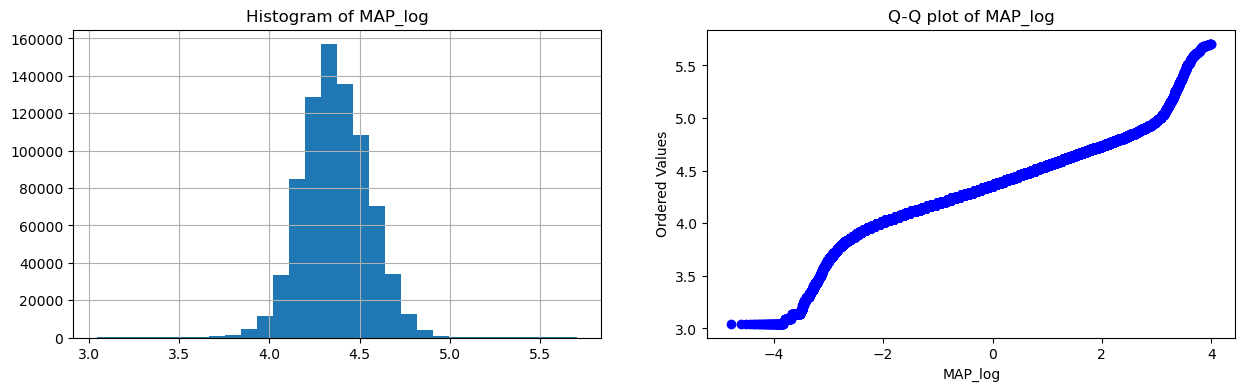

Created column: MAP_log
BUN
Processing column: BUN
Actual plot


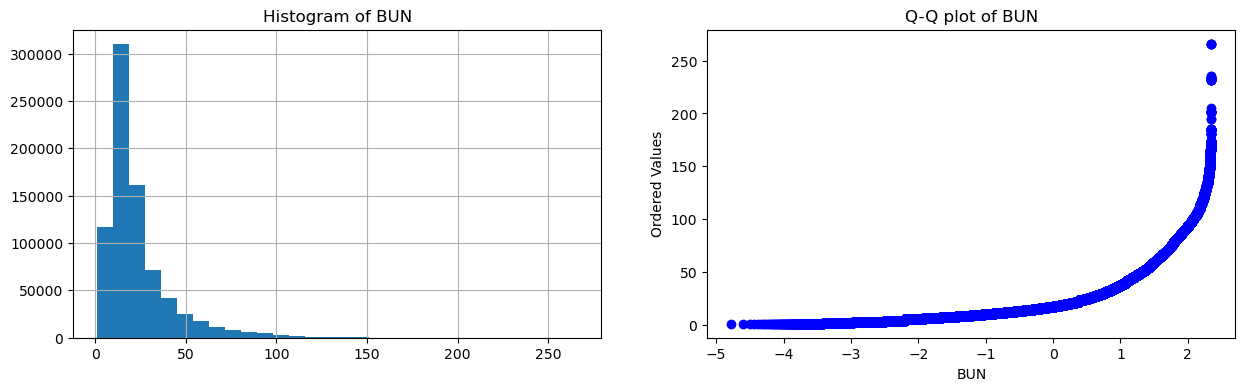

Error with Yeo-Johnson transformation on BUN: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


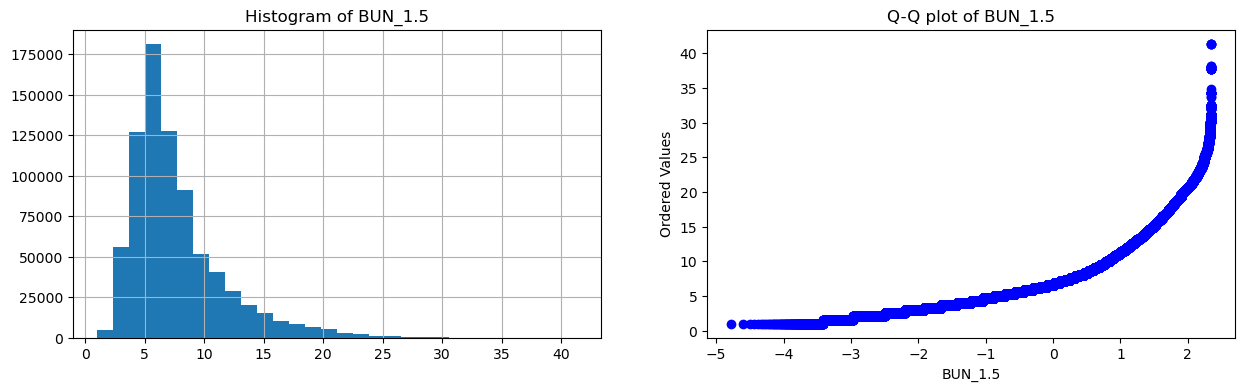

Created column: BUN_1.5
**0.5 plot


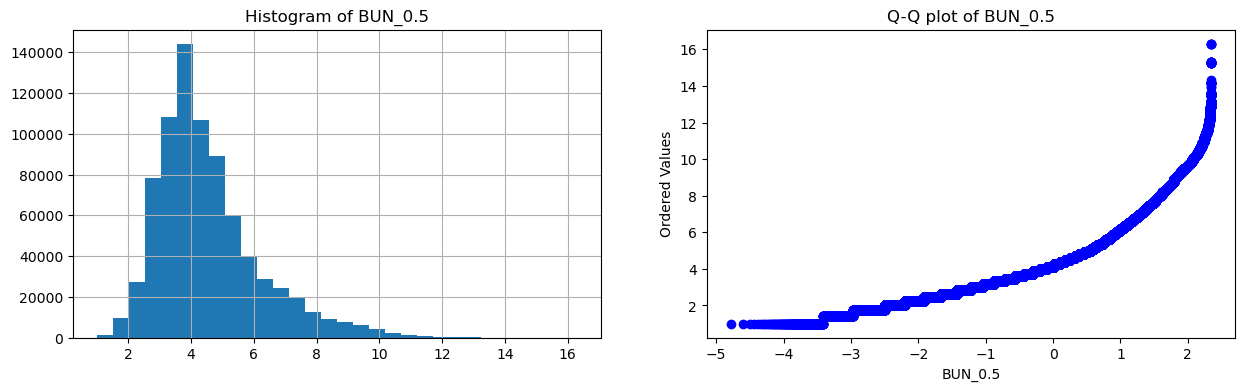

Created column: BUN_0.5
Reciprocal plot


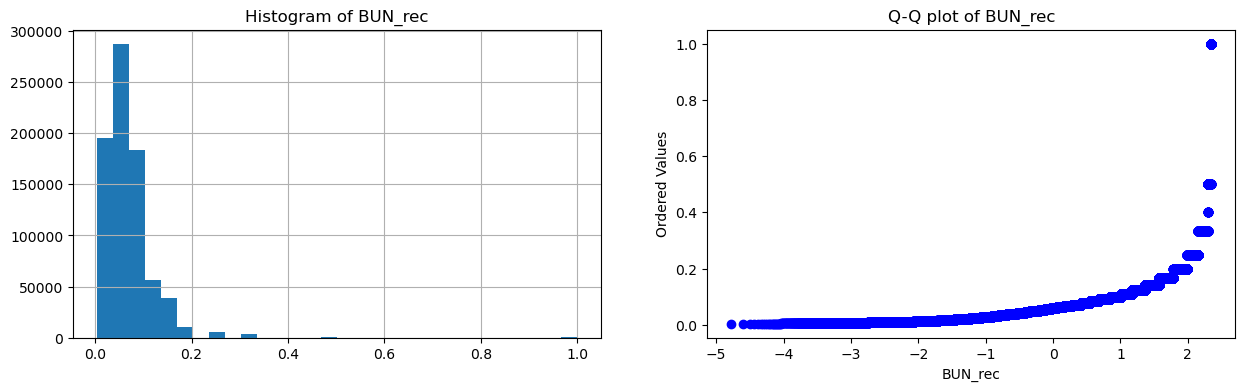

Created column: BUN_rec
Logarithmic plot


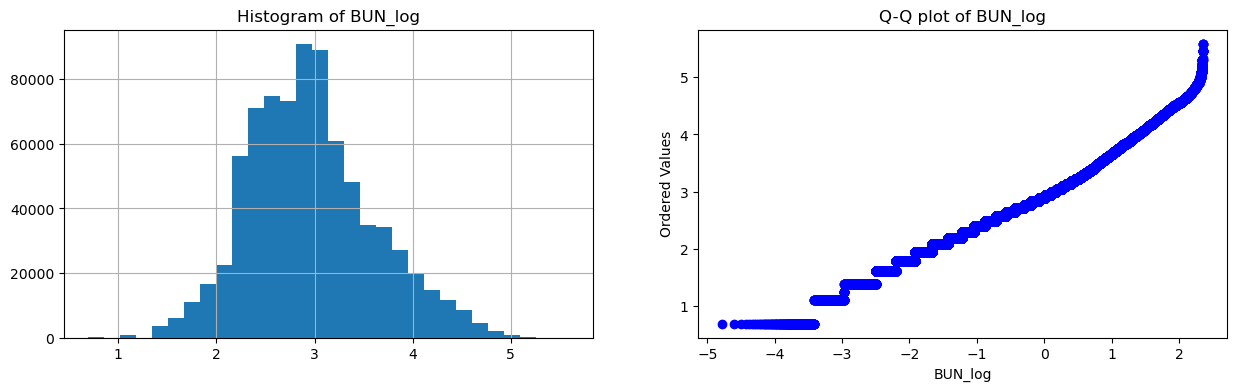

Created column: BUN_log
Creatinine
Processing column: Creatinine
Actual plot


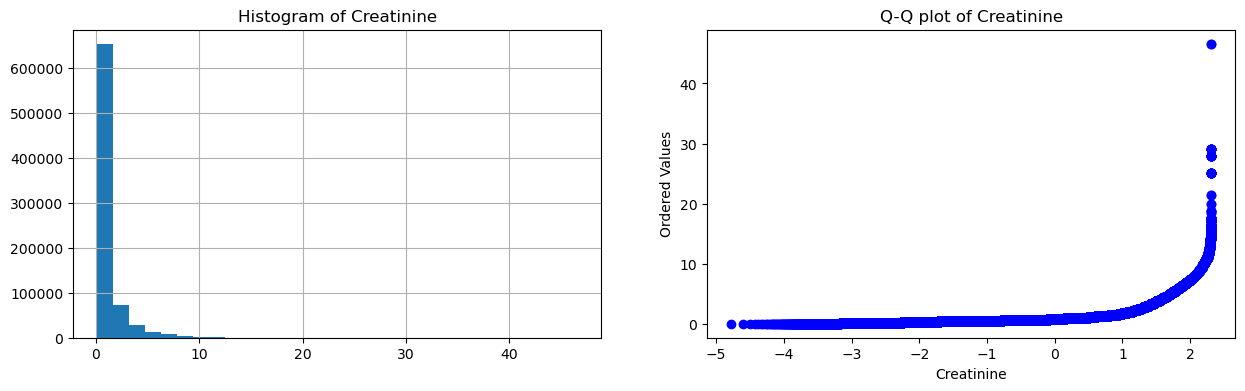

Error with Yeo-Johnson transformation on Creatinine: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


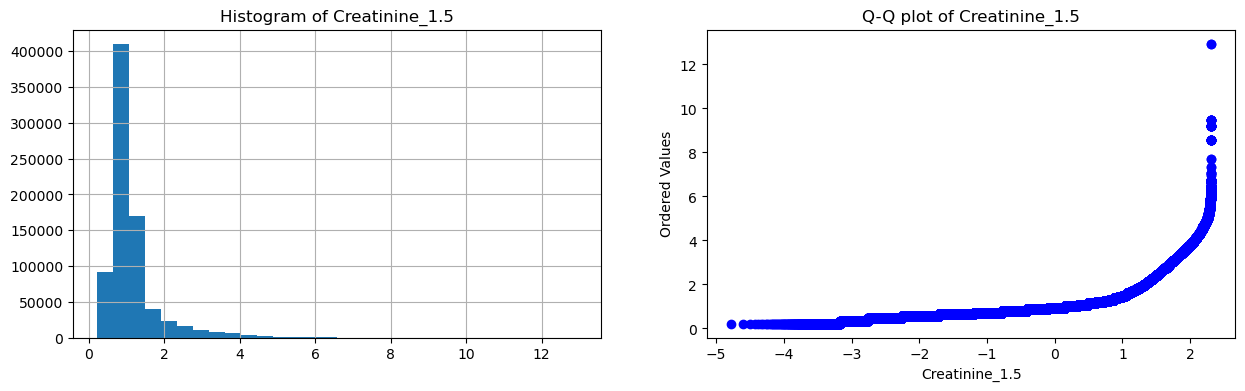

Created column: Creatinine_1.5
**0.5 plot


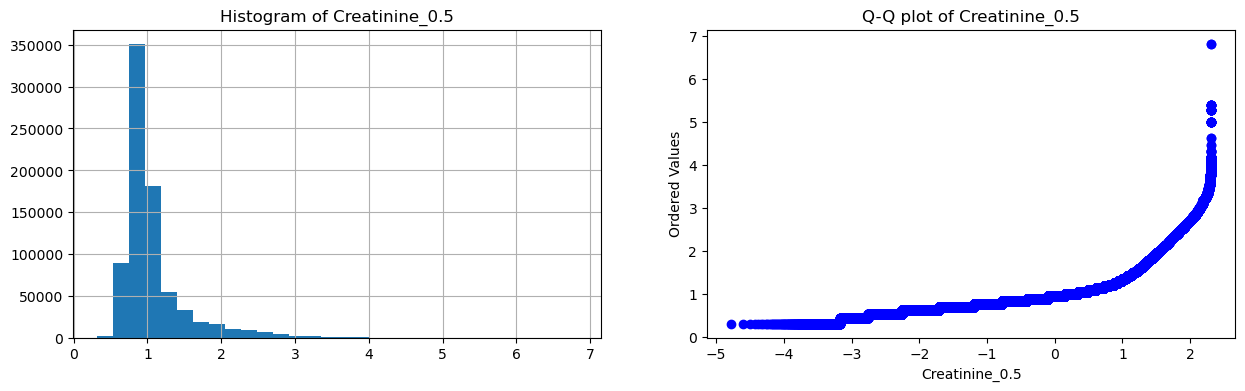

Created column: Creatinine_0.5
Reciprocal plot


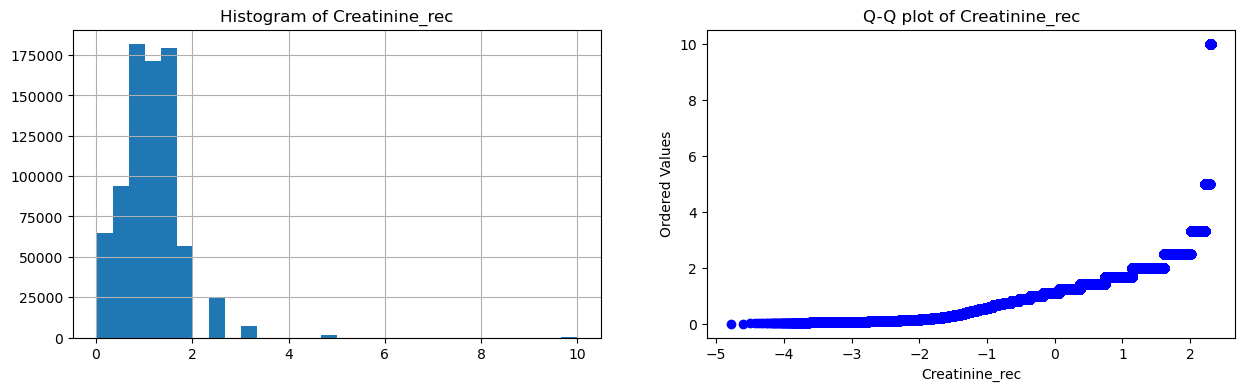

Created column: Creatinine_rec
Logarithmic plot


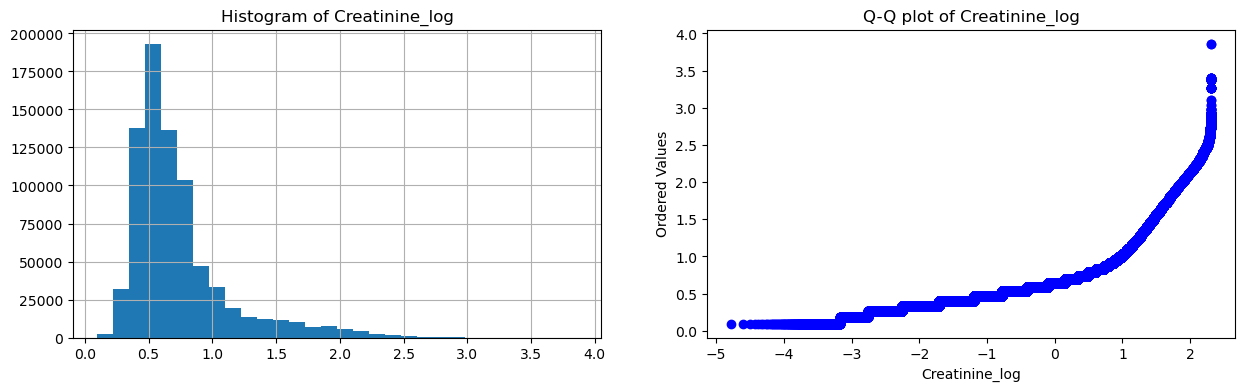

Created column: Creatinine_log
Glucose
Processing column: Glucose
Actual plot


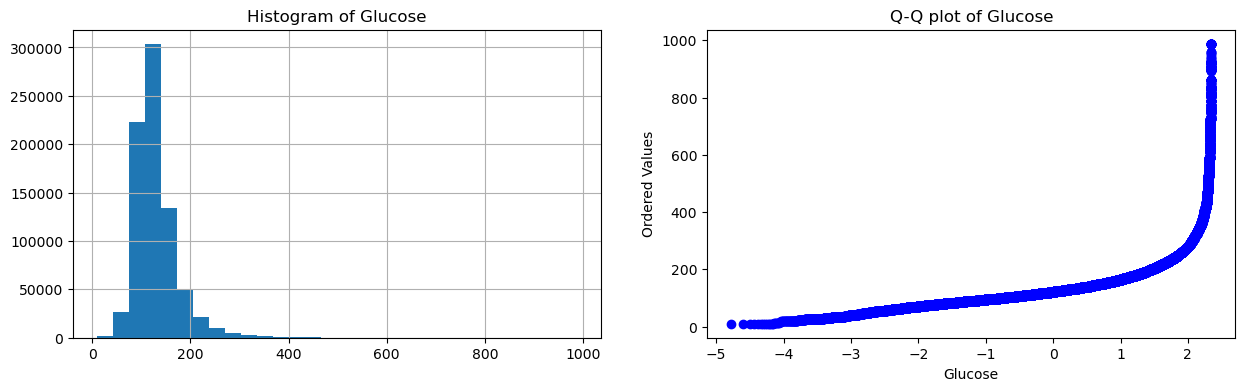

Error with Yeo-Johnson transformation on Glucose: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


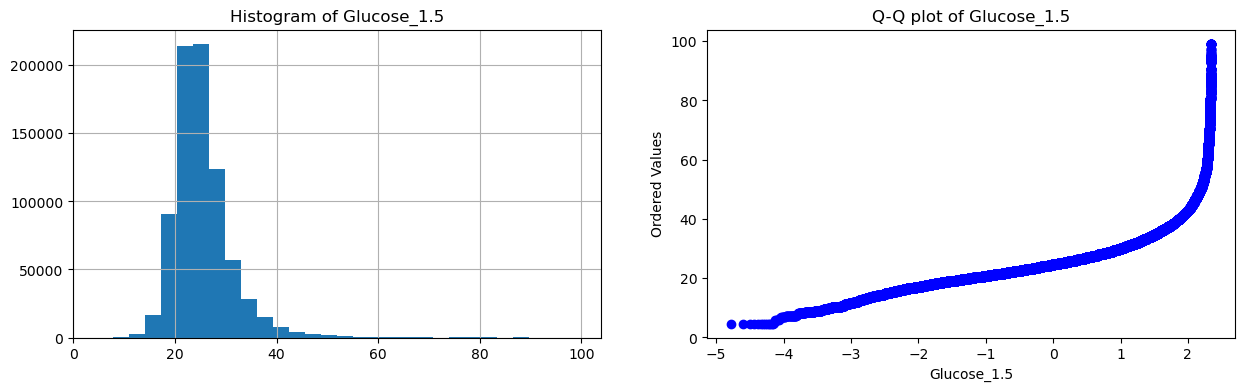

Created column: Glucose_1.5
**0.5 plot


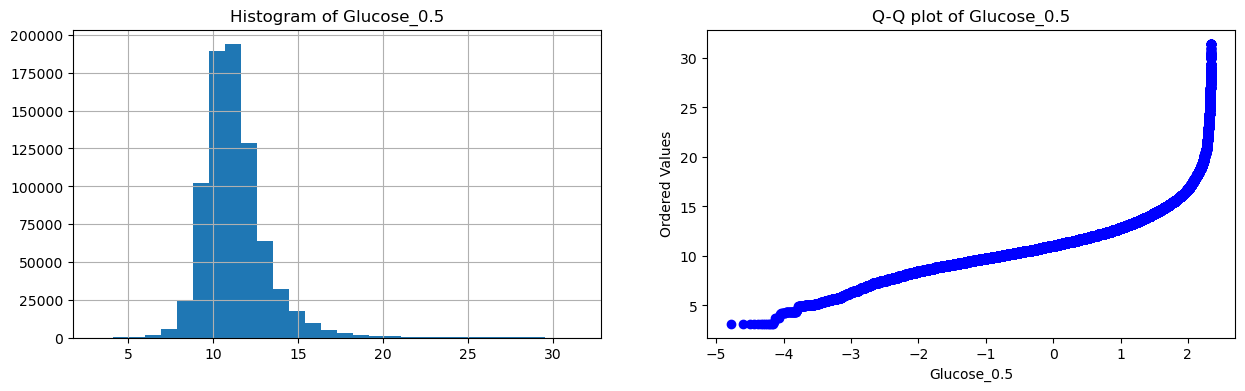

Created column: Glucose_0.5
Reciprocal plot


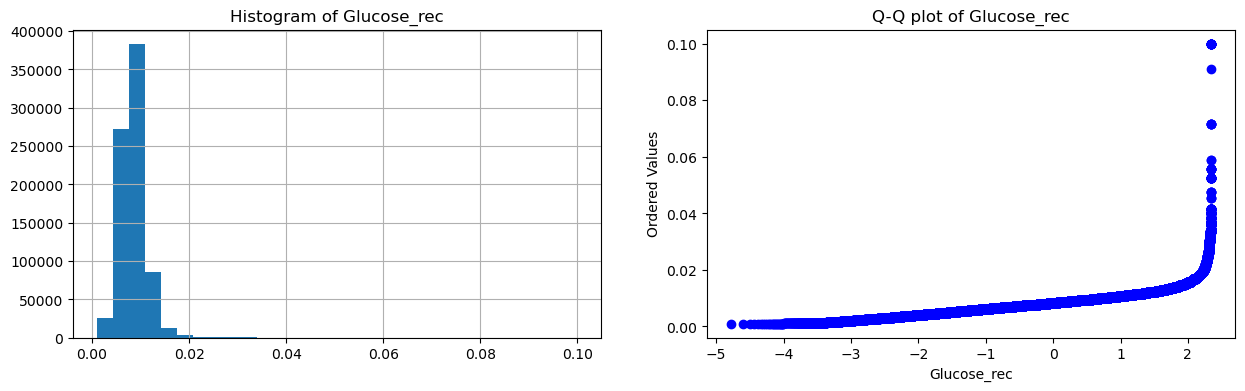

Created column: Glucose_rec
Logarithmic plot


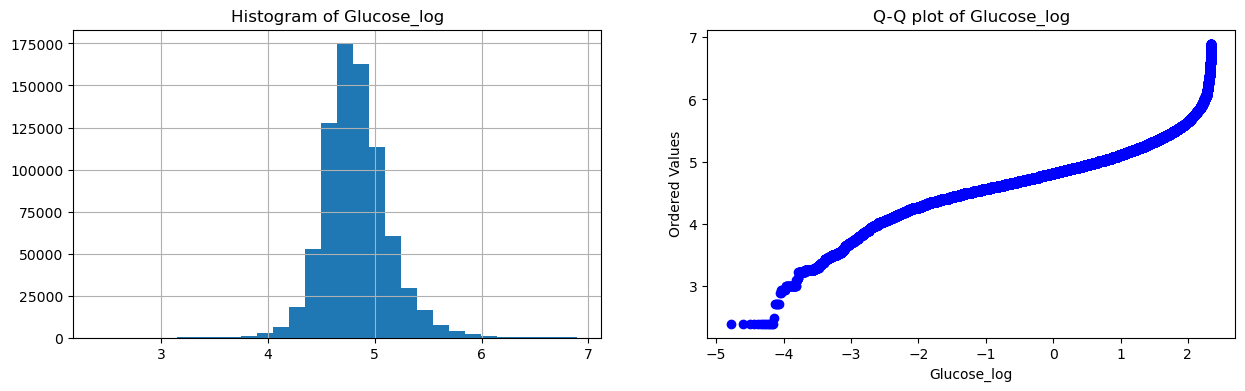

Created column: Glucose_log
WBC
Processing column: WBC
Actual plot


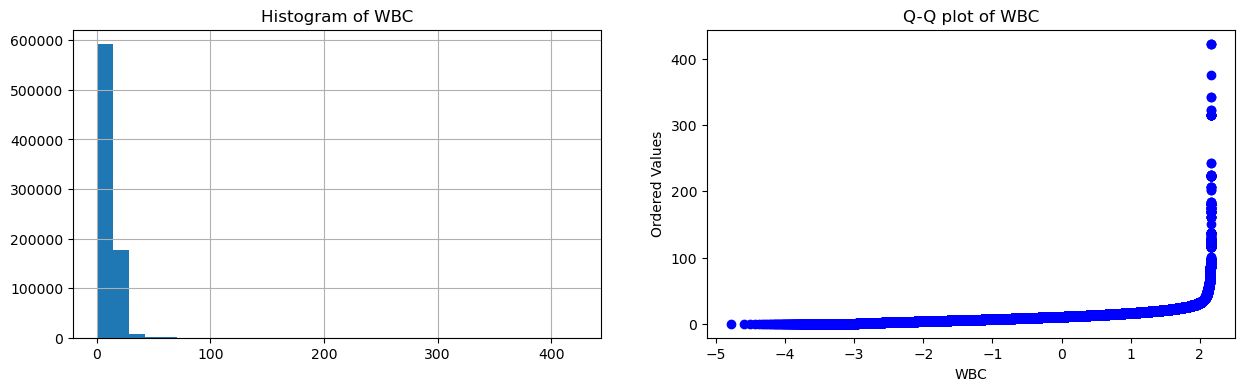

Error with Yeo-Johnson transformation on WBC: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


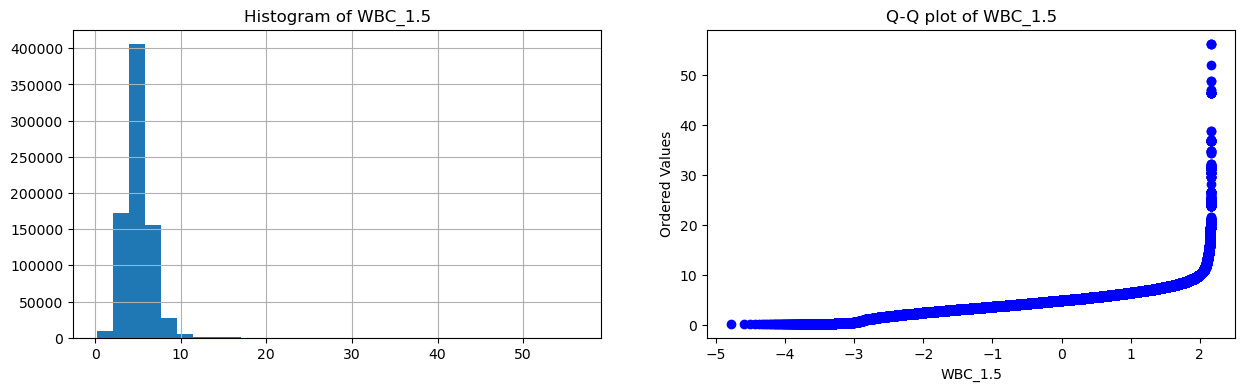

Created column: WBC_1.5
**0.5 plot


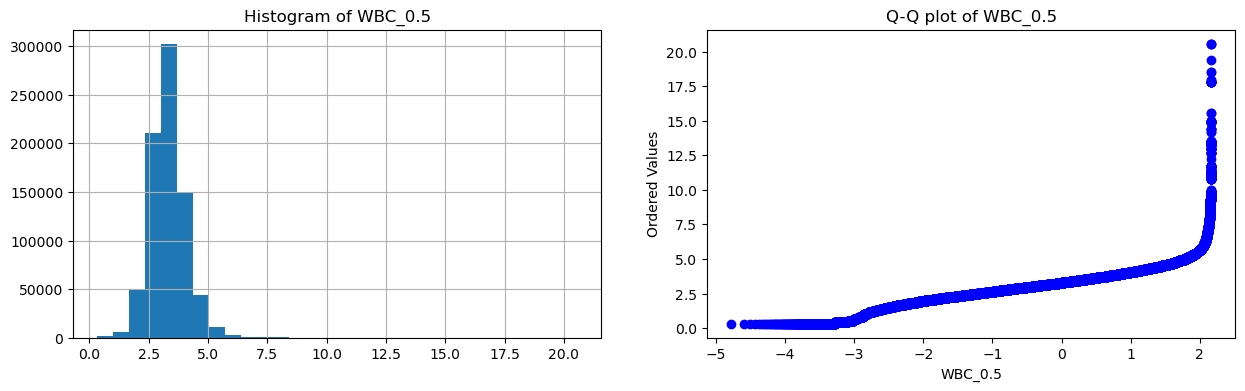

Created column: WBC_0.5
Reciprocal plot


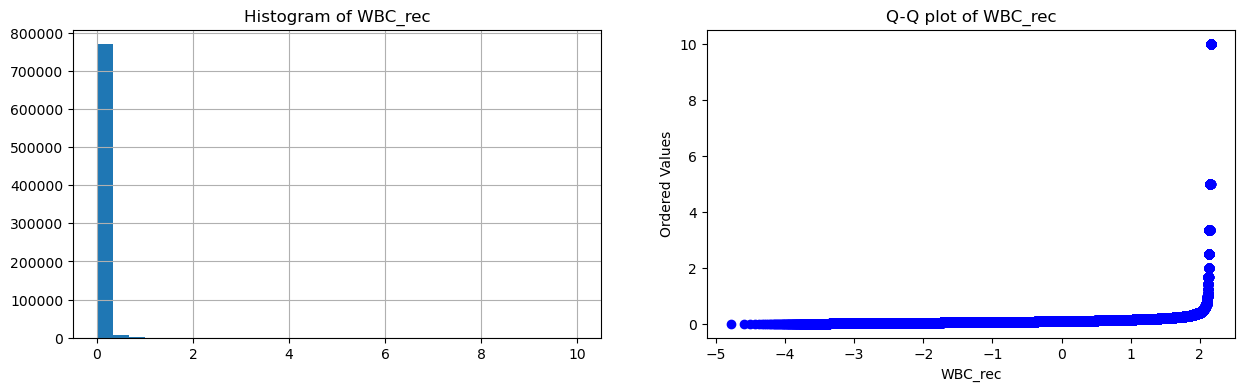

Created column: WBC_rec
Logarithmic plot


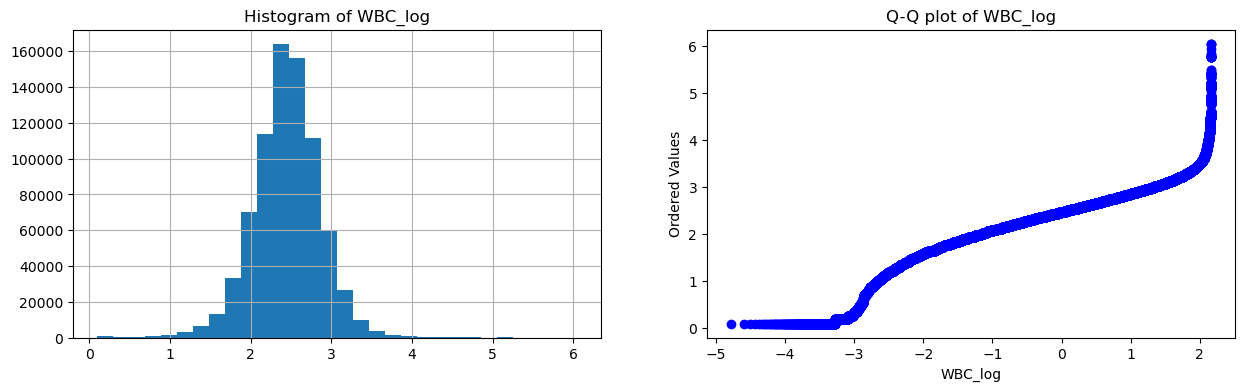

Created column: WBC_log
Platelets
Processing column: Platelets
Actual plot


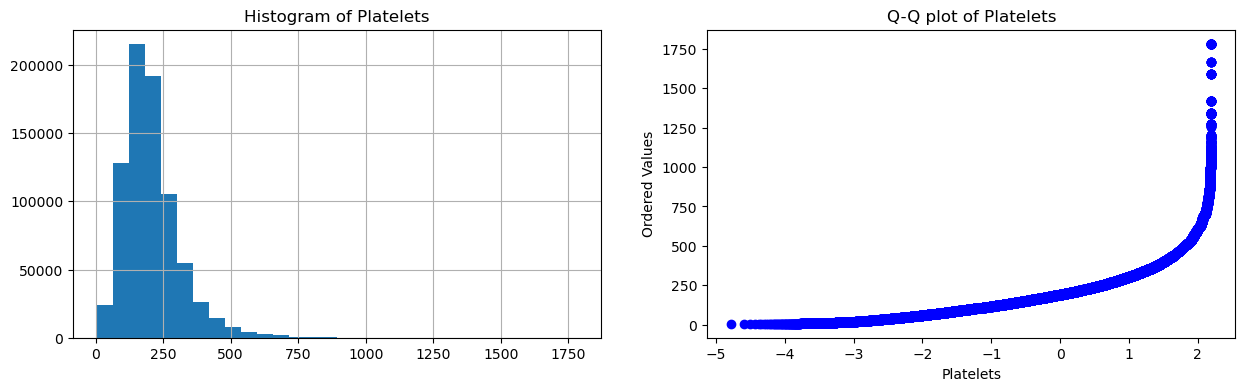

Error with Yeo-Johnson transformation on Platelets: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
**1/1.5 plot


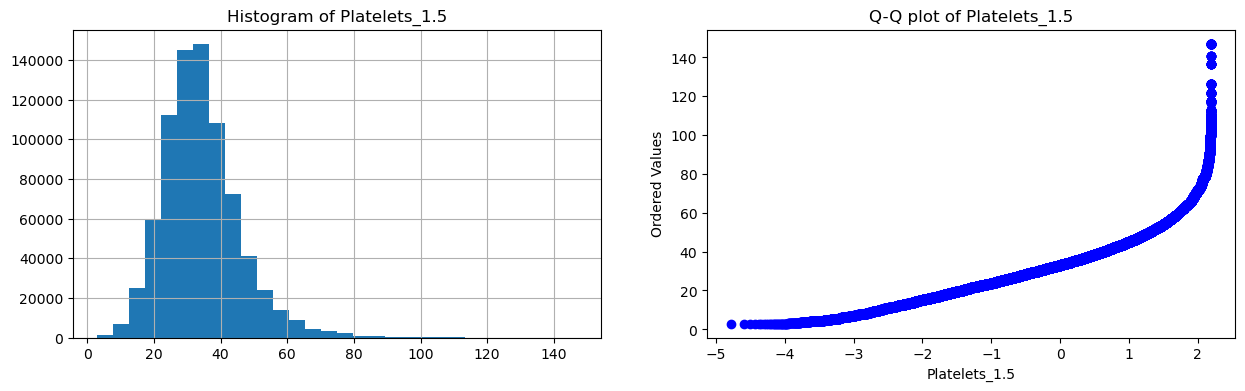

Created column: Platelets_1.5
**0.5 plot


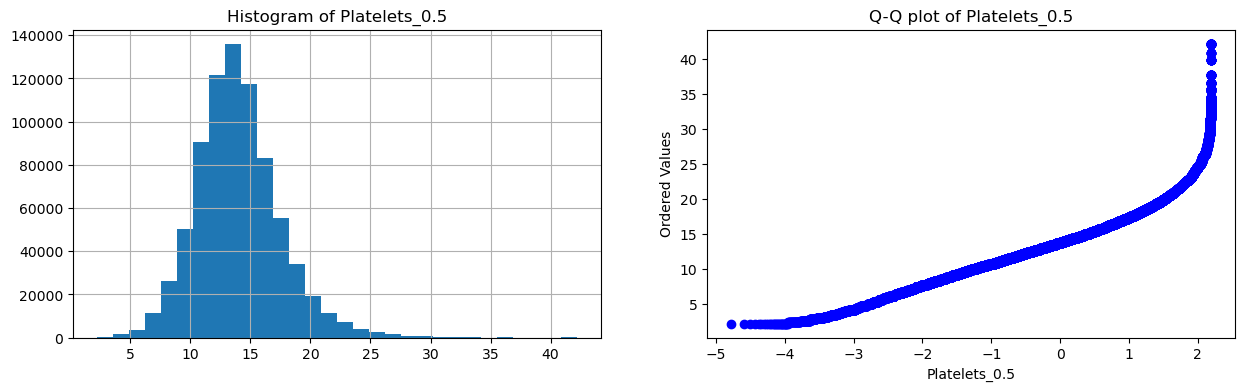

Created column: Platelets_0.5
Reciprocal plot


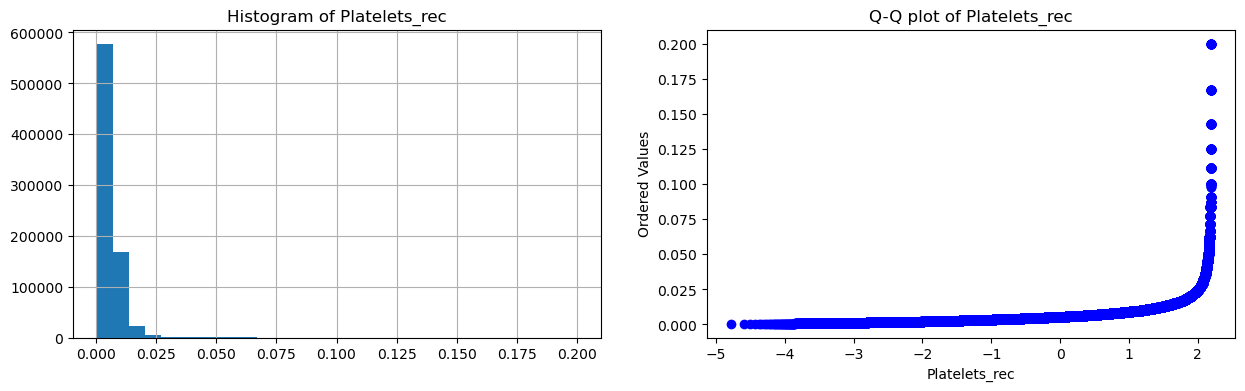

Created column: Platelets_rec
Logarithmic plot


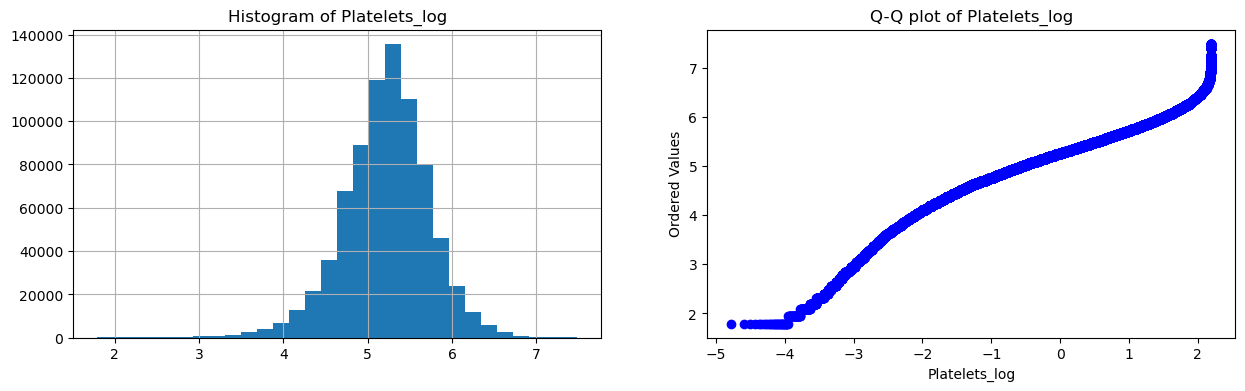

Created column: Platelets_log


In [39]:
# Function to create diagnostic plots
def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15, 4))
    
    # Histogram plot
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30, ax=ax)
    ax.set_title(f'Histogram of {variable}')
    
    # Q-Q plot
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    ax.set_title(f'Q-Q plot of {variable}')
    
    plt.xlabel(variable)
    plt.show()

# Function to apply transformations and plot
def try_gaussian(df, col, new_columns):
    print(f'Processing column: {col}')
    
    # Actual plot
    print('Actual plot')
    diagnostic_plots(df, col)
    
    # Apply Yeo-Johnson transformation
    try:
        df[f'{col}_yj'], param = stats.yeojohnson(df[col]) 
        new_columns.append(f'{col}_yj')
        print('Yeo-Johnson plot')
        diagnostic_plots(df, f'{col}_yj')
        print(f'Created column: {col}_yj')
    except Exception as e:
        print(f'Error with Yeo-Johnson transformation on {col}: {e}')
    
    # Apply exponential transformation
    try:
        df[f'{col}_1.5'] = df[col] ** (1 / 1.5)
        new_columns.append(f'{col}_1.5')
        print('**1/1.5 plot') 
        diagnostic_plots(df, f'{col}_1.5')
        print(f'Created column: {col}_1.5')
    except Exception as e:
        print(f'Error with exponential transformation (1/1.5) on {col}: {e}')
    
    # Apply square root transformation
    try:
        df[f'{col}_0.5'] = df[col] ** 0.5
        new_columns.append(f'{col}_0.5')
        print('**0.5 plot') 
        diagnostic_plots(df, f'{col}_0.5')
        print(f'Created column: {col}_0.5')
    except Exception as e:
        print(f'Error with square root transformation on {col}: {e}')
    
    # Apply reciprocal transformation
    try:
        df[f'{col}_rec'] = 1 / (df[col] + 0.00001)
        new_columns.append(f'{col}_rec')
        print('Reciprocal plot')
        diagnostic_plots(df, f'{col}_rec')
        print(f'Created column: {col}_rec')
    except Exception as e:
        print(f'Error with reciprocal transformation on {col}: {e}')
    
    # Apply logarithmic transformation
    try:
        df[f'{col}_log'] = np.log(df[col] + 1)
        new_columns.append(f'{col}_log')
        print('Logarithmic plot')
        diagnostic_plots(df, f'{col}_log')
        print(f'Created column: {col}_log')
    except Exception as e:
        print(f'Error with logarithmic transformation on {col}: {e}')

# List of columns to transform and plot
lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets']

# Assuming df_train_impute is your DataFrame
new_columns = []
for col in lst:
    print(col)
    try_gaussian(data_train, col, new_columns)

In [40]:
# Drop all newly created columns
data_train.drop(columns=new_columns, inplace=True)

In [41]:
#printing the training data after dropping the new_colmns
data_train

Hour     HR  O2Sat   Temp     MAP  Resp   BUN  Chloride  Creatinine  \
0          0   97.0   95.0  36.11   75.33  19.0  14.0      85.0         0.7   
1          1   97.0   95.0  36.11   75.33  19.0  14.0      85.0         0.7   
2          2   89.0   99.0  36.11   86.00  22.0  14.0      85.0         0.7   
3          3   90.0   95.0  36.11   91.33  30.0  14.0      85.0         0.7   
4          4  103.0   88.5  36.11   91.33  24.5  14.0      85.0         0.7   
...      ...    ...    ...    ...     ...   ...   ...       ...         ...   
790210    28   88.0   98.0  38.72   81.00  16.0  26.0     102.0         2.5   
790211    29   96.0   98.0  38.72   97.00  16.0  26.0     102.0         2.5   
790212    30  140.0   97.0  38.72   81.50  16.0  26.0     102.0         2.5   
790213    31  120.0   96.0  38.72  118.00  16.0  26.0     102.0         2.5   
790214    32  115.0   95.0  38.72  117.00  16.0  26.0     102.0         2.5   

        Glucose   Hct   Hgb   WBC  Platelets    Age  Gender  HospAdmTime  \
0         193.0  37.2  12.5   5.7      317.0  83.14       0        -0.03   
1         193.0  37.2  12.5   5.7      317.0  83.14       0        -0.03   
2         193.0  37.2  12.5   5.7      317.0  83.14       0        -0.03   
3         193.0  37.2  12.5   5.7      317.0  83.14       0        -0.03   
4         193.0  37.2  12.5   5.7      317.0  83.14       0        -0.03   
...         ...   ...   ...   ...        ...    ...     ...          ...   
790210    205.0  27.8  10.6  11.8      284.0  62.29       1        -0.03   
790211    205.0  27.8  10.6  11.8      284.0  62.29       1        -0.03   
790212    205.0  27.8  10.6  11.8      284.0  62.29       1        -0.03   
790213    205.0  27.8  10.6  11.8      284.0  62.29       1        -0.03   
790214    205.0  27.8  10.6  11.8      284.0  62.29       1        -0.03   

        ICULOS  SepsisLabel  
0            1            0  
1            2            0  
2            3            0  
3            4            0  
4            5            0  
...        ...          ...  
790210      31            1  
790211      32            1  
790212      33            1  
790213      34            1  
790214      35            1  

[790215 rows x 19 columns]

In [42]:
#Applying log function for training data
columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  data_train[i] = np.log(data_train[i]+1)

In [43]:
#displaying the training data after appling log function
data_train.head()

Hour     HR  O2Sat   Temp       MAP  Resp      BUN  Chloride  Creatinine  \
0     0   97.0   95.0  36.11  4.335066  19.0  2.70805      85.0    0.530628   
1     1   97.0   95.0  36.11  4.335066  19.0  2.70805      85.0    0.530628   
2     2   89.0   99.0  36.11  4.465908  22.0  2.70805      85.0    0.530628   
3     3   90.0   95.0  36.11  4.525369  30.0  2.70805      85.0    0.530628   
4     4  103.0   88.5  36.11  4.525369  24.5  2.70805      85.0    0.530628   

    Glucose   Hct   Hgb       WBC  Platelets    Age  Gender  HospAdmTime  \
0  5.267858  37.2  12.5  1.902108   5.762051  83.14       0        -0.03   
1  5.267858  37.2  12.5  1.902108   5.762051  83.14       0        -0.03   
2  5.267858  37.2  12.5  1.902108   5.762051  83.14       0        -0.03   
3  5.267858  37.2  12.5  1.902108   5.762051  83.14       0        -0.03   
4  5.267858  37.2  12.5  1.902108   5.762051  83.14       0        -0.03   

   ICULOS  SepsisLabel  
0       1            0  
1       2            0  
2       3            0  
3       4            0  
4       5            0

In [44]:
#Applying log function for testing data
columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  data_test[i] = np.log(data_test[i]+1)

In [45]:
#displaying the testing data after appling log function
data_test.head()

Hour    HR  O2Sat  Temp       MAP  Resp       BUN  Chloride  Creatinine  \
0     0  93.0   92.5  36.5  4.343805  22.0  3.433987       NaN    0.916291   
1     1  93.0   92.5  36.5  4.343805  22.0  3.433987       NaN    0.916291   
2     2  91.0   96.0  36.5  4.448516  23.5  3.433987       NaN    0.916291   
3     3  93.0   98.0  36.5  4.477337  21.0  3.433987       NaN    0.916291   
4     4  93.0   95.0  36.5  4.406719  20.0  3.433987       NaN    0.916291   

    Glucose   Hct   Hgb     WBC  Platelets   Age  Gender  HospAdmTime  ICULOS  \
0  5.455321  35.3  11.3  2.4681   5.141664  73.0       1      -214.64       1   
1  5.455321  35.3  11.3  2.4681   5.141664  73.0       1      -214.64       2   
2  5.455321  35.3  11.3  2.4681   5.141664  73.0       1      -214.64       3   
3  5.043425  35.3  11.3  2.4681   5.141664  73.0       1      -214.64       4   
4  5.043425  35.3  11.3  2.4681   5.141664  73.0       1      -214.64       5   

   SepsisLabel  
0            0  
1            0  
2            0  
3            0  
4            0

In [46]:
#applying standard normalisation on training data
scaler = StandardScaler()
data_train[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(data_train[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
data_train.head()

Hour        HR     O2Sat      Temp       MAP      Resp       BUN  Chloride  \
0     0  0.705950 -0.685827 -1.105823 -0.157228  0.043895 -0.413042 -3.697098   
1     1  0.705950 -0.685827 -1.105823 -0.157228  0.043895 -0.413042 -3.697098   
2     2  0.236955  0.555029 -1.105823  0.547988  0.600192 -0.413042 -3.697098   
3     3  0.295579 -0.685827 -1.105823  0.868472  2.083649 -0.413042 -3.697098   
4     4  1.057696 -2.702217 -1.105823  0.868472  1.063772 -0.413042 -3.697098   

   Creatinine   Glucose       Hct       Hgb       WBC  Platelets    Age  \
0   -0.560343  1.444179  1.231844  1.114903 -1.288936   1.062522  83.14   
1   -0.560343  1.444179  1.231844  1.114903 -1.288936   1.062522  83.14   
2   -0.560343  1.444179  1.231844  1.114903 -1.288936   1.062522  83.14   
3   -0.560343  1.444179  1.231844  1.114903 -1.288936   1.062522  83.14   
4   -0.560343  1.444179  1.231844  1.114903 -1.288936   1.062522  83.14   

   Gender  HospAdmTime  ICULOS  SepsisLabel  
0       0        -0.03       1            0  
1       0        -0.03       2            0  
2       0        -0.03       3            0  
3       0        -0.03       4            0  
4       0        -0.03       5            0

In [47]:
#applying standard normalisation on testing data
scaler = StandardScaler()
data_test[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(data_test[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
data_test.head()

Hour        HR     O2Sat      Temp       MAP      Resp       BUN  Chloride  \
0     0  0.514991 -1.510258 -0.416392 -0.604099  0.706096  0.786313       NaN   
1     1  0.514991 -1.510258 -0.416392 -0.604099  0.706096  0.786313       NaN   
2     2  0.402165 -0.362038 -0.416392 -0.043062  1.012112  0.786313       NaN   
3     3  0.514991  0.294088 -0.416392  0.111356  0.502086  0.786313       NaN   
4     4  0.514991 -0.690100 -0.416392 -0.267010  0.298075  0.786313       NaN   

   Creatinine   Glucose      Hct       Hgb      WBC  Platelets   Age  Gender  \
0    0.247006  2.059333  0.53268  0.381921  0.29635  -0.050455  73.0       1   
1    0.247006  2.059333  0.53268  0.381921  0.29635  -0.050455  73.0       1   
2    0.247006  2.059333  0.53268  0.381921  0.29635  -0.050455  73.0       1   
3    0.247006  0.697962  0.53268  0.381921  0.29635  -0.050455  73.0       1   
4    0.247006  0.697962  0.53268  0.381921  0.29635  -0.050455  73.0       1   

   HospAdmTime  ICULOS  SepsisLabel  
0      -214.64       1            0  
1      -214.64       2            0  
2      -214.64       3            0  
3      -214.64       4            0  
4      -214.64       5            0

In [48]:
#dropping the null values of training data
data_train = data_train.dropna()

In [49]:
#printing the null values of training data
null_values = data_train.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
Gender         0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
dtype: float64

In [50]:
#dropping the null values of testing data
data_test = data_test.dropna()

#printing the null values of testing data
null_values = data_test.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
Gender         0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
dtype: float64

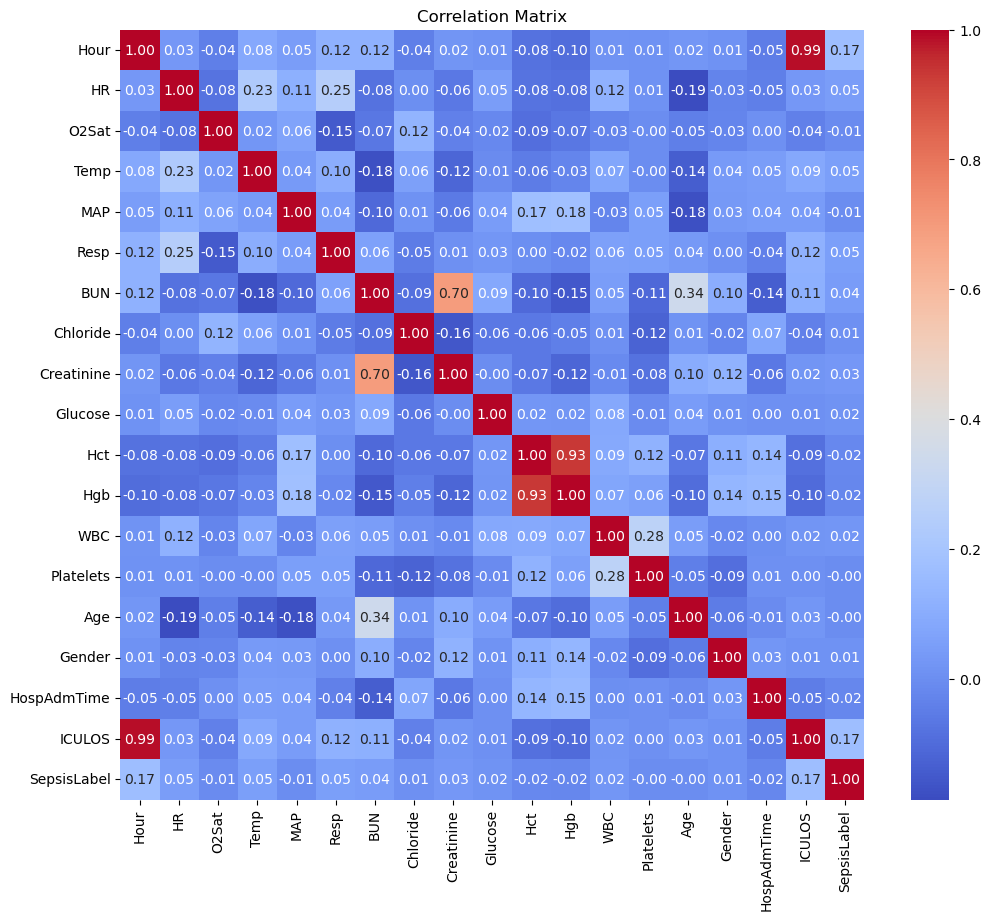

In [51]:
#creating a correlation matrix and plotting it for data_train
cor = data_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A threshold had been used to drop the features based on the correlation matrices.

In [52]:
# Removing Highly Correlated Features from data_train based on the correlation matrix by setting the threshold
threshold = 0.9
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
data_train = data_train.drop(columns=to_drop)
print(f"Removed features due to high correlation: {to_drop}")

Removed features due to high correlation: ['Hgb', 'ICULOS']


In [53]:
#printing the data_train
data_train

Hour        HR     O2Sat      Temp       MAP      Resp       BUN  \
0          0  0.705950 -0.685827 -1.105823 -0.157228  0.043895 -0.413042   
1          1  0.705950 -0.685827 -1.105823 -0.157228  0.043895 -0.413042   
2          2  0.236955  0.555029 -1.105823  0.547988  0.600192 -0.413042   
3          3  0.295579 -0.685827 -1.105823  0.868472  2.083649 -0.413042   
4          4  1.057696 -2.702217 -1.105823  0.868472  1.063772 -0.413042   
...      ...       ...       ...       ...       ...       ...       ...   
790210    28  0.178331  0.244815  2.398268  0.228970 -0.512401  0.507409   
790211    29  0.647326  0.244815  2.398268  1.189697 -0.512401  0.507409   
790212    30  3.226798 -0.065399  2.398268  0.261735 -0.512401  0.507409   
790213    31  2.054311 -0.375613  2.398268  2.236164 -0.512401  0.507409   
790214    32  1.761189 -0.685827  2.398268  2.190680 -0.512401  0.507409   

        Chloride  Creatinine   Glucose       Hct       WBC  Platelets    Age  \
0      -3.697098   -0.560343  1.444179  1.231844 -1.288936   1.062522  83.14   
1      -3.697098   -0.560343  1.444179  1.231844 -1.288936   1.062522  83.14   
2      -3.697098   -0.560343  1.444179  1.231844 -1.288936   1.062522  83.14   
3      -3.697098   -0.560343  1.444179  1.231844 -1.288936   1.062522  83.14   
4      -3.697098   -0.560343  1.444179  1.231844 -1.288936   1.062522  83.14   
...          ...         ...       ...       ...       ...        ...    ...   
790210 -0.591863    1.329024  1.640469 -0.701992  0.244038   0.848572  62.29   
790211 -0.591863    1.329024  1.640469 -0.701992  0.244038   0.848572  62.29   
790212 -0.591863    1.329024  1.640469 -0.701992  0.244038   0.848572  62.29   
790213 -0.591863    1.329024  1.640469 -0.701992  0.244038   0.848572  62.29   
790214 -0.591863    1.329024  1.640469 -0.701992  0.244038   0.848572  62.29   

        Gender  HospAdmTime  SepsisLabel  
0            0        -0.03            0  
1            0        -0.03            0  
2            0        -0.03            0  
3            0        -0.03            0  
4            0        -0.03            0  
...        ...          ...          ...  
790210       1        -0.03            1  
790211       1        -0.03            1  
790212       1        -0.03            1  
790213       1        -0.03            1  
790214       1        -0.03            1  

[766219 rows x 17 columns]

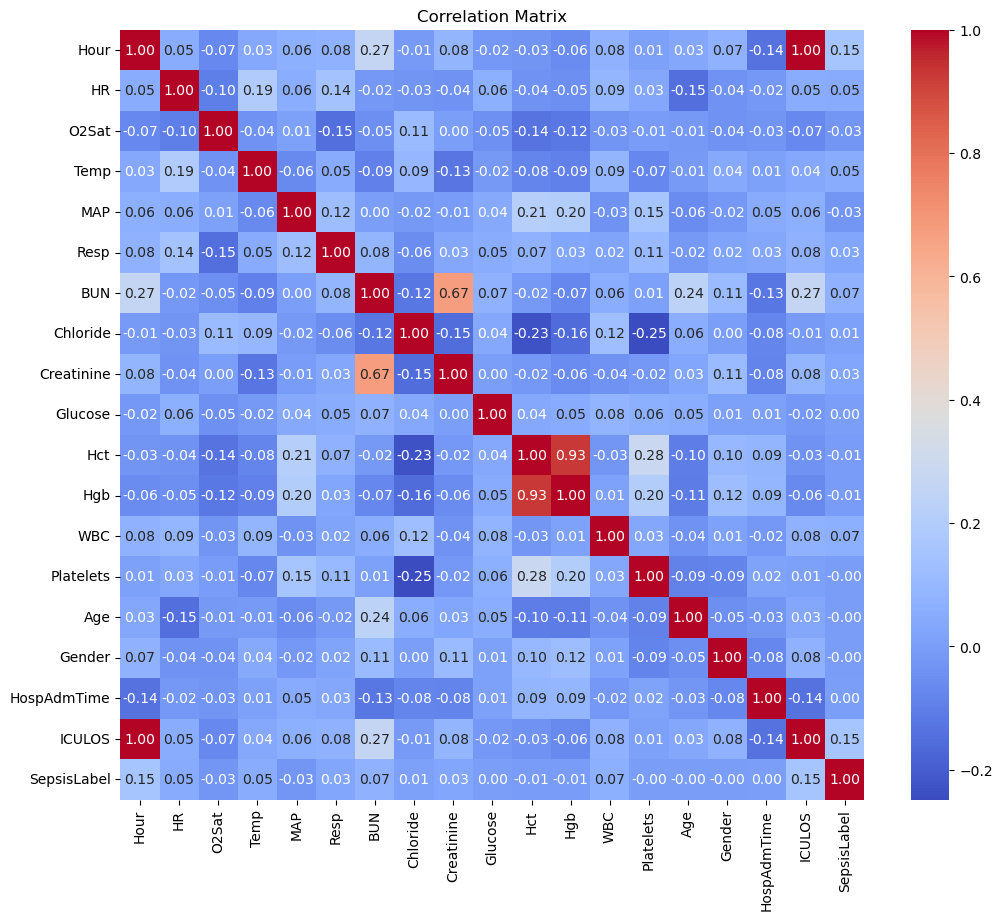

In [54]:
#creating a correlation matrix and plotting it for data_test
corr = data_test.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Removing Highly Correlated Features from data_test based on the correlation matrix by setting the threshold
threshold = 0.9
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
data_test = data_test.drop(columns=to_drop)
print(f"Removed features due to high correlation: {to_drop}")

Removed features due to high correlation: ['Hgb', 'ICULOS']


In [56]:
#printing the data_train
data_test

Hour        HR     O2Sat      Temp       MAP      Resp      BUN  \
287        0 -0.218377 -0.526069 -0.848113 -0.745106 -0.517967  1.13948   
288        1 -0.218377 -0.526069 -0.848113 -0.745106 -0.517967  1.13948   
289        2  0.063687  0.622151 -0.992020 -0.399311 -0.517967  1.13948   
290        3  0.402165 -0.033975 -1.063974 -1.309623  0.196070  1.13948   
291        4  0.599610  0.294088 -1.063974 -1.553208  0.910107  1.13948   
...      ...       ...       ...       ...       ...       ...      ...   
761531    34 -1.290222  0.950214  1.166587 -0.889924 -3.170104 -0.13789   
761532    35 -1.290222  0.622151  1.166587 -0.817026 -3.170104 -0.13789   
761533    36 -1.346635  0.950214  1.166587 -0.889924 -3.170104 -0.13789   
761534    37 -1.092777  0.950214  1.022679 -0.674139 -3.170104 -0.13789   
761535    38 -1.120984 -0.033975  1.022679 -0.889924 -3.170104 -0.13789   

        Chloride  Creatinine   Glucose       Hct       WBC  Platelets   Age  \
287    -0.338931    0.785256  0.091098 -0.380480  0.448826  -0.505570  65.0   
288    -0.338931    0.785256  0.091098 -0.380480  0.448826  -0.505570  65.0   
289    -0.338931    0.785256 -0.066319 -0.380480  0.448826  -0.505570  65.0   
290    -0.338931    0.785256 -0.288597 -0.380480  0.448826  -0.505570  65.0   
291    -0.338931    0.890061 -0.526908 -1.529802 -0.438955  -1.202483  65.0   
...          ...         ...       ...       ...       ...        ...   ...   
761531  0.221281   -0.472625  0.265749 -1.025989  1.172219  -1.264930  75.0   
761532  0.221281   -0.472625 -0.013010 -1.025989  1.172219  -1.264930  75.0   
761533  0.221281   -0.472625 -0.013010 -1.025989  1.172219  -1.264930  75.0   
761534  0.221281   -0.472625  0.026416 -1.025989  1.172219  -1.264930  75.0   
761535  0.221281   -0.472625  0.065377 -1.025989  1.172219  -1.264930  75.0   

        Gender  HospAdmTime  SepsisLabel  
287          1      -211.64            0  
288          1      -211.64            0  
289          1      -211.64            0  
290          1      -211.64            0  
291          1      -211.64            0  
...        ...          ...          ...  
761531       0       -28.15            0  
761532       0       -28.15            0  
761533       0       -28.15            0  
761534       0       -28.15            0  
761535       0       -28.15            0  

[74307 rows x 17 columns]

In [57]:
#checking the class labels in training data and printing it
majority_class = data_train[data_train['SepsisLabel'] == 0]
minority_class = data_train[data_train['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


Model Designing:

In [58]:
#defining the x and y 
x = data_train.drop('SepsisLabel', axis=1)
y = data_train['SepsisLabel']

In [59]:
#printing the x shape
x.shape

(766219, 16)

In [60]:
#printing the y shape
y.shape

(766219,)

Splitting the data into train, validation and test data

In [61]:
#splitting the data into 80% train and 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2)

In [62]:
#printing the x_train_val shape
x_train_val.shape

(612975, 16)

In [63]:
#printing the y_train_val shape
y_train_val.shape

(612975,)

In [64]:
#printing the x_test shape
x_test.shape

(153244, 16)

In [65]:
#printing the y_test shape
y_test.shape

(153244,)

In [66]:
#splitting the train data into 60% train and 20% validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)

In [67]:
#printing the x_train shape
x_train.shape

(490380, 16)

In [68]:
#printing the y_train shape
y_train.shape

(490380,)

In [69]:
#printing the x_val shape
x_val.shape

(122595, 16)

In [70]:
#printing the y_val shape
y_val.shape

(122595,)

undersampling the data to equal the samples in majority and minority classes

In [71]:
#Applying the undersampling technique to the train data
undersampler = RandomUnderSampler(random_state=42)
x_train_under, y_train_under = undersampler.fit_resample(x_train, y_train)
print(f"After undersampling - Shape of x_train: {x_train_under.shape}, Shape of y_train: {y_train_under.shape}")

After undersampling - Shape of x_train: (19896, 16), Shape of y_train: (19896,)


Training and validating the Random Forest model

In [72]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train_under, y_train_under)

# Print best hyperparameters
print("Best Hyperparameters of RF model(data_train):")
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation dataset
y_pred = best_model.predict(x_val)

# Print classification report
print("Classification Report of RF Model(data_train):")
print(classification_report(y_val, y_pred))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Hyperparameters of RF model(data_train):
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Classification Report of RF Model(data_train):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    120208
           1       0.18      0.97      0.30      2387

    accuracy                           0.91    122595
   macro avg       0.59      0.94      0.63    122595
weighted avg       0.98      0.91      0.94    122595



In [73]:
# Evaluate the best model on the test dataset
y_test_pred = best_model.predict(x_test)

# Print classification report
print("Classification Report of RF Model(data_train):")
print(classification_report(y_test, y_test_pred))

Classification Report of RF Model(data_train):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    150295
           1       0.17      0.97      0.29      2949

    accuracy                           0.91    153244
   macro avg       0.59      0.94      0.62    153244
weighted avg       0.98      0.91      0.94    153244



Performing evaluation metrics for RF model

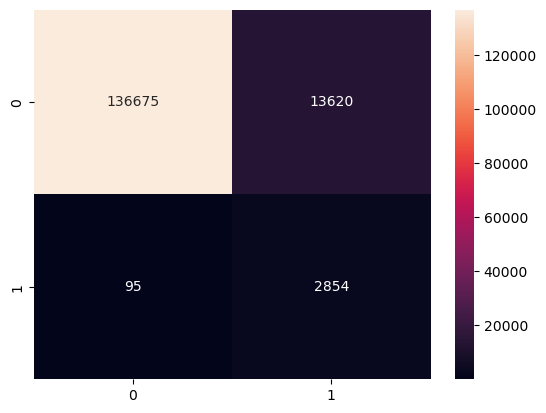

In [74]:
#evaluating the confusion matrix and displaying it
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [75]:
#Evaluating the Truepositive and TrueNegative rates
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)

tnr = tn / (tn + fp)

print(f'Sensitivity (TPR): {tpr:.2f}')
print(f'Specificity (TNR): {tnr:.2f}')

Sensitivity (TPR): 0.97
Specificity (TNR): 0.91


In [76]:
#evaluating the Average accuracy
avg_accuracy = (tpr + tnr)/2

print('Average Accuracy:',avg_accuracy)

Average Accuracy: 0.938581956446433


In [77]:
#evaluating the metrics
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_test_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.910502205632847
Precision: 0.1732426854437295
Recall: 0.9677856900644286
F1 Score: 0.2938783915975905
ROC-AUC Score: 0.938581956446433


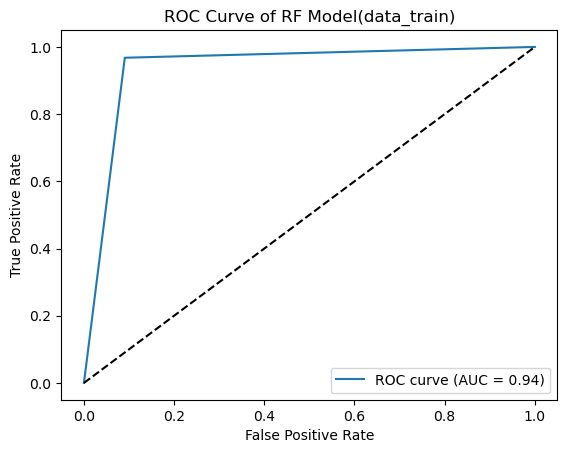

In [78]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RF Model(data_train)')
plt.legend(loc='lower right')
plt.show()

Training and validating the XGBoost model.

In [79]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Instantiate XGBoostClassifier
clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train_under, y_train_under)

# Print best hyperparameters
print("Best Hyperparameters of XGBoost Model(data_train):")
print(grid_search.best_params_)

# Get the best model
best_model1 = grid_search.best_estimator_

# Evaluate the best model on the validation dataset
y_pred = best_model1.predict(x_val)

# Print classification report
print("Classification Report of XGboost Model(data_train):")
print(classification_report(y_val, y_pred))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Hyperparameters of XGBoost Model(data_train):
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 500}
Classification Report of XGboost Model(data_train):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    120208
           1       0.20      0.98      0.33      2387

    accuracy                           0.92    122595
   macro avg       0.60      0.95      0.64    122595
weighted avg       0.98      0.92      0.95    122595



In [80]:
# Evaluate the best model on the test dataset
y_test_pred1 = best_model1.predict(x_test)

# Print classification report
print("Classification Report of XGBoost model(data_train):")
print(classification_report(y_test, y_test_pred1))

Classification Report of XGBoost model(data_train):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    150295
           1       0.19      0.99      0.32      2949

    accuracy                           0.92    153244
   macro avg       0.60      0.95      0.64    153244
weighted avg       0.98      0.92      0.95    153244



Performing the evaluation metrics on XGBoost model.

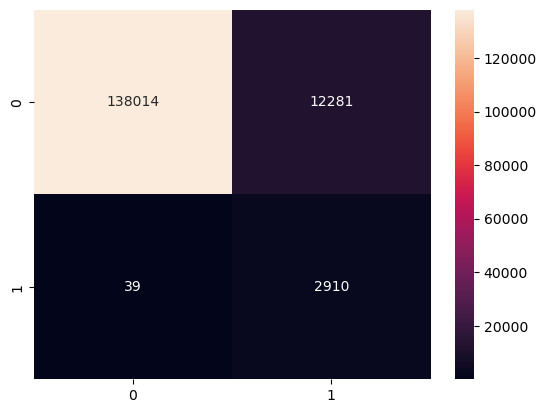

In [81]:
#evaluating the confusion matrix and displaying it
cm1 = confusion_matrix(y_test, y_test_pred1)
sns.heatmap(cm1, annot=True, fmt='d')
plt.show()

In [82]:
#Evaluating the Truepositive and TrueNegative rates
tn, fp, fn, tp = cm1.ravel()

tpr1 = tp / (tp + fn)

tnr1 = tn / (tn + fp)

print(f'Sensitivity (TPR): {tpr1:.2f}')
print(f'Specificity (TNR): {tnr1:.2f}')

Sensitivity (TPR): 0.99
Specificity (TNR): 0.92


In [83]:
#evaluating the Average accuracy
avg_accuracy1 = (tpr1 + tnr1)/2

print('Average Accuracy:',avg_accuracy1)

Average Accuracy: 0.9525312731011852


In [84]:
#evaluating the metrics
accuracy = accuracy_score(y_test, y_test_pred1)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_test_pred1)
print("Precision:", precision)
recall = recall_score(y_test, y_test_pred1)
print("Recall:", recall)
f1 = f1_score(y_test, y_test_pred1)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_test_pred1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9196053352822949
Precision: 0.19156079257455072
Recall: 0.9867751780264497
F1 Score: 0.32083792723263505
ROC-AUC Score: 0.9525312731011852


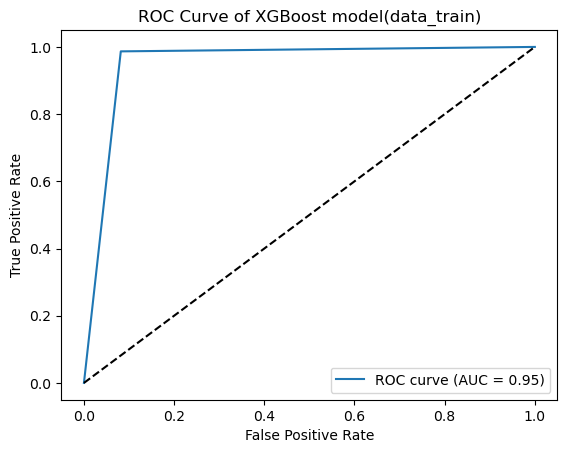

In [85]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred1)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost model(data_train)')
plt.legend(loc='lower right')
plt.show()

Training and validating the Logistic Regression model.

In [86]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']                # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
}

# Instantiate LogisticRegression
clf = LogisticRegression(max_iter=1000)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train_under, y_train_under)

# Print best hyperparameters
print("Best Hyperparameters of LR Model(data_train):")
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation dataset
y_pred = best_model.predict(x_val)

# Print classification report
print("Classification Report of LR Model(data_train):")
print(classification_report(y_val, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters of LR Model(data_train):
{'C': 0.001, 'penalty': 'l2'}
Classification Report of LR Model(data_train):
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    120208
           1       0.05      0.62      0.10      2387

    accuracy                           0.78    122595
   macro avg       0.52      0.70      0.49    122595
weighted avg       0.97      0.78      0.86    122595



In [87]:
# Evaluate the best model on the test dataset
y_test_pred2 = best_model.predict(x_test)

# Print classification report
print("Classification Report of LR model(data_train):")
print(classification_report(y_test, y_test_pred2))

Classification Report of LR model(data_train):
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    150295
           1       0.05      0.61      0.10      2949

    accuracy                           0.78    153244
   macro avg       0.52      0.70      0.49    153244
weighted avg       0.97      0.78      0.86    153244



performing evaluation metrics on LR model

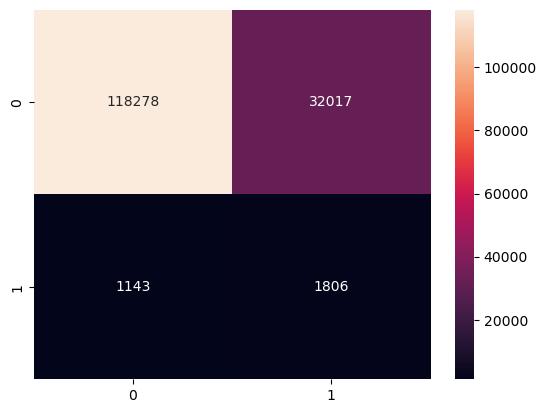

In [88]:
#evaluating the confusion matrix and displaying it
cm2 = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(cm2, annot=True, fmt='d')
plt.show()

In [89]:
#Evaluating the Truepositive and TrueNegative rates
tn, fp, fn, tp = cm2.ravel()

tpr2 = tp / (tp + fn)

tnr2 = tn / (tn + fp)

print(f'Sensitivity (Recall, TPR): {tpr2:.2f}')
print(f'Specificity (TNR): {tnr2:.2f}')

Sensitivity (Recall, TPR): 0.61
Specificity (TNR): 0.79


In [90]:
#evaluating the Average accuracy
avg_accuracy2 = (tpr2 + tnr2)/2

print('Average Accuracy:',avg_accuracy2)

Average Accuracy: 0.6996916373045523


In [91]:
#evaluating the metrics
accuracy = accuracy_score(y_test, y_test_pred2)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_test_pred2)
print("Precision:", precision)
recall = recall_score(y_test, y_test_pred2)
print("Recall:", recall)
f1 = f1_score(y_test, y_test_pred2)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y_test, y_test_pred2)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.7836130615228002
Precision: 0.05339561836620051
Recall: 0.612410986775178
F1 Score: 0.09822691178070271
ROC-AUC Score: 0.6996916373045524


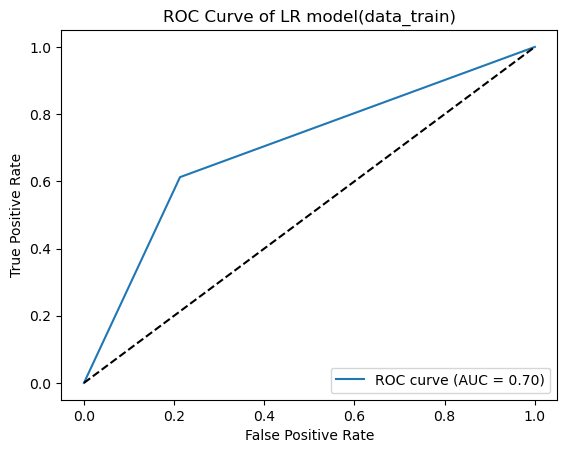

In [92]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred2)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LR model(data_train)')
plt.legend(loc='lower right')
plt.show()

Testing on the data_test using XGBoost as it is the best chosen model with 500 estimators.

In [93]:
#defining the x and y for testing data
x1 = data_test.drop('SepsisLabel', axis=1)
y1 = data_test['SepsisLabel']

In [94]:
x1.shape

(74307, 16)

In [95]:
y1.shape

(74307,)

In [96]:
#implementing XGBoost on data_test
y_test1 = best_model1.predict(x1)
#printing the classification report
print("Classification Report of XGBoost model (data_test):")
print(classification_report(y1, y_test1))

Classification Report of XGBoost model (data_test):
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     72348
           1       0.09      0.51      0.15      1959

    accuracy                           0.84     74307
   macro avg       0.54      0.68      0.53     74307
weighted avg       0.96      0.84      0.89     74307



Performing evaluation metrics on the testing data

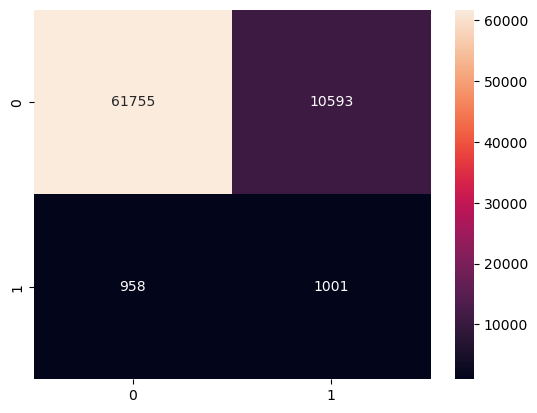

In [97]:
#evaluating the confusion matrix and displaying it
cm3 = confusion_matrix(y1, y_test1)
sns.heatmap(cm3, annot=True, fmt='d')
plt.show()

In [98]:
#Evaluating the Truepositive and TrueNegative rates
tn, fp, fn, tp = cm3.ravel()

tpr3 = tp / (tp + fn)

tnr3 = tn / (tn + fp)

print(f'Sensitivity (Recall, TPR): {tpr3:.2f}')
print(f'Specificity (TNR): {tnr3:.2f}')

Sensitivity (Recall, TPR): 0.51
Specificity (TNR): 0.85


In [99]:
#evaluating the Average accuracy
avg_accuracy3 = (tpr3 + tnr3)/2

print('Average Accuracy:',avg_accuracy3)

Average Accuracy: 0.6822788354669294


In [100]:
#evaluating the metrics
accuracy = accuracy_score(y1, y_test1)
print("Accuracy:", accuracy)
precision = precision_score(y1, y_test1)
print("Precision:", precision)
recall = recall_score(y1, y_test1)
print("Recall:", recall)
f1 = f1_score(y1, y_test1)
print("F1 Score:", f1)
roc_auc = roc_auc_score(y1, y_test1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.8445503115453457
Precision: 0.08633776091081594
Recall: 0.510974987238387
F1 Score: 0.1477163727587988
ROC-AUC Score: 0.6822788354669295


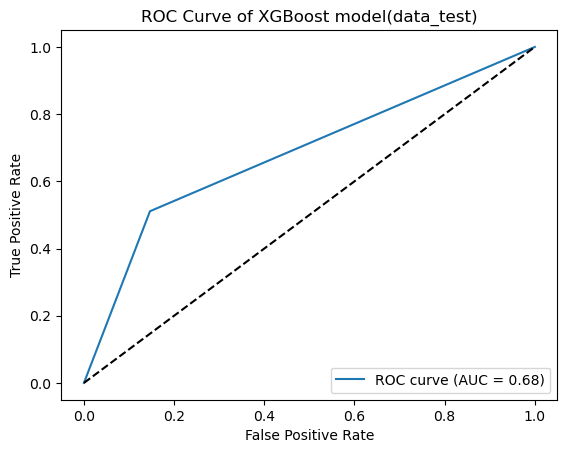

In [101]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y1, y_test1)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost model(data_test)')
plt.legend(loc='lower right')
plt.show()